In [2]:
import pandas as pd
import numpy as np

In [4]:
unclean = pd.read_excel("https://raw.githubusercontent.com/xxichlas/ep-nlp-sentiment-kebocorandata/main/tweets-excel-labeled.xlsx", sheet_name='unclean labeled')
unclean

,link,tweet,Tipe
0,https://twitter.com/NatanaelSirega9/status/156...,"@detikcom Saran, aktifasi SIM card pake nik di...",negatif
1,https://twitter.com/NatanaelSirega9/status/156...,@detikcom Mau kata apalagi untuk menggambarkan...,negatif
2,https://twitter.com/MrX009900/status/156762752...,@CNNIndonesia Pake sim card dipaksa pakai ktp ...,negatif
3,https://twitter.com/Poisonfromuncle/status/156...,Lagi ribut data SIM card bocor lah dulu kampus...,netral
4,https://twitter.com/sinyo_swana/status/1567562...,"@nuinugraha Jelas gak bisa ngatasin sendiri, s...",netral
...,...,...,...
952,https://twitter.com/Iconman221/status/15653350...,"1,3 Miliar Data Pendaftaran Kartu SIM Telepon ...",NaN
953,https://twitter.com/yosaris9/status/1565329763...,@Aryprasetyo85 @kemkominfo Yang membuat regula...,NaN
954,https://twitter.com/arinuzula/status/156530507...,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,NaN
955,https://twitter.com/CarollineNatty/status/1565...,"😅 yang bener aja Kominfo, data sim bocor, data...",NaN


# Clean data (Remove @,#,links, etc)

In [24]:
import numpy as np
import pandas as pd
import re
import nltk
# import spacy
import string
from nltk.corpus import stopwords
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
#Drop unnecessary column
unclean = unclean[['tweet', 'Tipe']]
unclean

,tweet,Tipe
0,"@detikcom Saran, aktifasi SIM card pake nik di...",negatif
1,@detikcom Mau kata apalagi untuk menggambarkan...,negatif
2,@CNNIndonesia Pake sim card dipaksa pakai ktp ...,negatif
3,Lagi ribut data SIM card bocor lah dulu kampus...,netral
4,"@nuinugraha Jelas gak bisa ngatasin sendiri, s...",netral
...,...,...
952,"1,3 Miliar Data Pendaftaran Kartu SIM Telepon ...",NaN
953,@Aryprasetyo85 @kemkominfo Yang membuat regula...,NaN
954,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,NaN
955,"😅 yang bener aja Kominfo, data sim bocor, data...",NaN


In [26]:
removeusername = unclean
tweet  = removeusername['tweet']
import re
pattern = r'(?:&amp;|@[a-zA-Z0-9_]*)'
new =[]
for row in tweet:
    row = re.sub(pattern,"",row)
    new.append(row)

In [27]:
unclean['tweet_removeusername'] = new
#ignore warning

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
unclean

,tweet,Tipe,tweet_removeusername
0,"@detikcom Saran, aktifasi SIM card pake nik di...",negatif,"Saran, aktifasi SIM card pake nik di hapus ....."
1,@detikcom Mau kata apalagi untuk menggambarkan...,negatif,Mau kata apalagi untuk menggambarkan menteri ...
2,@CNNIndonesia Pake sim card dipaksa pakai ktp ...,negatif,Pake sim card dipaksa pakai ktp dan kk...gili...
3,Lagi ribut data SIM card bocor lah dulu kampus...,netral,Lagi ribut data SIM card bocor lah dulu kampus...
4,"@nuinugraha Jelas gak bisa ngatasin sendiri, s...",netral,"Jelas gak bisa ngatasin sendiri, sementara da..."
...,...,...,...
952,"1,3 Miliar Data Pendaftaran Kartu SIM Telepon ...",NaN,"1,3 Miliar Data Pendaftaran Kartu SIM Telepon ..."
953,@Aryprasetyo85 @kemkominfo Yang membuat regula...,NaN,Yang membuat regulasi untuk pendaftaran data...
954,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,NaN,"Terkait dugaan data SIM bocor, menyatakan..."
955,"😅 yang bener aja Kominfo, data sim bocor, data...",NaN,"😅 yang bener aja Kominfo, data sim bocor, data..."


In [29]:
#remove unnecessary text (links, etc)
import re
def remove_unused_char(texts) :
  data = texts.map(lambda x:x.lower())
  
  data = data.map(lambda x: re.sub(r'[^a-zA-Z0-9 ]', r'', str(x))) # Remove unused character
  data = data.map(lambda x: re.sub('[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]', '', str(x))) # Remove punctuation
  data = data.map(lambda x: re.sub('[0123456789]', '', str(x))) #Remove number

  data = data.map(lambda x: x.lstrip())
    
  data = data.map(lambda x: re.sub(r'@\S+', '', x)) # Remove mention
  data = data.map(lambda x: re.sub(r'#\S+', '', x)) # Remove hashtag
  data = data.map(lambda x: re.sub(r'https\S+', '', x)) # Remove URL

  return data

In [30]:
unclean_removehash = unclean
tweets = unclean_removehash[['tweet_removeusername']]
preprocessed = remove_unused_char(tweets.tweet_removeusername)
unclean['tweet_removehashtag'] = preprocessed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
unclean

,tweet,Tipe,tweet_removeusername,tweet_removehashtag
0,"@detikcom Saran, aktifasi SIM card pake nik di...",negatif,"Saran, aktifasi SIM card pake nik di hapus .....",saran aktifasi sim card pake nik di hapus krna...
1,@detikcom Mau kata apalagi untuk menggambarkan...,negatif,Mau kata apalagi untuk menggambarkan menteri ...,mau kata apalagi untuk menggambarkan menteri y...
2,@CNNIndonesia Pake sim card dipaksa pakai ktp ...,negatif,Pake sim card dipaksa pakai ktp dan kk...gili...,pake sim card dipaksa pakai ktp dan kkgiliran ...
3,Lagi ribut data SIM card bocor lah dulu kampus...,netral,Lagi ribut data SIM card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...
4,"@nuinugraha Jelas gak bisa ngatasin sendiri, s...",netral,"Jelas gak bisa ngatasin sendiri, sementara da...",jelas gak bisa ngatasin sendiri sementara data...
...,...,...,...,...
952,"1,3 Miliar Data Pendaftaran Kartu SIM Telepon ...",NaN,"1,3 Miliar Data Pendaftaran Kartu SIM Telepon ...",miliar data pendaftaran kartu sim telepon indo...
953,@Aryprasetyo85 @kemkominfo Yang membuat regula...,NaN,Yang membuat regulasi untuk pendaftaran data...,yang membuat regulasi untuk pendaftaran data k...
954,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,NaN,"Terkait dugaan data SIM bocor, menyatakan...",terkait dugaan data sim bocor menyatakan keme...
955,"😅 yang bener aja Kominfo, data sim bocor, data...",NaN,"😅 yang bener aja Kominfo, data sim bocor, data...",yang bener aja kominfo data sim bocor data per...


#Remove slang

##slang (DO NOT OPEN, kebanyakan)

In [32]:
# daftar slangwords dari https://github.com/louisowen6/NLP_bahasa_resources/blob/master/combined_slang_words.txt
slang = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "ga" : "tidak", "gak" : "tidak", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"} 


##continue (run the slang dict)

In [33]:
unclean['tweet_formal'] = unclean['tweet_removehashtag'].apply(lambda x: ' '.join(slang.get(word, word) for word in x.split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##akronim dict (DO NOT OPEN, kebanyakan)

In [34]:
#clean akronim, daftar akronim dari https://github.com/ramaprakoso/analisis-sentimen/blob/master/kamus/acronym.txt
akronim_word = { "A" : "Ampere", "a.d." : "atas dasar", "a.d.c." : "aide-de-camp", "A.H." : "anno hejirae", "a.i." : "ad interim", "a.l." : "antara lain", "a.m." : "ante meridiem", "A.M." : "sebelum tengah hari", "A.M.v.B." : "Algemene Maatregel van Bestuur", "a.n." : "atas nama", "a.n.b." : "atas nama beliau", "a.p." : "atas perintah", "a.s." : "alaihi salam", "A/O" : "Account Officer", "AA" : "Asia Afrika", "AAI" : "Asosiasi Advokat Indonesia", "AAL" : "Akademi Angkatan Laut", "AAMII" : "Asosiasi Aparel Manufaktur Indonesia", "AAO" : "Assistant Account Officer", "AAP" : "Australian Associated Press", "AB" : "Angkatan Bersenjata", "ABAEI" : "Asosiasi Biro Administrasi Efek Indonesia", "ABG" : "anak baru gede", "ABI" : "Asosiasi Bakery Indonesia", "ABKI" : "Asosiasi Bank Kustodian Indonesia", "ABMI" : "Asosiasi Budidaya Mutiara Indonesia", "ABN" : "Anggaran Belanja Negara", "abnon" : "abang dan none", "ABP" : "Agence Burundaise de Presse", "ABRI" : "Angkatan Bersenjata Republik Indonesia", "Abrip" : "Ajun Brigadir Polisi", "Abripda" : "Ajun Brigadir Polisi II", "Abriptu" : "Ajun Brigadir Polisi I", "ABS" : "asal bapak senang", "ABT" : "Anggaran Belanja Tahunan", "ABU" : "Asian Broadcasting Union", "AC" : "air conditioner", "acc" : "accord", "ACD" : "anti celana dalam", "ACDC" : "biseksual", "ACI" : "aku cinta Indonesia", "ACPI" : "Advanced Configuration and Power Interface", "ACR" : "Advanced Communication Riser", "ACTED" : "Agency for Technical Cooperational and Development", "AD" : "Angkatan Darat", "ADB" : "Asian Development Bank", "ADC" : "Analog to Digital Converter", "ADIA" : "Akademi Dinas Ilmu Agama", "adm." : "administrasi", "ADPCM" : "Adaptive Differential Pulse-Code Modulation", "adpel" : "administrasi pelabuhan", "ADPI" : "Asosiasi Dana Pensiun Indonesia", "ADRI" : "Angkatan Darat Republik Indonesia", "ADSL" : "Asymmetric Digital Subscriber Line", "AEI" : "Asosiasi Emiten Indonesia", "AEIHI" : "Asosiasi Eksportir Ikan Hias Indonesia", "AEKI" : "Asosiasi Eksportir Kopi Indonesia", "AF" : "audio frequency", "AFA" : "ASEAN Federation of Accountants", "AFI" : "Asosiasi Franchise Indonesia", "AFP" : "Agence France de Presse", "AG" : "Asian Games", "AGI" : "Asosiasi Gula Indonesia", "AGP" : "Agence Gabonaise de Presse", "AGRI" : "Asosiasi Gula Rafinasi Indonesia", "Agus" : "agak gundul sedikit", "AICE" : "Association of Indonesian Coffee Exporters", "AICESSCC" : "Association of Indonesia-China Economic, Social and Cultural Cooperation", "AIDS" : "acquired immunodeficiency syndrome", "AIFTA" : "Asosiasi Industri Formalin dan Thermosetting Adhesive", "AIGI" : "Asosiasi Industri Glukosa Indonesia", "AIMMI" : "Asosiasi Industri Minyak Makan Indonesia", "AIP" : "Akademi Ilmu Pelayaran", "Aipda" : "Ajun Inspektur II", "AIPI" : "Asosiasi Ilmu Politik Indonesia", "AIPO" : "Asian Inter-Parliamentary Organization", "AIPS" : "Association Internale de la Presse Sportive", "Aiptu" : "Ajun Inspektur I", "AIS" : "Akademi Ilmu Statistika", "AISI" : "Asosiasi Independen Surveyor Indonesia", "AJB" : "Akta Jual Beli", "AJI" : "Aliansi Jurnalis Independen", "AK" : "angka kredit", "Ak." : "akuntan", "AKABRI" : "Akademi Bersenjata Republic Indonesia", "AKAD" : "Angkatan Kerja AntarDaerah", "AKAINDO" : "Asosiasi Kontraktor Air Indonesia", "AKBP" : "Ajun Komisaris Besar Polisi", "AKDAI" : "Asosiasi Kimia Dasar Anorganik Indonesia", "AKHI" : "Asosiasi Konsultan Hukum Indonesia", "AKI" : "Asosiasi Kontraktor Indonesia", "Akindo" : "Akademi Komunikasi Indonesia", "AKIP" : "Akuntabilitas Kinerja Instansi Pemerintah", "AKLI" : "Asosiasi Kontraktor Listrik Indonesia", "AKP" : "Ajun Komisaris Polisi", "AKPI" : "Asosiasi Kurator dan Pengurus Indonesia", "Akpol" : "Akademi Polisi", "Akt." : "akuntan", "AKUBBI" : "Asosiasi Industri Ketel Uap dan Bejana Bertekanan Indonesia", "AL" : "Angkatan Laut", "ALI" : "Asosiasi Logistik Indonesia", "aljasa" : "asal jadi saja", "ALMI" : "Asosiasi Logam Mulia Indonesia", "ALRI" : "Angkatan Laut Republik Indonesia", "ALU" : "Arithmetic Logic Unit", "alutsista" : "alat utama sistem pertahanan", "AM" : "Active Matrix", "AMA" : "Asosiasi Manajemen Indonesia", "AMAN" : "Aliansi Masyarakat Adat Nusantara", "AMD" : "ABRI masuk desa", "amdal" : "analisis mengenai dampak lingkungan", "AMI" : "Akademi Musik Indonesia", "AMII" : "Angkatan Muda Islam Indonesia", "Amir" : "amitamit", "AMM" : "ASEAN Ministerial Meeting", "AMN" : "Akademi Militer Nasional", "AMP" : "Agence Madagascar de Presse", "Ampera" : "Amanat Penderitaan Rakyat", "AMPI" : "Angkatan Muda Pembaharuan Indonesia", "AMPUH" : "Asosiasi Muslim Pengusaha Umrah dan Haji", "AMR" : "Audio Modem Riser", "AMS" : "Angkatan Muda Siliwangi", "AMSS" : "Association of Muslim Social Sciences", "AMT" : "Akademi Militer Tangerang", "ANA" : "2 Athens News Agency", "ANC" : "African National Congress", "Andal" : "Analisis Dampak Lingkungan", "ANEX" : "ASEAN News Exchange", "ANFE" : "Asian Network for Free Election", "angkot" : "angkutan kota", "angmor" : "angkutan bermtor", "ANGOP" : "Agencia Angolana de Prensa", "Anm." : "Anumerta", "ANP" : "Algemen Nederlands Persbureu", "ANPI" : "Asosiasi Niaga Pupuk Indonesia", "ANSI" : "American National Standards Institute", "Ant." : "Antara", "Anteve" : "Andalas Nusantara Televisi", "AOHI" : "Asosiasi Obat Hewan Indonesia", "AP" : "Associated Press", "AP3I" : "Asosiasi Pengelola Pusat Perbelanjaan Indonesia", "APA" : "Austria Press Agentur", "APBD" : "Anggaran Pendapatan dan Belanja Daerah", "APBI" : "Asosiasi Perusahaan Ban Indonesia", "APBLSI" : "Asosiasi Pemotongan Baja Lembaran Seluruh Indonesia", "APBMI" : "Asosiasi Perusahaan Bongkar Muat Indonesia", "APBN" : "Anggaran Pendapatan dan Belanja Negara", "APBTI" : "Asosiasi Produsen Benang Tekstur Indonesia", "APCI" : "Asosiasi Pengusaha Coldstorage Indonesia", "APDESI" : "Asosiasi Perangkat Desa Seluruh Indonesia", "APDN" : "Akademi Pemerintahan Dalam Negeri", "APEC" : "Asia Pacific Economic Cooperation", "APECC" : "Asia Pacific Exhibition and Convention Council", "Apegti" : "Asosiasi Penyalur Gula dan Tebu Indonesia", "APEI" : "Asosiasi Perusahaan Efek Indonesia", "APEPI" : "Asosiasi Pengusaha Emas dan Permata Indonesia", "APFI" : "Asosiasi Pengusaha Furnitur Indonesia", "Apfindo" : "Asosiasi Produsen Daging dan Feedlot Indonesia", "APGAI" : "Asosiasi Pemasok Garmen dan Aksesoris Indonesia", "APGI" : "Asosiasi Produsen Gas-Gas Industri Indonesia", "APHI" : "Asosiasi Pengusaha Hutan Indonesia", "APHT" : "Akta Pembebanan Hak Tanggungan", "API" : "Akademi Penerbangan Indonesia", "APIEI" : "Asosiasi Perusahaan Industri Elektronik dan Alat-Alat Listrik Rumah Tangga Indonesia", "Apindo" : "Asosiasi Pengusaha Indonesia", "APITINDO" : "Asosiasi Perusahaan Inspeksi Teknik Indonesia", "APJATI" : "Asosiasi Perusahaan Jasa Tenaga Kerja Indonesia", "APJII" : "Asosiasi Penyelenggara Jasa Internet Indonesia", "APKABEL" : "Asosiasi Pabrik Kabel Listrik Indonesia", "APKASI" : "Asosiasi Pemerintah Kabupaten Seluruh Indonesia", "APKI" : "Asosiasi Pulp dan Kertas Indonesia", "Apkindo" : "Asosiasi Panel Kayu Indonesia", "APKLINDO" : "Asosiasi Perusahaan Klining Indonesia", "APKOMINDO" : "Asosiasi Pengusaha Komputer Indonesia", "APLI" : "Asosiasi Penjualan Langsung Indonesia", "APM" : "Advanced Power Management", "APMI" : "Asosiasi Pengeboran Minyak dan Gas Bumi Indonesia", "Apnatel" : "Asosiasi Perusahaan Nasional Telekomunikasi", "Apodeti" : "Associacao Popular Democratica Timorense", "APP" : "Akademi Pimpinan Perusahaan", "APPI" : "Asosiasi Perusahaan Pembiayaan Indonesia", "APPLI" : "Asosiasi Produsen Peralatan Listrik Indonesia", "APPM" : "Asosiasi Praktisi Periklanan Media", "APPMI" : "Asosiasi Perancang Pengusaha Mode Indonesia", "APPP" : "Asosiasi Produsen Pipa Listrik", "APR" : "Amanat Penderitaan Rakyat", "APRA" : "Angkutan Perang Ratu Adil", "APRI" : "Angkatan Perang Republik Indonesia", "Aprindo" : "Asosiasi Pengusaha Ritel Indonesia", "APRIS" : "Angkatan Perang RI Serikat", "APRISINDO" : "Asosiasi Persepatuan Indonesia", "APROGAKOB" : "Asosiasi Produsen Garam Konsumsi Beryodium", "APS" : "Algerie Presse Service", "APSCSI" : "Asosiasi Produsen Sodium Cyclamate dan Sacharine Indonesia", "APU" : "Ahli Peneliti Utama", "APVA" : "Asosiasi Perdagangan Valuta Asing", "APWkomitel" : "Asosiasi Pengusaha Warnet Komunitas Telematika", "Arhanud" : "artileri pertahanan udara", "Arindo" : "Asosiasi Rotan Indonesia", "Armed" : "artileri medan", "ARNA" : "Arab Revolutionary News Agency", "Arpindo" : "Asosiasi Penyelenggara Radio Panggil Indonesia", "ART" : "anggaran rumah tangga", "art." : "artikel", "arumba" : "alunan rumpun bambu", "AS" : "Amerika Serikat", "ASAGHI" : "Asosiasi Agribisnis Hortikultura Indonesia", "ASBINDO" : "Asosiasi Bunga Indonesia", "asbun" : "asal bunyi", "ASEAN" : "Association of Southeast Asian Nations", "ASEANTA" : "ASEAN Tourism Association", "ASEANTTA" : "ASEAN Tourism and Travel Association", "ASEM" : "ASEANEurope Meeting", "ASEPHI" : "Asosiasi Eksportir dan Produsen Handicraft Indonesia", "ASI" : "air susu ibu", "ASIC" : "Application Specific Integrated Circuit", "Asirevi" : "Assosiasi Industri Rekaman Video Indonesia", "ASIRI" : "Asosiasi lndustri Rekaman Indonesia", "ASITA" : "Association of the Indonesian Tours and Travel Agencies", "Askes" : "asuransi kesehatan", "Askeskin" : "asuransi kesehatan keluarga miskin", "Askindo" : "Asosiasi Kakao Indonesia", "ASKITEL" : "Asosiasi Kliring Trafik Telekomunikasi Indonesia", "Askrindo" : "asuransi kredit Indonesia", "Asku" : "Asisten Keuangan", "Aslog" : "Asisten Logistik", "ASM" : "Akademi Sekretari Manajemen", "Asmindo" : "Asosiasi Pengusaha Mebel Indonesia", "Asops" : "Asisten Operasi", "Asosai" : "Asian Organization of Supreme Audit Institutions", "Aspadin" : "Asosiasi Perusahaan Air Minum Dalam Kemasan Indonesia", "aspal" : "asli tetapi palsu", "Aspek" : "Asosiasi Serikat Pekerja", "ASPEP" : "Asosiasi Pengerjaan Logam dan Permesinan", "ASPERINDO" : "Asosiasi Perusahaan Jasa Pengiriman Ekspres Indonesia", "ASPETEX" : "Asosiasi Pedagang Tekstil", "Aspiluki" : "Asosiasi Piranti Lunak Telematika Indonesia", "aspri" : "asisten pribadi", "ASPRINGTA" : "Asosiasi Perajin Bunga Kering", "Asrena" : "Asisten Perencanaan", "Asrenum" : "Asisten Rencana Umum", "ASRI" : "Akademi Seni Rupa Indonesia", "Astek" : "Asosiasi Sosial Tenaga Kerja", "Asteng" : "Asia Tenggara", "Aster" : "Asisten Teritorial", "ASTI" : "Akademi Seni Tari Indonesia", "Astrada" : "asisten sutradara", "astul" : "asal tulis", "aswo" : "asli Jowo", "AT" : "Advanced Technology", "ATA" : "Air Transport Association", "Atal" : "Atase Angkatan Laut", "ATBM" : "alat tenun bukan mesin", "ATC" : "air traffic control", "Atdikbud" : "Atase Pendidikan dan Kebudayaan", "ATF" : "ASEAN Tourism Forum", "Athan" : "Atase Pertahanan", "ATK" : "alat tulis kantor", "ATM" : "Anjungan Tunai Mandiri", "atm" : "atmosfer", "Atmil" : "atase militer", "ATNI" : "Akademi Teater Nasional Indonesia", "ATP" : "Automatic Teller Person", "ATPM" : "Agen Tunggal Pemegang Merk", "ATRA" : "advanced technology regional aircraft", "Atu" : "Atase Udara", "Atud" : "Atase Udara", "ATVLI" : "Asosiasi Televisi Lokal Indonesia", "ATVSI" : "Asosiasi Televisi Swasta Indonesia", "ATX" : "Advenced Technology Extended", "AU" : "Angkatan Udara", "AUMI" : "Asosiasi Usaha Menengah Indonesia", "AUP" : "Akademi Usaha Perikanan", "AURI" : "Angkatan Udara Republik Indonesia", "AVA" : "Audio Visual Aids", "avdp" : "avoirdupois", "AVI" : "Agence Vietnamienne d'Information", "Avtur" : "aviation turbo", "ay." : "ayat", "AZAP" : "Agence Zaire de Presse", "B.A." : "Bachelor of Arts", "B.B.A." : "Bachelor of Business Administration", "B.Ch.E" : "Bachelor of Chemical Engineering", "B.Ch.E." : "Bachelor of Chemical Engineering", "b.d." : "Berat Jenis", "B.J." : "Bacharuddin Jusuf", "B.Sc." : "Bachelor of Science", "B2" : "bahan berbahaya", "B3" : "bahan berbahaya dan beracun", "BAAK" : "Biro Administrasi Akademis Kemahasiswaaan", "BAB" : "buang air besar", "Babel" : "Bangka Belitung", "Babinhumnas" : "Badan Pembinaan Hukum Nasional", "Babinkar" : "Badan Pembinaan Karyawan", "Babinkum" : "Badan Pembinaan Hukum", "Babinkumnas" : "Badan Pembinaan Hukum Nasional", "BAHUMAS" : "Badan Musyawarah Pengusaha Swasta", "Bais" : "Badan Intelijen Strategis", "BAK" : "Biro Administrasi Keuangan", "baket" : "bahan keterangan", "Bakin" : "Badan Koordinasi Intelijen Negara", "BAKN" : "Badan Administrasi Kepegawaian Negara", "Bakolak" : "Badan Koordinasi Pelaksanaan", "Bakom-PKB" : "Badan Komunikasi Penghayatan Kesatuan Bangsa", "Bakopda" : "Badan Koordinasi Pembangungan Daerah", "Bakoptranas" : "Badan Koordinasi Penyelenggaraan Transmigrasi Nasional", "Bakorkamla" : "Badan Koordinasi Keamanan Laut", "Bakorlak" : "Badan Koordinasi Pelaksana Penanganan Bencana", "Bakorlantik" : "Badan Koordinasi Masalah Kenakalan Remaja Penyalahgunaan Narkotika", "Bakornas" : "Badan Koordinasi Nasional", "Bakorpakem" : "Badan Koodinasi Pengawas Aliran Kepercayaan Masyarakat", "Bakorstanas" : "Badan Koordinasi Stabilitas Nasional", "Bakorstanasda" : "Badan Koordinasi Stabilitas Nasional Daerah", "Bakosurtanal" : "Badan Koordinasi Survei dan Pemetaan Nasional", "baleg" : "badan legislasi", "balita" : "bawah lima tahun", "Balitbang" : "Badan Penelitian dan Pengembangan", "Balmera" : "Belawan, Medan, Utara", "balon" : "bakal calon", "Bamudes" : "Badan Musyawarah Desa", "Bamus" : "Badan Musyawarah", "BAN" : "Badan Akreditasi Nasional", "bandara" : "bandar udara", "bandes" : "bantuan desa", "bangdes" : "pembangunan desa", "bangtek" : "pengembangan teknik", "Bankom" : "bantuan komunikasi", "Banmin" : "bantuan administrasi", "banpol" : "bantuan polisi", "banpres" : "bantuan presiden", "Banpro" : "Bandung Promotion Group", "banpur" : "bantuan tempur", "bansarkas" : "bantuan sarana kesehatan", "Banser" : "Barisan Ansor Serbaguna", "BAP" : "berita acara pemeriksaan", "bapas" : "balai pemasyarakatan", "Bapebti" : "Badan Pengawas Bursa Komoditi", "Bapedal" : "Badan Pengendalian Dampak Lingkungan", "Bapedalda" : "Badan Pengendalian Dampak Lingkungan Daerah", "Bapeka" : "Badan Pemeriksa Keuangan", "Bapekan" : "Badan Pengawas Kegiatan Aparatur Negara", "Bapeksta" : "Badan Pelayanan Kemudahan Ekspor dan Pengolahan Data Keuangan", "Bapepam" : "Badan Pengawasan Pasar Modal", "Baperki" : "Badan Permusyawarahan Kewarganegaraan Indonesia", "Bapfida" : "Badan Pembina Perfilman Daerah", "Bapindo" : "Bank Pembangunan Indonesia", "Bappebti" : "Badan Pengawas Perdagangan Berjangka Komoditi", "Bappeda" : "Badan Perencanaan dan Pembangunan Daerah", "Bappenas" : "Badan Perencanaan Pembangunan Nasional", "Basarnas" : "Badan Search and Rescue Nasional", "BAT" : "British American Tobacco", "Batan" : "Badan Tenaga Atom Nasional", "batita" : "bawah tiga tahun", "Batola" : "Barito Kuala", "BAU" : "Biro Administrasi Umum", "bawasda" : "badan pengawas daerah", "bazis" : "badan amal, zakat, infak, dan sedekah", "BB" : "Binnenlands Bestuur", "BBC" : "British Broadcasting Corporation", "BBD" : "Bank Bumi Daya", "BBG" : "bahan bakar gas", "BBM" : "bahan bakar minyak", "BBN" : "Bea Balik Nama", "BBNKB" : "Bea Balik Nama Kendaraan Bermotor", "BBRVBD" : "Balai Besar Rehabilitasi Vokasional Bina Daksa", "BBS" : "Bangladesh Sangbad Sangstha", "BC" : "before Christ", "Bc.A.K." : "Baccalaureat Administrasi Kepegawaian", "Bc.Ac.P." : "Baccalaureat Akademi Pos", "Bc.Hk." : "Baccalaureat Hukum", "Bc.I." : "Baccalaureat Imigrasi", "Bc.KWN." : "Baccalaureat Keuangan Negara", "Bc.T.T." : "Baccalaureat Telepon dan Telegraf", "BCA" : "Bank Central Asia", "BCG" : "Bacillus Calmette-Guerin", "BCT" : "breast conserving treatment", "BD" : "barat daya", "BDB" : "bebas dari bea", "BDN" : "Bank Dagang Negara", "BDP" : "Bank dalam Penyehatan", "begor" : "bebek goreng", "BEI" : "Bursa Efek Indonesia", "BEJ" : "Bursa Efek Jakarta", "Belmera" : "BelawanMedanTanjungmorawa", "bemo" : "becak bermotor", "BEP" : "break-even point", "Bepeket" : "BelawanPenangPhuket", "berdikari" : "berdiri di atas kaki sendiri", "bermis" : "beton ringan pamis", "Bernama" : "Berita Nasional Malaysia", "BETA" : "Benda Terbang Aneh", "Betacipok" : "BekasiTangerangCibinongDepok", "BFN" : "Badan Futsal Nasional", "BGA" : "Ball Grid Array", "BH" : "bustehouder", "Bharada" : "Bhayangkara Dua", "Bharaka" : "Bhayangkara Kepala", "Bharatu" : "Bhayangkara Satu", "Bharuda" : "Bhayangkara Utama Dua", "Bharumud" : "Bhayangkara Utama Muda", "Bharuta" : "Bhayangkara Utama Satu", "Bharutu" : "Bhayangkara Utama Satu", "BHMN" : "Badan Hukum Milik Negara", "BI" : "Bank Indonesia", "BIA" : "Badan Intelijen ABRI", "BIDA" : "Batam Industrial Development Authority", "BIDSUS" : "Bidang Khusus", "BII" : "Bank Internasional Indonesia", "BIKN" : "Badan Informasi dan Komunikasi Nasional", "Bima" : "Biru Malam", "Bimas" : "bimbingan masyarakat", "bimbel" : "bimbingan belajar", "bimbuluh" : "bimbingan dan penyuluhan", "BIMP-EAGA" : "Brunei, Indonesia, Malaysia and the Philippines - East Asian Growth Area", "BIN" : "Badan Intelejen Negara", "bintal" : "bimbingan mental", "BIOS" : "Basic Input Output System", "biotrop" : "biologi tropikal", "BIPI" : "Balai Informasi dan Promosi Industri", "bipik" : "bimbingan dan pengembangan industri kecil", "BIS" : "Bank for International Settlement", "BJJ" : "belajar jarak jauh", "BK" : "bimbingan dan konseling", "BKIA" : "Balai Kesehatan Ibu dan Anak", "BKKBN" : "Badan Koordinasi Keluarga Berencana Nasional", "BKKKS" : "Badan Koordinasi Kegiatan Kesejahteraan Sosial", "BKLL" : "Badan Koordinasi Lingkungan Lingkungan", "BKLN" : "Biro Kerja Sama Luar Negeri", "BKMG" : "Badan Meteorologi, Klimatologi dan Geofisika", "BKN" : "Badan Kesejahteraan Nasional", "bkn" : "bukan", "BKOW" : "Badan Kerja Sama Organisasi Wanita", "BKPM" : "Badan Koordinasi Penanaman Modal", "BKPMD" : "Badan Koordinasi Penanaman Modal Daerah", "BKPN" : "Badan Kebijaksanaan Perumahan Nasional", "BKR" : "Barisan Keamanan Rakyat", "BKSDA" : "Balai Konservasi Sumber Daya Alam", "BKSP" : "Badan Kerja Sama Pembangunan", "BKTN" : "Badan Koperasi Tani dan Nelayan", "BL" : "bill of lading", "BLBI" : "Badan Likuidasi Bank Indonesia", "BLHI" : "Bina Lingkungan Hidup Indonesia", "BLI" : "Badan Liga Indonesia", "BLK" : "Balai Latihan Kerja", "BLKI" : "Balai Latihan Kerja Industri", "BLKLN" : "Balai Latihan Kerja Luar Negeri", "blm" : "belum", "bls" : "balas", "BLU" : "Badan Layanan Umum", "BM" : "bahasa Melayu", "BMD" : "Badan Musyawarah Desa", "BMG" : "Badan Meteorologi dan Geofisika", "BMHD" : "bunga yang masih harus dibayar", "BMI" : "Bank Muamalat Indonesia", "BMPH" : "barel minyak per hari", "BMPK" : "Batas Maksimum Pemberian Kredit", "BN" : "Berita Negara", "BNI" : "Bank Negara Indonesia", "BNN" : "Badan Narkotika Nasional", "BNP2TKI" : "Badan Nasional Penempatan dan Perlindungan Tenaga Kerja Indonesia", "BO" : "body odour", "boe" : "barrel oil equivalent", "bokar" : "bahan olah karet", "BOPD" : "barrels of oil per day", "Bopunjur" : "BogorPuncakCianjur", "BOS" : "bantuan operasional sekolah", "BOT" : "bangun, operasikan, transfer", "Botabek" : "BogorTangerangBekasi", "BP" : "Balai Pustaka", "BP2LS" : "Badan Pelaksana Penanggulangan Lumpur Sidoarjo", "BP2SAM" : "Badan Pelaksana Penanggulangan Sarana Air Minum", "BP3" : "Badan Pembantu Penyelenggara Pendidikan", "BP3K" : "Badan Penelitian Pengembanan Pendidikan dan Kebudayaan", "BP4" : "Badan Penasihat Perkawinan dan Penyelesaian Perceraian", "BP7" : "Badan Pembina Pendidikan Pelaksanaan Pedoman Penghayatan dan Pengamalan Pancasila", "BPD" : "Bank Pembangunan Daerah", "BPEN" : "Badan Pengembangan Ekspor Nasional", "BPFKPPA" : "Badan Pekerja Forum Komunikasi Pembinaan dan Pengembangan Anak", "BPG" : "Balai Pendidikan Guru", "BPH" : "Badan Pemerintah Harian", "BPH Migas" : "Badan pengatur Kegiatan Hilir Minyak dan Gas Bumi", "BPHH" : "Balai Penyelidikan Hasil Hutan", "BPHN" : "Badan Pembinaan Hukum Nasional", "BPHTB" : "Bea Perolehan Hak atas Tanah dan Bangunan", "BPI" : "Bursa Paralel Indonesia", "BPIH" : "Biaya Penyelenggaraan Ibadah Haji", "BPIS" : "Badan Pengelola Industri Strategis", "BPK" : "Badan Pemeriksa Keuangan", "BPKB" : "Buku Pemilik Kendaraan Bermotor", "BPKH" : "Badan Pembelaan dan Konsultasi Hukum", "BPKKS" : "Badan Pembinaan Kegiatan Kesejahteraan Sosial", "BPKN" : "Badan Perlindungan Konsumen Nasional", "BPKP" : "Badan Pengawas Keuangan dan Pembangunan", "BPKPA" : "Badan Pekerja Konsorsium Pembaruan Agraria", "BPKPN" : "Badan Pemeriksa Kekayaan Pejabat Negara", "BPM" : "Badan Pemberdayaan Masyarakat", "BPMB" : "Balai Pengawasan Mutu Barang", "BPMD" : "Balai Pendidikan Masyarakat Desa", "BPN" : "Badan Pertanahan Nasional", "BPOM" : "Badan Pengawasan Obat dan Makanan", "BPP" : "Badan Pimpinan Pusat", "BPP Teknologi" : "Badan Pengkajian dan Penerapan Teknologi", "BPPC" : "Badan Penyangga dan Pemasaran Cengkih", "BPPHH" : "Balai Penelitian Pengembangan Hasil Hutan", "BPPI" : "Badan Promosi Pariwisata Indonesia", "BPPK" : "Badan Pertimbangan Perintis Kemerdekaan", "BPPKA" : "Badan Pembinaan Pengusahaan Kontraktor Asing", "BPPN" : "Badan Penyehatan Perbankan Nasional", "BPPT" : "Badan Pengkajian dan Penerapan Teknologi", "BPR" : "Bank Perkreditan Rakyat", "BPS" : "Badan Pusat Statistik", "BPSK" : "Badan Penyelesaian Sengketa Konsumen", "BPTP" : "Balai Penelitian Tanaman Pangan", "BPUPKI" : "Badan Penyelidik Usaha-usaha Persiapan Kemerdekaan Indonesia", "BPUT" : "Badan Pertimbangan Urusan Tanah", "BRD" : "Bank Rakyat Desa", "BRI" : "Bank Rakyat Indonesia", "BRIEF" : "Business Review Indonesia Forum", "Brigif" : "Brigade Infanteri", "brigjen" : "brigadir jenderal", "Brigjenpol" : "Brigadir Jenderal Polisi", "Brigpol" : "Brigadir Polisi", "Brimob" : "Brigade Mobil", "Bripda" : "Brigadir Polisi II", "Bripka" : "brigadir polisi kepala", "Briptu" : "Brigadir Polisi I", "BRN" : "Badan Rahasia Nasional", "brp" : "berapa", "BRR" : "Badan Rekonstruksi dan Rehabilitasi", "BRTI" : "Badan Regulasi Telekomunikasi Indonesia", "bs" : "bisa", "BSF" : "Badan Sensor Film", "bsk" : "besok", "BTA" : "Bulgarska Telegrafischeka Agentzia", "BTAI" : "Badan Tenaga Atom Internasional", "BTN" : "Bank Tabungan Negara", "BTPN" : "Bank Tabungan Pensiun Negara", "BTS" : "base transmission station", "Btu" : "British Thermal Unit", "Bugil" : "bule gila", "Bukopin" : "Bank Umum Koperasi Indonesia", "Bulog" : "Badan Urusan Logistik", "BUMD" : "Badan Usaha Milik Daerah", "BUMN" : "Badan Usaha Milik Negara", "buras" : "bukan ras", "BURT" : "Badan Urusan Rumah Tangga Nasional", "buser" : "buru sergap", "BUT" : "bentuk usaha tetap", "BUTSI" : "Badan Urusan Tenaga Kerja Sukarela Indonesia", "BUUD" : "Badan Usaha Unit Desa", "BW" : "burgerlijk wetboek", "C" : "Celcius", "C.C." : "carbon copy", "C.O." : "Commanding Officer", "c.q." : "casu quo", "ca" : "circa", "caba" : "calon bintara", "Cadek" : "Catur Dharma Eka Karma", "Calhaj" : "calon haji", "cama" : "calon mahasiswa", "cami" : "calon mahasiswi", "CAN" : "Cyprus News Agency", "CANA" : "Caribbian News Agency", "capa" : "calon perwira", "capeg" : "calon pegawai", "CAS" : "Column Address Signal", "cawu" : "caturwulan", "CBO" : "Community Base Organization", "CBSA" : "cara belajar siswa aktif", "CC" : "Corps Consulaire", "CCD" : "Charge Coupled Device", "CCI ASEAN" : "ASEAN Chamber of Commerce and Industry", "CCTV" : "Closed Circuit Television", "CD" : "Corps Diplomatique", "CD-ROM" : "Compact Disk-Read Only Memory", "CDMA" : "Code Division Multiple Acces", "CDR" : "Compact Disk Recorder", "CDRW" : "Compact Disk Re-Writer", "cekal" : "cegah tangkal", "CEO" : "chief executive officer", "cerber" : "cerita bersambung", "cerbung" : "cerita bersambung", "cergam" : "cerita bergambar", "cerpen" : "cerita pendek", "CESDA" : "Center for the Study of Development and Democracy", "cf" : "confer", "cf." : "confer", "CGI" : "Consultative Group on Indonesia", "CIA" : "Central Intelligence Agency", "CIDES" : "Center for Information and Development Studies", "CIFOR" : "Center for International Forestry Research", "ckp" : "cukup", "CNPPASEA" : "Commission on National Parks and Protected Areas for South East Asia", "CNRT" : "Conselho Nacional da Resistencia Timorense", "CO" : "Community Organizer", "Co." : "company", "COD" : "cash on delivery", "Cominac" : "Conference of Ministers of Information of Non-Alignment Countries", "cp" : "candlepower", "CP" : "cerebral palsy", "CPE" : "central planned economics", "CPIS" : "Center for Policy and Implementation Studies", "CPL" : "Civil Pilot Licence", "CPM" : "Corps Polisi Militer", "CPNS" : "calon pegawai negeri sipil", "CPO" : "crude palm oil", "CPU" : "Central Processing Unit", "CRC" : "Canadian Red Cross", "CRP" : "Community Recovery Program", "CRT" : "Cathode-Ray Tube", "CSIS" : "Center for Strategic and International Studies", "CSO" : "Civil Society Organization", "CST" : "cangkok sumsum tulang", "CSW" : "Centrale Stichting Wederopbouw", "CTK" : "Czekolavenska Tiskora Kancelar", "curanmor" : "pencurian kendaraan bermotor", "curas" : "pencurian dengan kekerasan", "curcol" : "curahan hati colongan", "curhat" : "curahan hati", "CV" : "2 curriculum vitae", "CWS" : "Church World Services", "D-1" : "diploma satu", "D-2" : "diploma dua", "D-3" : "diploma tiga", "D-4" : "diploma empat", "d.a." : "dengan alamat", "d.l." : "dinas luar", "D.Sc." : "doctor of science", "D1" : "diploma satu", "D2" : "diploma dua", "D3" : "diploma tiga", "D4" : "diploma empat", "Da" : "daerah", "DA" : "datadata agunan", "DAC" : "Digital-to-Analog Converter", "DACS" : "Digital Acces and Cross-connect System", "DAE" : "Digital Audio Extraction", "DAI" : "Dewan Asuransi Indonesia", "DAMRI" : "Djawatan Angkutan Motor Republik Indonesia", "dandim" : "komandan distrik militer", "danramil" : "komandan rayon militer", "danrem" : "komandan resort militer", "dansek" : "komandan sektor", "danton" : "komandan peleton", "danwil" : "komandan wilayah", "danyon" : "komandan batalion", "DAS" : "daerah aliran sungai", "Daswati I" : "daerah swatantra tingkat I", "Dati I" : "daerah tingkat I", "DBA" : "doctor of business administration", "DBD" : "demam berdarah dengue", "DC" : "irect current", "DDC" : "Display Data Channel", "DDII" : "Dewan Dakwah Islamiyah Indonesia", "DDKTD" : "dengan demikian kesalahan telah diperbaiki", "DDR" : "Double Data Rate", "DDR-SDRAM" : "Double Data Rate-Synchronous Dynamics Random Acces Memory", "DDS" : "doctor of dental surgery", "DDT" : "dichloro-diphenyl-trichloro-ethane", "DEC" : "Digital Equipment Corporation", "dekon" : "deklarasi ekonomi", "Dekopin" : "Dewan Koperasi Indonesia", "Dekranas" : "Dewan Kerajinan Nasional", "DEN" : "Dewan Ekonomi Nasional", "Denintel" : "Detasemen Intel", "Denma" : "Detasemen Markas", "Dep P&K" : "Departemen Pendidikan dan Kebudayaan", "Depag" : "Departemen Agama", "Depanri" : "Dewan Penerbangan dan Antariksa Nasional Republik Nasional", "Deparpostel" : "Departemen Pariwisata, Pos, dan Telekomunikasi", "Depbudpar" : "Departemen Kebudayaan dan Pariwisata", "Depdagri" : "Departemen Dalam Negeri", "Depdiknas" : "Departemen Pendidikan Nasional", "Deperdag" : "Departemen Perdagangan", "Deperhub" : "Departemen Perhubungan", "Deperind" : "Departemen Perindustrian", "Deperindag" : "Departemen Perindustrian dan Perdagangan", "Depertamben" : "Departemen Pertambangan dan Energi", "Depertan" : "Departemen Pertanian", "Depertanhut" : "Departemen Pertanian dan Kehutanan", "Dephankam" : "Departemen Pertahanan dan Keamanan", "Dephub" : "Departemen Perhubungan", "Dephut" : "Departemen Kehutanan", "Depkeh" : "Departemen Kehakiman", "Depkeh Ham" : "Departemen Kehakiman dan Hak Asasi Manusia", "Depkehut" : "Departemen Kehutanan", "Depkes" : "Departemen Kesehatan", "Depkeu" : "Departemen Keuangan", "Depkimpraswil" : "Departemen Permukiman dan Prasarana Wilayah", "Depkominfo" : "Departemen Komunikasi dan Informatika", "Depkumdang" : "Departemen Hukum dan Perundang-undangan", "Depkumham" : "Departemen Hukum dan Hak Asasi Manusia", "Deplu" : "Departemen Luar Negeri", "Depnaker" : "Departemen Tenaga Kerja", "Depnakertrans" : "Departemen Tenaga Kerja dan Transmigrasi", "Depparbud" : "Departemen Pariwisata dan Kebudayaan", "Deppen" : "Departemen Penerangan", "Deppostel" : "Departemen Pos, dan Telekomunikasi", "Depsos" : "Departemen Sosial", "Deptamben" : "Departemen Pertambangan dan Energi", "Deptan" : "Departemen Pertanian", "Deptrans" : "Departemen Transmigrasi", "Dewan Hankamnas" : "Dewan Pertahanan Keamanan Nasional", "DFK" : "datadata fasilitas kredit", "DFN" : "Dewan Film Nasional", "dg" : "dengan", "dgn" : "dengan", "DI" : "daerah istimewa", "DIA" : "Daerah Istimewa Aceh", "DIK" : "daftar isian kegiatan", "Dikdasmen" : "Pendidikan Dasar dan Menengah", "Diklat" : "pendidikan dan pelatihan", "Diklusepora" : "Pendidikan Luar Sekolah, Pemuda, dan Olahraga", "Dikmenjur" : "Pendidikan Menengah Kejuruan", "Dikmenum" : "Pendidikan Menengah Umum", "Dikti" : "Pendidikan Tinggi", "DIMM" : "dual inline memory module", "DIP" : "daftar isian proyek", "Dir" : "Direktur", "Dirjen" : "Direktur Jendral", "dirum" : "direktur umum", "Dirut" : "direktur utama", "Dispenda" : "Dinas Pendapatan Daerah", "Dit" : "Direktorat", "Ditjen" : "Direktorat Jendral", "DIY" : "Daerah Istimewa Yogyakarta", "DK" : "Dewan Keamanan", "DKI" : "Daerah Khusus Ibu Kota", "DKI Jakarta" : "Daerah Khusus Ibu Kota Jakarta", "DKI Jaya" : "Daerah Khusus Ibu Kota Jakarta Raya", "dkk." : "dan kawan-kawan", "DKP" : "Daftar Kekayaan Pribadi", "DKS" : "Dewan Kesenian Surabaya", "dl" : "dulu", "dll." : "dan lain-lain", "DLLAJ" : "Dinas Lalu Lintas dan Angkutan Jalan Raya", "DLLAJR" : "Dinas Lalu Lintas dan Angkutan Jalan Raya", "dlm" : "dalam", "DLS" : "Doctor of Library Science", "DMA" : "Direct Memory Access", "dmn" : "di mana", "DMO" : "disfungsi minimal otak", "DNA" : "deoxyribose-nucleic acid", "DNI" : "daftar negatif investasi", "DO" : "drop out", "DOCSIS" : "Data Over Cable Systems Interface Specifications", "Dolog" : "depot logistik", "Dologda" : "depot logistik daerah", "DOM" : "Daerah Operasi Militer", "DOT" : "daftar orang tercela", "doz" : "dozen", "DP3" : "daftar penilaian pelaksanaan pekerjaan", "DPA" : "Dewan Pertimbangan Agung", "DPC" : "Dewan Pimpinan Cabang", "DPD" : "Dewan Pimpinan Daerah", "DPE" : "Dewan Penunjang Ekspor", "DPI" : "Dots Per Inch", "DPIS" : "Dewan Pembina Industri Strategis", "DPK" : "dalam perhatian khusus", "DPKEKU" : "Dewan Pemantapan Ketahanan Ekonomi dan Keuangan", "DPN" : "Dewan Pengurus Nasional", "DPO" : "daftar pencarian orang", "DPP" : "Dewan Pimpinan Pusat", "DPR" : "Dewan Perwakilan Rakyat", "DPR RI" : "Dewan Perwakilan Rakyat Republik Indonesia", "DPRD" : "Dewan Perwakilan Rakyat Daerah", "DPRD I" : "Dewan Perwakilan Rakyat Daerah, Tingkat I", "DPRD II" : "Dewan Perwakilan Rakyat Daerah, Tingkat II", "dpt" : "dapat", "DPT" : "diphteria, pertusis, tetanus", "DPU" : "Dinas Pekerjaan Umum", "DPW" : "Dewan Pimpinan Wilayah", "DR" : "Dana Reboisasi", "dr." : "dokter", "Dr." : "doktor", "Dr.h.c" : "Doctor Honoris Causa", "Dr.Phil." : "Doctor of Philosophy", "Dr.Th." : "Doctor Theologiae", "Dra." : "doktoranda", "DRAM" : "Dynamic Random Access Memory", "drg." : "dokter gigi", "drh." : "dokter hewan", "DRN" : "Dewan Riset Nasional", "Drs." : "doktorandus", "Ds" : "Dominus", "ds." : "dominus", "dsb." : "dan sebagainya", "DSN" : "Dewan Standardisasi Nasional", "DSP" : "daftar skala prioritas", "DSPP" : "Daftar Susunan Personil dan Peralatan", "dst." : "dan seterusnya", "DTD" : "Dinas Transfusi Darah", "dtg" : "datang", "DTK" : "Dinas Tata Kota", "DTW" : "daerah tujuan wisata", "Dubes" : "Duta Besar", "DUK" : "daftar usulan kegiatan", "Dul Katruk" : "gundul kayak Petruk", "DUP" : "daftar usulan proyek", "DVD" : "Digital Versatile Disc", "DVD-RAM" : "Digital Versatile Disc-Random Access Memory", "Dwikora" : "dwikomando rakyat", "e.g." : "exempli gratia", "E.Z." : "Economische Zaken", "EAGA" : "East ASEAN Growth Area", "Eboni" : "Eh, botak nih!", "EBTA" : "evaluasi belajar tahap akhir", "Ebtanas" : "evaluasi belajar tahap akhir nasional", "ECAFE" : "Economic Commission for Asia and the Far East", "ECC" : "Error Correction Code", "ECG" : "electrocardiogram", "ECONIT" : "Advisory Group on Economic Industry and Trade", "Ecosoc" : "Economic and Social Council", "ECP" : "Enhanced Capability Port", "ed." : "edition", "EEC" : "European Economic Community", "EEG" : "electroencephalogram", "EGP" : "emangnya gua pikirin", "EJIP" : "East Jakarta Industrial Park", "EKG" : "elektrokardiogram", "EKONID" : "GermanIndonesian Chamber of Commerce and Industry", "ekotek" : "ekonomi dan teknis", "eks." : "eksemplar", "Eksim" : "Ekspor Impor", "eksim" : "ekspor-impor", "ekubang" : "ekonomi, keuangan, pembangunan", "ekuin" : "ekonomi, keuangan dan industri", "ela" : "ekstrem lainnya", "elenji" : "liquified natural gas", "ELS" : "Europese Lagere School", "ELSAM" : "Lembaga Studi Advokasi Masyarakat", "EMKA" : "ekspedisi muatan kereta api", "EMKL" : "ekspedisi muatan kapal laut", "EMKU" : "ekspedisi muatan kapal udara", "ENA" : "Ethiopian News Agency", "EO" : "event organizer", "EPIC" : "Explicitly Parallel Instruction Computing", "EPO" : "Exit Permit Only", "EPP" : "Enhanced Parallel Port", "EPZ" : "export processing zone", "EQ" : "emotional quotient", "ERA" : "Early Recovery Assistance", "ERTS" : "Earth Resources Telecommunication Satellite", "ESCAP" : "Economic and Social Commission for Asia and the Pacific", "ESD" : "Electrostatic Discharge", "ESDM" : "energi sumber daya mineral", "ET" : "eks tapol", "ETAN" : "East Timor Alert Network", "etc." : "et cetera", "ETD" : "estimated time of departure", "EU" : "European Union", "EWSD" : "Electronic Worldwide Switch Digital", "ext." : "extension", "EYD" : "Ejaan yang Disempurnakan", "F" : "Fahrenheit", "FABRI" : "Fraksi ABRI", "faks." : "faksimile", "Falintil" : "Forcas Armadas da Libertacao Nacional de Timor Leste", "FAO" : "Food and Agriculture Organization", "Fapoltan" : "Fakultas Politeknik Pertanian", "fasc." : "fasciculus", "FASI" : "Federasi Aeromodelling Seluruh Indonesia", "Fasilkom" : "fakultas ilmu komputer", "fax" : "facsimile", "FBI" : "Federal Bureau of Investigation", "FBR" : "Forum Betawi Rempug", "FBSI" : "Federasi Buruh Seluruh Indonesia", "FC-PGA" : "Flip Chip Pin Grid Array", "FCHI" : "Forum Cendekiawan Hindu Indonesia", "FDC" : "Floppy Disk Controller", "FDD" : "Floppy Disk Drive", "FDDI" : "Fiber Distributed Data Interconnect", "FE" : "Fakultas Ekonomi", "FEO" : "fiduciare eigendom overdracht", "FeRAM" : "Ferroelectric Random", "FEUI" : "Fakultas Ekonomi, Universitas Indonesia", "ff" : "fortissimo", "FFI" : "Festival Film Indonesia", "FH" : "Fakultas Hukum", "FIB" : "Fakultas Ilmu Pengetahuan Budaya", "FIFA" : "Federation of International Football Association", "FIFO" : "First In First Out", "fifo" : "first in, first out", "finek" : "finansialekonomi", "FIP" : "Fakultas Ilmu Pendidikan", "FIPIA" : "fakultas ilmu pasti dan ilmu alam", "FISIP" : "Fakultas Ilmu Sosial dan Ilmu Politik", "FK" : "Fakultas Kedokteran", "FKG" : "Fakultas Kedokteran Gigi", "FKH" : "Fakultas Kedokteran Hewan", "FKI" : "Forum Kerja Indonesia", "FKIP" : "Fakultas Keguruan dan Ilmu Pendidikan", "FKKP" : "Forum Komunikasi Kelompok Pengimbang", "FKM" : "Front Kedaulatan Maluku", "FKMUI" : "Fakultas Kesehatan Masyarakat, Universitas Indonesia", "FKOI" : "Forum Komunikasi Ormas Islam", "FKP" : "Fraksi Karya Pembangunan", "FKPGA" : "Forum Komunikasi Pensiunan Garuda", "FKPPI" : "Forum Komunikasi Putra Putri Purnawirawan dan Putra Putri ABRI", "FKPPKA" : "Forum Komunikasi Pembinaan dan Pengembangan Kemampuan Anak", "FKSH" : "Forum Kajian Sosial Humaniora", "FKSI" : "Federasi Karate Seluruh Indonesia", "FKSS" : "Fakultas Keguruan Sastra dan Seni", "FKUB" : "Forum Kerukunan Umat Beragama", "Flobamora" : "Flores, Sumba, Timor, dan Alor", "FLOPS" : "Floating Point Operations per Second", "Flotim" : "Flores Timur", "FM" : "frequency modulation", "FMCOPD" : "faktor muka coba operasi plastik dulu", "FMD" : "Fluorescent Multilayer Disk", "FMD-ROM" : "Fluorescent Multilayer Disk-Read Only Memory", "FMIPA" : "Fakultas Matematika dan Ilmu Pengetahuan Alam", "FOB" : "free on board", "FOC" : "free of charge", "fol." : "folio", "Foreri" : "Forum Rekonsiliasi Rakyat Irian", "Forki" : "Federasi Olahraga Karate Indonesia", "Fosko 66" : "Forum, Studi dan Komunikasi 1966", "FPBS" : "Fakultas Pendidikan Bahasa dan Seni", "FPDI" : "Fraksi Partai Demokrasi Indonesia", "FPGA" : "Field-Programmable Gate Array", "FPIPS" : "Fakultas Pendidikan Ilmu Pengetahuan Sosial", "FPM" : "Fast Page Mode", "FPMIPA" : "Fakultas Pendidikan Matematika dan Ilmu Pengetahuan Alam", "FPMR" : "Forum Pemuda dan Mahasiswa untuk Rakyat", "FPOK" : "Fakultas Pendidikan Olahraga dan Kesehatan", "FPP" : "Fraksi Persatuan Pembangunan", "FPR" : "Forum Pengusaha Reformasi", "FPS" : "frame per second", "FPTK" : "Fakultas Pendidikan Teknologi Kejuruan", "FPU" : "Floating Point Unit", "Fr." : "frater", "Fretilin" : "Frente Revolucionaria do TimorEste Independente", "FS" : "Fakultas Sastra", "FSAA" : "Full Screen Anti-Aliasing", "FSB" : "Front Side Bus", "FSPSI" : "Federasi Serikat Pekerja Seluruh Indonesia", "FT" : "Fakultas Teknik", "ft." : "foot, feet", "FTP" : "file transfer protocol", "FU" : "Fakultas Ushuluddin", "FUD" : "Fraksi Utusan Golongan", "FUG" : "Fraksi Utusan Golongan", "FUI" : "Forum Umat Islam", "Fv." : "Faillissementsverordening", "FXSR" : "fast floating-point save and restore", "G-30S-PKI" : "Gerakan 30 September Partai Komunis Indonesia", "G30S" : "Gerakan 30 September", "G30S-PKI" : "Gerakan 30 September Partai Komunis Indonesia", "ga" : "nggak", "GABA" : "gamma-aminobutyric acid", "Gabsi" : "Gabungan Bridge Seluruh Indonesia", "Gadar" : "Gawat Darurat", "GAFEKSI" : "Gabungan Forwarder dan Ekspedisi Indonesia", "Gaikindo" : "Gabungan Industri Kendaraan Bermotor Indonesia", "gal" : "gallon", "galanita" : "gabungan sepak bola wanita", "galasiswa" : "gabungan sepak bola mahasiswa", "galatama" : "liga sepak bola utama", "GAM" : "Gerakan Aceh Merdeka", "Gama" : "Gadjah Mada", "Ganefo" : "Games of the New Emerging Forces", "Gapasdap" : "Gabungan Pengusaha Angkatan Sungai, Danau dan Penyeberangan", "GAPBESI" : "Gabungan Pabrik Besi Baja Seluruh Indonesia", "GAPEKINDO" : "Gabungan Perusahaan Korek Api Indonesia", "Gapeknas" : "Gabungan Pelaksana Kontruksi Nasional", "Gapensi" : "Gabungan Pelaksana Nasional Seluruh Indonesia", "GAPINAS" : "Gabungan Pengusaha Eksportir Ikan Hias Nasional", "GAPKI" : "Gabungan Pengusaha Kelapa Sawit Indonesia", "Gapkindo" : "Gabungan Pengusaha Karet Indonesia", "GAPMMI" : "Gabungan Pengusaha Makanan Minuman Indonesia", "GAPPI" : "Gabungan Perusahaan Penilai Indonesia", "GAPPINDO" : "Gabungan Pengusaha Perikanan Indonesia", "Gappri" : "Gabungan Perserikatan Pabrik Rokok Indonesia", "GART" : "Graphics Address Remapping Table", "gatek" : "gagap teknologi", "gateng" : "garis tengah", "GATIKBI" : "Gabungan Agen Tunggal dan Industri Kendaraan Bermotor Indonesia", "GATT" : "General Agreement on Tariffs and Trade", "Gaveksi" : "Gabungan Veem dan Ekspedisi Indonesia", "GB" : "gigabyte", "GBHN" : "Garis-garis Besar Haluan Negara", "GBPP" : "garis besar program pengajaran", "GBps" : "gigabyte per second", "GBSI" : "Gabungan Buruh Serikat Independent", "GCBI" : "Gerakan Cinta Bahasa Indonesia", "GDI" : "Graphical Device Interface", "GDN" : "Gerakan Disiplin Nasional", "GDP" : "Gross Domestic Product", "Gelora" : "gelangang olahraga", "genset" : "generator set", "gepeng" : "gelandangan dan pengemis", "Gerbangkertasusila" : "GersikJombangKertosonoSurabayaSidoarjoLamongan", "Gerkatin" : "Gerakan untuk Kesejahteraan Tunarungu Indonesia", "gerobak" : "gerombolan Batak", "Gerpol" : "gerakan politik", "gersamata" : "gerakan desa makmur merata", "Gestapo" : "Geheime Staatspolizei", "Gestapu" : "Gerakan September Tiga Puluh", "Gestok" : "Gerakan 1 Oktober", "GFD" : "Gold Finger Device", "GFF" : "Gold Free Fall", "Gg." : "gang", "GHz" : "gigahertz", "GI" : "government issue", "GIA" : "Garuda Indonesia Airways", "GIAMM" : "Gabungan Industri Alat-alat Mobil dan Motor", "giman" : "gigi mancung", "gino" : "gigi nongol", "GINSI" : "Gabungan Importir Nasional Seluruh Indonesia", "girlan" : "pinggir jalan", "girli" : "pingir kali", "GKBI" : "Gabungan Koperasi Batik Indonesia", "GKG" : "gabah kering giling", "GKI" : "Gerakan Kemanusiaan Indonesia", "GKJ" : "Gedung Kesenian Jakarta", "GKP" : "gabah kering panen", "GKPRI" : "Gabungan Koperasi Pegawai Republik Indonesia", "GKSI" : "Gabungan Koperasi Susu Indonesia", "glamur" : "golongan lanjut usia", "GM" : "general manager", "GMF" : "Garuda Maintenance Facility", "GMKI" : "Gerakan Mahasiswa Kristen Indonesia", "gmn" : "bagaimana", "GMNI" : "Gerakan Mahasiswa Nasional Indonesia", "GMPI" : "Gerakan Persaudaraan Muslim Indonesia", "GMT" : "Greenwich Mean Time", "GNA" : "Ghana News Agency", "GNOTA" : "Gerakan Nasional Orang Tua Asuh", "GNP" : "gross national product", "GO" : "gonorrhoea", "GoI" : "Government of Indonesia", "Goleklemah" : "golongan ekonomi lemah", "Golkar" : "Golongan Karya", "Golpis" : "golongan pilih semua", "golput" : "golongan putih", "gora" : "gogo rancah", "GPA" : "grade point average", "GPBSI" : "Gabungan Pengusaha Bioskop Seluruh Indonesia", "GPEI" : "Gabungan Pengusaha Ekspor Indonesia", "GPICI" : "Gabungan Pengusaha Industri Cat Indonesia", "GPK" : "Gerakan Pemuda Ka'bah", "GPMT" : "Gabungan Perusahaan Makanan Ternak", "GPO" : "general post office", "gpp" : "gak apaapa", "GPPI" : "Gabungan Perusahaan Perkebunan Indonesia", "GPRS" : "general packet radio service", "GPS" : "global positioning system", "GPU" : "Graphics Processing Unit", "GQ" : "general quarters", "GRM" : "Gerakan Rakyat Marhaen", "GSM" : "Global System For Mobile Communication", "GSO" : "general staff officer", "GSR" : "Gigabit Switch Router", "gt" : "begitu", "gudep" : "gugus depan", "Gunawan" : "gundul tapi menawan", "GUPPI" : "Gabungan Usaha Perbaikan Pendidikan Indonesia", "H" : "Hijriah", "H." : "Haji", "H.C." : "honoris causa", "HAKI" : "Hak atas Kekayaan Intelektual", "HAKLI" : "Himpunan Ahli Kesehatan Lingkungan Indonesia", "HAM" : "hak asasi manusia", "HAMKI" : "Himpunan Ahli Manajemen Konstruksi Indonesia", "handak" : "bahan peledak", "hankam" : "pertahanan dan keamanan", "hankamnas" : "pertahanan dan keamanan nasional", "hankamrata" : "pertahanan dan keamanan rakyat semesta", "hanra" : "pertahanan rakyat", "hansip" : "pertahanan sipil", "hanura" : "hati nurani rakyat", "Haornas" : "hari olahraga nasional", "Hapsak" : "Hari Peringatan Kesaktian", "Hardiknas" : "Hari Pendidikan Nasional", "harganas" : "hari keluarga nasional", "Harkitnas" : "Hari Kebangkitan Nasional", "harlah" : "hari lahir", "HARM" : "high speed antiradiation missile", "Harpitnas" : "hari kejepit nasional", "Hati" : "hapus hukuman mati", "Hatiwasda" : "Hakim Tinggi Pengawas Daerah", "HATTI" : "Himpunan Ahli Teknik Tanah Indonesia", "Hb" : "hemoglobin", "HB" : "Hindia Belanda", "HBS" : "Hogere Burger School", "HCS" : "Hollands Chinese School", "HDD" : "hard disk drive", "HDII" : "Himpunan Desainer Interior Indonesia", "HDL" : "high-density lipoprotein", "Heksmi" : "Himpunan Eksekutif Muda Indonesia", "HELN" : "hubungan ekonomi luar negeri", "HET" : "harga eceran tertinggi", "HFI" : "Himpuan Fisika Indonesia", "HGB" : "hak guna bangunan", "HGU" : "hak guna usaha", "hi-fi" : "high fidelity", "HIK" : "Hollandsche Indische Kweekschool", "HIKSI" : "Himpunan Industri Kecil Seluruh Indonesia", "Himasita" : "Himpunan Mahasiswa Proteksi Tanaman", "Himni" : "Himpunan Masyarakat Nuklir Indonesia", "Himpala" : "Himpunan Mahasiswa Pecinta Alam", "Himpemi" : "Himpunan Pengusaha Muatan Indonesia", "HINABI" : "Himpunan Industri Alat Berat Indonesia", "Hiperkes" : "Higiene Perusahaan dan Kesehatan", "HIPIS" : "Himpunan Indonesia untuk Pengembangan Ilmu-ilmu Sosial", "Hipmi" : "Himpunan Pengusaha Muda Indonesia", "Hippi" : "Himpunan Pengusaha Putera Indonesia", "Hipsi" : "Himpunan Pekerja Sosial Indonesia", "HIR" : "Herziene Indonesisch Reglement", "HIS" : "Hollandsch Inlandsche School", "Hiski" : "Himpunan Sarjana Kesusastraan Indonesia", "HISWANA" : "Himpunan Wiraswasta Nasional", "Hj." : "Hajah", "HKBP" : "Huria Kristen Batak Protestan", "HKHPM" : "Himpunan Konsultan Hukum Pasar Modal", "HKI" : "Himpunan Kawasan Industri", "HKPI" : "Himpunan Kerukunan Pedagang Indonesia", "HKSN" : "Hari Kesetiakawanan Sosial Nasional", "HKTI" : "Himpunan Kerukunan Tani Indonesia", "hlm." : "halaman", "HLN" : "hubungan luar negeri", "HMI" : "Himpunan Mahasiswa Islam", "HMWI" : "Himpunan Manager Wanita Indonesia", "HNSI" : "Himpunan Nelayan Seluruh Indonesia", "HO" : "hongeroedeem", "HoA" : "head of agreement", "honda" : "honore daerah", "HP" : "hand phone", "HPBI" : "Himpunan Pembina Bahasa Indonesia", "HPH" : "hak pengusaha hutan", "HPHH" : "hak pemungutan hasil hutan", "HPI" : "Himpunan Psikologi Indonesia", "HPJ" : "Himpunan Pariwisata Indonesia", "HPMI" : "Himpunan Pengusaha Motor Indonesia", "HPP" : "harga pembelian pemerintah", "HPPI" : "Himpunan Praktisi Periklanan Indonesia", "HPPIA" : "Himpunan Pengajar dan Peneliti Indonesia di Australia", "hr" : "hari", "HSBI" : "Himpunan Seni Budaya Islam", "HSU" : "Hulu Sungai Utara", "HTAG" : "hambatan, tantangan, ancaman, dan gangguan", "HTI" : "hutan tanaman industri", "hubad" : "hubungan angkatan darat", "hubda" : "hubungan darat", "hubdar" : "perhubungan darat", "hubla" : "perhubungan laut", "HUIJ" : "Himpunan Usahawan Indonesia Jepang", "Humanika" : "Himpunan Masyarakat untuk Kemanusiaan dan Keadilan", "humas" : "hubungan masyarakat", "Hupmas" : "hubungan masyarakat dan pemerintah", "HUT" : "hari ulang tahun", "HVS" : "houtvrij schrijfpapier", "HWK" : "Himpunan Wanita Karya", "i.c." : "in casu", "i.e." : "id est", "I/O" : "Input / Output", "IAAE" : "International Association of Agricultural Economists", "IAAF" : "International Amateur Athletic Federation", "IABA" : "International Amateur Boxing Association", "IAD" : "Ilmu Alamiah Dasar", "IAEA" : "International Atomic Energy Agency", "IAGI" : "Ikatan Ahli Geologi Indonesia", "IAI" : "Ikatan Akuntan Indonesia", "IAIN" : "Institut Agama Islam Negeri", "IAKMI" : "Ikatan Ahli Kesehatan Masyarakat Indonesia", "IAMPI" : "Ikatan Ahli Manajemen Proyek Indonesia", "IAP" : "international airport", "IAS" : "Indonesian Air Show", "IASII" : "Ikatan Audit Sistem Informasi Indonesia", "IATA" : "International Air Transport Association", "IATO" : "Ikatan Ahli Teknik Otomotif", "IATPI" : "Ikatan Ahli Teknik Penyehatan dan Teknik Lingkungan Indonesia", "IBD" : "Ilmu Budaya Dasar", "IBF" : "International Badminton Federation", "IBH" : "indeks biaya hidup", "IBI" : "Ikatan Bidan Indonesia", "ibid." : "ibidem", "IBM" : "International Business Machines", "IBRA" : "Indonesian Bank Restructuring Agency", "IBT" : "Indonesia Bagian Timur", "ICAO" : "International Civil Aviation Organization", "ICCS" : "International Commission of Control and Supervision", "ICCU" : "intensive coronary care unit", "ICEL" : "Indonesian Center for Environmental Law", "ICIP" : "Indonesian Cleaner Industrial Production", "ICMI" : "Ikatan Cendekiawan Muslim Indonesia", "ICU" : "intensive care unit", "ICW" : "Indonesian Corruption Watch", "ICWA" : "Indonesian Council on World Affairs", "id." : "idem", "IDA" : "Intenational Development Association", "IDAI" : "Ikatan Dokter Anak Indonesia", "IDB" : "Islamic Development Bank", "IDI" : "Ikatan Dokter Indonesia", "IDT" : "Inpres Desa Tertinggal", "IFAD" : "International Fund for Agricultural Development", "IFO" : "identified flying object", "IFTU" : "International Federation of Trade Unions", "IGA" : "Indonesian Gas Association", "IGD" : "Instalasi Gawat Darurat", "IGGI" : "Inter-Governmental Group on Indonesia", "IGOS" : "Indonesia Go Open Source", "IGTKI" : "Ikatan Guru Taman Kanak-Kanak Indonesia", "IHH" : "iuran hasil hutan", "IHSG" : "indeks harga saham gabungan", "IIEE" : "Indonesian Institutes for Energy Economics", "IIP" : "Institut Ilmu Pemerintahan", "IITF" : "Indonesia Information Technology Federation", "IJEG" : "Indonesian Japanese European Group", "IJTI" : "Ikatan Jurnalis Televisi Indonesia", "IKADI" : "Ikatan Dai Indonesia", "Ikadin" : "Ikatan Advokat Indonesia", "Ikafi" : "Ikatan Ahli Farmakologi Indonesia", "Ikapi" : "Ikatan Penerbit Indonesia", "Ikasi" : "Ikatan Anggar Seluruh Indonesia", "IKIP" : "Institut Keguruan dan Ilmu Pendidikan", "IKJ" : "Institut Kesenian Jakarta", "IKKA" : "Ikatan Kesejahteraan Keluarga ABRI", "Ikorti" : "Ikatan Ortodontis Indonesia", "IKPI" : "Ikatan Konsultan Pajak Indonesia", "IKPM" : "Ikatan Perancang Mode Indonesia", "IKPN" : "Induk Koperasi Pegawai Negeri", "ILMEA" : "Industri Logam, Mesin, Elektronika dan Aneka", "ILO" : "International Labour Organization", "Iluni" : "Ikatan Alumni Universitas Indonesia", "IMAMI" : "Ikatan Masjid dan Mushalla Indonesia", "IMB" : "izin mendirikan bangunan", "IMF" : "International Monetary Fund", "IMI" : "Ikatan Motor Indonesia", "IMLDE" : "Industri Mesin Logam Dasar dan Elektronika", "IMM" : "Ikatan Mahasiswa Muhammadiyah", "IMO" : "International Meteorological Organization", "IMPACT" : "Inspiration for Managing People's Action", "IMS-GT" : "Indonesia-Malaysia-Singapore Growth Triangle", "IMT-GT" : "Indonesian-Malaysia-Thailand Growth Triangle", "IMTGT" : "IndonesianMalaysiaThailand Growth Triangle", "INA" : "Iraq News Agency", "INACA" : "Asosiasi Perusahaan Penerbangan Sipil Indonesia", "Inalum" : "Indonesia Asahan Aluminium", "Indag" : "Industri dan Perdagangan", "Indosat" : "Indonesian Satellite Corporation", "INDRA" : "Indonesian Debt Restructuring Agency", "INFA" : "Indonesian Forwarders Association", "INFID" : "International NGO Forum on Indonesian Development", "info" : "informasi", "INI" : "Ikatan Notaris Indonesia", "INKINDO" : "Ikatan Nasional Konsultan Indonesia", "Inkopar" : "Induk Koperasi Karyawan", "Inkopkar" : "Induk Koperasi Karyawan", "Inkopol" : "Induk Koperasi Kepolisian", "INMA" : "International Newspaper Marketing Association", "inmas" : "intensifikasi masyarakat", "INP" : "Indonesian National Police", "INPI" : "Indonesian NGOs Partners Initiatives", "INPI-PACT" : "Indonesian NGOs Partners Initiatives Private Agencies Collaborating Together", "Inpres" : "Instruksi Presiden", "INRA" : "Institut National de la Recherche Agronomique", "INRI" : "Iesus Nazarenus Rex Iudaeorum", "INSA" : "Indonesian National Shipowners Association", "Insus" : "Intensifikasi Khusus", "Intag" : "Inventarisasi dan Tata Guna Hutan", "INTAKINDO" : "Ikatan Nasional Tenaga Ahli Konsultan Indonesia", "Intelsat" : "International Telecommunications Satellite", "Interfet" : "International Force for East Timor", "Interpol" : "International Police", "INTI" : "Perhimpunan Indonesia Tionghoa", "Intim" : "Indonesia Timur", "IOC" : "International Olympic Committee", "IPA" : "ilmu pengetahuan alam", "IPAL" : "Instalasi Pengelolaan Air Limbah", "IPB" : "Institut Pertanian Bogor", "IPBDTD" : "Ikatan Perguruan Bela Diri Tenaga Dalam", "IPCOS" : "Institute for Policy and Community Studies", "Ipda" : "inspektur polisi dua", "IPDN" : "Institut Pemerintahan Dalam Negeri", "ipeda" : "iuran pembangunan daerah", "IPERINDO" : "Ikatan Perusahaan Industri Kapal Indonesia", "IPGI" : "Ikatan Perancang Grafis Indonesia", "IPHI" : "Ikatan Penasihat Hukum Indonesia", "IPI" : "Ikatan Pustakawan Indonesia", "IPKI" : "Ikatan Pendukung Kemerdekaan Indonesia", "IPKIN" : "Ikatan Pemakai Komputer Indonesia", "IPMI" : "Ikatan Perancang Mode Indonesia", "ipoleksosbud" : "ideologi, politik, ekonomi, sosial, dan budaya", "IPPF" : "International Planned Parenthood Federation", "IPPI" : "Ikatan Pemerhati Psikologi Industri", "IPPUI" : "Ikatan Profesi Penilai Usaha Indonesia", "IPS" : "ilmu pengetahuan sosial", "IPSI" : "Ikatan Pencak Silat Indonesia", "Iptek" : "ilmu pengetahuan dan teknologi", "IPTN" : "Industri Pesawat Terbang Nusantara", "Iptu" : "inspektur polisi satu", "IPU" : "InterParliamentary Union", "IQ" : "intelligence quotient", "IR" : "infrared", "Ir." : "insinyur", "Iramasuka" : "Irian, Maluku, Sulawesi, dan Kalimantan", "ireda" : "iuran rehabilitasi daerah", "Irja" : "Irian Jaya", "Irjabar" : "Irian Jaya Barat", "Irjen" : "inspektur jenderal", "irjenpol" : "inspektur jenderal polisi", "IRNA" : "Islamic Republic News Agency", "IRPA" : "Indonesian Risk Professional Association", "IRRI" : "International Risk Research Institute", "irup" : "inspektur upacara", "ISAI" : "Institut Studi Arus Informasi", "ISBN" : "International Standard Book Number", "ISEI" : "Ikatan Sarjana Ekonomi Indonesia", "ISFI" : "Ikatan Sarjana Farmasi Indonesia", "ISHI" : "Institute of Study on Human Interests", "ISI" : "Ikatan Sekretaris Indonesia", "ISJ" : "Institut Sosial Jakarta", "ISKI" : "Ikatan Sarjana Komunikasi Indonesia", "ISO" : "International Organization for Standardization", "ISOI" : "Ikatan Sarjana Oseanografi Indonesia", "ISP" : "internet service provider", "ISPI" : "Ikatan Sarjana Pendidikan Indonesia", "ISSI" : "Ikatan Sarjana Sastra Indonesia", "ISSN" : "International Standard Serial Number", "ISTI" : "Institut Seni Tari Indonesia", "Istora" : "Istana Olahraga", "ISWI" : "Ikatan Sarjana Wanita Indonesia", "It." : "Inspektorat", "ITB" : "Institut Teknologi Bandung", "ITI" : "Institut Teknologi Indonesia", "itjen" : "inspektorat jenderal", "ITO" : "International Treaty Organization", "ITPB" : "Indonesia Tourism Promotion Board", "ITPC" : "Indonesia Trade Promotion Center", "ITRA" : "Indonesia Tours and Travel Association", "ITS" : "Institut Teknologi Surabaya", "ITTO" : "International Tropical Timber Organization", "ITU" : "International Telecommunication Union", "IU" : "International Unit", "IUD" : "intrauterine device", "Iwapi" : "Ikatan Wanita Pengusaha Indonesia", "Jabar" : "Jawa Barat", "Jabekta" : "JakartaBogorTangerang", "Jabodetabek" : "Jakarta-Bogor-Depok-Tangerang- Bekasi", "Jabon" : "JawaAmbon", "Jabotabek" : "JakartaBogorTangerangBekasi", "Jadel" : "Jawa Deli", "Jadup" : "jatah hidup", "Jagorawi" : "Jakarta-Bogor-Ciawi", "Jagowari" : "JakartaBogorCiawi", "Jakbar" : "Jakarta Barat", "Jakgung" : "Jaksa Agung", "Jakprom" : "Yayasan Promosi Jakarta", "Jakpus" : "Jakarta Pusat", "Jaksel" : "Jakarta Selatan", "Jaktim" : "Jakarta Timur", "Jakut" : "Jakarta Utara", "JAL" : "Japan Airlines", "jalintim" : "jalur lintas timur", "jamda" : "jambore daerah", "jamnas" : "jambore nasional", "jampidsus" : "jaksa agung muda tindak pidana khusus", "jampidum" : "jaksa agung muda tindak pidana umum", "Jamsostek" : "Jaminan Sosial Tenaga Kerja", "Jantop" : "Jawatan Topografi", "Jardiknas" : "jaringan pendidikan nasional", "Jasuka" : "Jawa, Sumatra, Kalimantan", "Jatam" : "Jaringan Advokasi Tambang", "Jateng" : "Jawa Tengah", "Jatim" : "Jawa Timur", "JATS" : "Jakarta Automated Trading System", "Jaya" : "Jakarta Raya", "jd" : "jadi", "Jend." : "Jenderal Polisi", "Jerbar" : "Jerman Barat", "Jertim" : "Jerman Timur", "JETO" : "Japan External Trade Organization", "JETRO" : "Japan External Trade Organization", "JFCA" : "Jakarta Foreign Correspondents Association", "jg" : "juga", "jgn" : "jangan", "Jibor" : "Jakarta InterBank Offered Rate", "JICA" : "Japan International Cooperation Agency", "JIEP" : "Jakarta Industrial Estate Pulogadung", "Jihandak" : "Penjinak Bahan Peledak", "JIL" : "Jaringan Islam Liberal", "JIM" : "Jakarta Informal Meeting", "jirolu" : "siji, loro, telu", "JITC" : "Jakarta International Trade Fair Corporation", "JJJ" : "jaringan jagat jembar", "JKTBM" : "Jawatankuasa Tetap Bahasa Melayu Malaysia", "Jl." : "jalan", "Jln." : "jalan", "JNA" : "Jordan News Agency", "jnj" : "janji", "jo" : "juncto", "jo." : "juncto", "Joglosemar" : "Jogja-Solo-Semarang", "JPKM" : "Jaminan Pemeliharaan Kesehatan Masyarakat", "JPLH" : "Jaringan Perpustakaan Lingkungan Hidup", "JPS" : "jaring pengaman sosial", "Jr." : "junior", "JSX" : "Jakarta Stock Exchange", "jubir" : "juru bicara", "Jukir" : "juru pakir", "Juklak" : "petunjuk pelaksanaan", "jukminum" : "petunjuk administrasi umum", "juknis" : "petunjuk teknis", "jumantik" : "juru pemantau jentik", "Jupen" : "juru penerang", "jurdil" : "jujur adil", "Jurkam" : "juru kampanye", "jwb" : "jawab", "K." : "kiai", "K.H." : "kiai haji", "k.l." : "kurang lebih", "Ka" : "kepala", "KA" : "kereta api", "KAA" : "Konferensi Asia Afrika", "kab." : "kabupaten", "kabag" : "kepala bagian", "KABI" : "Kesatuan Aksi Buruh Indonesia", "Kabid" : "Kepala Bidang", "Kabulog" : "Kepala Badan Urusan Logistik", "Kadapol" : "kepala daerah kepolisian", "Kades" : "kepala desa", "Kadin" : "Kamar Dagang Indonesia", "Kadispen" : "kepala dinas penerangan", "kadit" : "kepala direktorat", "kadiv" : "kepala divisi", "kadolog" : "kepala depot logistik", "KAGI" : "Kesatuan Aksi Guru Indonesia", "KAHMI" : "Korps Alumni Himpunan Mahasiswa Islam", "KAI" : "Kereta Api Indonesia", "kajari" : "kepala kejaksanaan negeri", "kajati" : "kepala kejaksanaan tinggi", "kakanbangdes" : "kepala kantor pembangunan desa", "kakanwil" : "kepala kantor wilayah", "KAKIN" : "Kebaktian Agama Khonghucu Indonesia", "Kalbar" : "Kalimantan Barat", "Kalsel" : "Kalimantan Selatan", "Kalteng" : "Kalimantan Tengah", "Kaltim" : "Kalimantan Timur", "Kalut" : "Kalimantan Utara", "KAMI" : "Kesatuan Aksi Mahasiswa Indonesia", "KAMMI" : "Kesatuan Aksi Mahasiswa Muslim Indonesia", "Kamra" : "Keamanan Rakyat", "kamtib" : "keamanan dan ketertiban", "kamtibmas" : "keamanan dan ketertiban masyarakat", "KAMURRI" : "Komite Aksi Mahasiswa Untuk Reformasi Rakyat Indonesia", "kancab" : "kantor cabang", "Kancil" : "kendaraan kecil", "kandep" : "kantor departemen", "kanker" : "kantong kering", "kanwil" : "kantor wilayah", "KAP" : "kualitas aktiva produktif", "KAPCI" : "Komite Advokasi Penyandang Cacat Indonesia", "kapet" : "kawasan pengembangan ekonomi terpadu", "KAPI" : "Kesatuan Aksi Pelajar Indonesia", "kapilres" : "kepala kepolisian resor", "kaplet" : "kapsul tablet", "kapol" : "kepala polisi", "Kapolda" : "kepala polisi daerah", "Kapolres" : "kepala polisi resort", "Kapolri" : "Kepala Kepolisian Republik Indonesia", "Kapolsek" : "kepala polisi sektor", "Kapolwil" : "kepala polisi wilayah", "kapt." : "kapten", "kaptan" : "kapur pertanian", "kapus" : "kepala pusat", "kapuspen" : "kepala pusat penerangan", "karakterdes" : "kader penggerak teritorial desa", "KARMA" : "Koalisi Aksi Reformasi Mahasiswa Aceh", "karo" : "kepala biro", "karpeg" : "kartu pegawai", "kasaker" : "kepala satuan kerja", "kasat" : "kepala satuan", "kasdam" : "kepala staf daerah militer", "kasgar" : "kepala staf garnisun", "kasi" : "kepala seksi", "kasis" : "kartu isteri", "Kassospol" : "Kepala Staf Sosial / Politik", "kastaf" : "kepala staf garnisun", "kaster" : "kepala staf teritorial", "kasub" : "kepala sub", "kasubbag" : "kepala subbagian", "kasubbid" : "kepala subbidang", "kasum" : "kepala staf umum", "Katak" : "kepala botak", "kateda" : "kekuatan aliran tenaga dalam", "katepe" : "Kartu Tanda Penduduk", "katesu" : "kekuatan aliran tenaga suci", "kaur" : "kepala urusan", "kawitel" : "kantor wilayah telekomunikasi", "KB" : "keluarga berencana", "KBBI" : "Kamus Besar Bahasa Indonesia", "KBH" : "kontrak bagi hasil", "KBI" : "Kamus Bahasa Indonesia", "KBIH" : "Kelompok Bimbingan Ibadah Haji", "kbr" : "kabar", "KBRI" : "Kedutaan Besar Republik Indonesia", "KBU" : "kamar bicara umum", "KC" : "kantor cabang", "KCBI" : "Keluarga Cendekiawan Budhis", "KCMP" : "Kredit Cicilan Mobil Penumpang", "KCNA" : "Korean Central News Agency", "KCSM" : "Kredit Cicilan Sepeda Motor", "KDEI" : "Kliring Deposit Efek Indonesia", "KDKI" : "Kepala Daerah Khusus Ibukota", "KDP" : "Kecamatan Development Project", "KDPK" : "ketentuan dan prosedur kerja", "kec." : "kecamatan", "kedubes" : "kedutaan besar", "Kejagung" : "Kejaksaan Agung", "Kejakgung" : "Kejaksaan Agung", "kejar" : "kelompok belajar", "kejari" : "kejaksaan negeri", "Kejati" : "kejaksaan tinggi", "kejurnas" : "kejuaraan nasional", "Kekar Malindo" : "Keris Kartika MalaysiaIndonesia", "kel." : "kelurahan", "Kelompencapir" : "kelompok pendengar, pembaca, pemirsa", "Kelompensipedes" : "kelompok pendengar siaran pedesaan", "Kenop-15" : "Kebijaksanaan 15 November", "kep." : "keputusan", "Keppres" : "Keputusan Presiden", "kepsek" : "kepala sekolah", "kere" : "kelompok remaja", "kesbang" : "kesatuan bangsa", "Kesko" : "Kesatuan Komando", "kesra" : "kesejahteraan rakyat", "ketupat" : "keadaan, waktu, tempat", "KFT" : "Karyawan Film dan Televisi", "kg" : "kilogram", "KGB" : "Komitet Gosudarstvennoy Bezopasnosti", "KHN" : "Komisi Hukum Nasional", "KIAA" : "Konferensi Islam Asia Afrika", "KIB" : "Kawasan Industri Batamindo", "Kiban" : "Kompi Bantuan", "kibus" : "kaki busuk", "KIE" : "komunikasi informasi edukasi", "KIK" : "kredit investasi kecil", "KIM" : "Kartu Izin Masuk", "Kima" : "Kompi Markas", "Kimpraswil" : "Permukiman dan Prasarana Wilayah", "KIMS" : "Kartu Izin Masuk Sementara", "kino" : "kelompok induk organisasi", "KIP" : "Kampung Improvement Programme", "Kipam" : "Kesatuan Intai Para Amfibi", "Kipan" : "Kompi Senapan", "KIPM" : "Kartu Identitas Penduduk Musiman", "Kipnas" : "Kongres Ilmu Pengetahuan Nasional", "KIPP" : "Komite Independen Pemantau Pemilu", "KISDI" : "Komite Indonesia untuk Solidaritas Dunia Islam", "Kiss" : "kisah seputar selebriti", "KISS" : "koordinasi, integrasi, sinkronisasi, simplifikasi", "KITAS" : "Kartu Izin Tinggal Terbatas", "KITLV" : "Koninklijk Instituut voor Taal-, Land-en Volkenkunde", "KJ" : "kelas jauh", "KK" : "kepala keluarga", "KKBS" : "keluarga kecil bahagia sejahtera", "KKGJ" : "Koperasi Kesejahteraan Guru Jakarta", "KKK" : "Ku Klux Klan", "KKL" : "kuliah kerja lapangan", "KKN" : "korupsi kolusi nepotisme", "KKO-AL" : "Korps Komando Angkatan Laut", "KKOAL" : "Korps Komando Angkatan Laut", "KKP" : "Kredit Ketahanan Pangan", "KKPA" : "Kredit kepada Koperasi Primer untuk Anggotanya", "KKPATRI" : "KKPA dalam rangka pembiayaan Program Intensifikasi Tebu Rakyat", "KKPS" : "Kelompok Penyelenggara Pemungutan Suara", "KKR" : "Komisi Keadilan dan Rekonsiliasi", "KKU" : "Kredit Kelayakan Usaha", "kl" : "kalau", "KL" : "Kuala Lumpur", "KLBI" : "Kredit Likuidasi Bank Indonesia", "KLH" : "Kependudukan dan Lingkungan Hidup", "KLII" : "Kamus Lengkap IndonesiaInggris", "kloter" : "kelompok terbang", "KM" : "kapal motor", "km" : "kilometer", "KMB" : "Konferensi Meja Bundar", "KMD" : "koran masuk desa", "kmh, kmph" : "kilometer per hour", "KMHDI" : "Kesatuan Mahasiswa Hindu Dharma Indonesia", "KMKP" : "kredit modal kerja permanen", "KMPAN" : "Komite Mahasiswa Pemuda Aceh Nusantara", "kmps" : "kilometer per second", "KMS" : "kartu menuju sehat", "kn" : "knot", "KNI" : "Kantor Berita Nasional Indonesia", "KNIL" : "Koninklijk Nederlands Indisch Leger", "KNIP" : "Komite Nasional Indonesia Pusat", "KNKT" : "Komite Nasional Keselamatan Transportasi", "knl" : "kenal", "KNPI" : "Komite Nasional Pemuda Indonesia", "KO" : "knock out", "ko" : "komando", "Koanda" : "Komando Antar Daerah", "Kodaeral" : "komando daerah angkatan laut", "kodak" : "komando daerah kepolisian", "kodam" : "komando daerah militer", "Kodamar" : "komando daerah maratim", "Kodau" : "komando daerah angkatan udara", "kodia" : "kota madya", "Kodiklat" : "Komando Pembina Doktrin, Pendidikan dan Latihan", "Kodim" : "Komando Distrik Militer", "kodya" : "kota madya", "Kogab" : "komando gabungan", "Kohanudnas" : "Komando Pertahanan Udara Nasional", "Kohanudpas" : "Komando Pertahanan Udara Pasif", "KOI" : "Komite Olahraga Indonesia", "Kolaga" : "Komando Mandala Siaga", "Kolakops" : "Komando Pelaksanaan Operasional", "kombes" : "komisaris besar", "Kombespol" : "Komisaris Besar Polisi", "komdis" : "komisi disiplin", "Komjenpol" : "Komisaris Jenderal Polisi", "komnas" : "komisi nasional", "Komnasham" : "Komisi Nasional Hak Asasi Manusia", "Kompol" : "Komisaris Polisi", "Komres" : "komando resort", "Komresko" : "komand resort kota", "komsat" : "komunikasi satelit", "Komsek" : "komando sektor", "komsekko" : "komando seksi kepolisian kota", "Komseko" : "komando seksi kepolisian kota", "komsov" : "komunis sovyet", "Komtabes" : "komando kota besar", "komtiong" : "komunis Tiongkok", "KONI" : "Komite Olahraga Nasional Indonesia", "konjen" : "konsulat jenderal", "Konphalindo" : "Konsorsium Nasional untuk Pelestarian Hutan dan Alam Indonesia", "Kontras" : "Komisi Untuk Orang Hilang dan Korban Tindak Kekerasan", "Kopaja" : "Koperasi Angkutan Jakarta", "Kopasandha" : "Komando Pasukan Sandi Yudha", "kopasgat" : "komando pasukan gerak cepat", "kopaska" : "komando pasukan katak", "Kopassus" : "Komando Pasukan Khusus", "kopatdara" : "komando pasukan tempur udara", "Kopbumi" : "Konsorsium Pembela Buruh Migran Indonesia", "kopda" : "kopral dua", "Kopertais" : "Koordinasi Perguruan Tinggi Agama Islam", "Kopertis" : "Koordinasi Perguruan Tinggi Swasta", "Kopindo" : "Koperasi Pembatikan Indonesia", "Kopkamtib" : "Komando Operasi Pemulihan Keamanan dan Ketertiban", "Kopti" : "Koperasi Produsen Tahu Tempe Indonesia", "koptu" : "kopral satu", "kopur" : "komando tempur", "koramil" : "komando rayon militer", "Korem" : "Komando Resort Militer", "koresta" : "komando resor kepolisian kota", "Koresta" : "komando resort kepolisian kota", "korlap" : "koordinator lapangan", "kormin" : "koordinator administrasi", "Korpri" : "Korps Pegawai Republik Indonesia", "Korsel" : "Korea Selatan", "kortek" : "koordinator teknis", "Korut" : "Korea Utara", "korwil" : "koordinator wilayah", "kosatgas" : "komando satuan tugas", "kosek" : "komando sektor", "Kosgoro" : "Kesatuan Organisasi Serba Guna Gotong Royong", "Kostrad" : "Komando Strategi Angkatan Darat", "Kostranas" : "Komando Strategi Nasional", "Kosubdahan" : "Komando Subdaerah Pertahanan", "Kosubdim" : "Komando Subdaerah Militer", "Kosubhandamar" : "Komando Subpertahanan Daerah Maritim", "Kosubmar" : "Komando Submaratim", "Kosubmarlanal" : "Komando Submaratim Pangkalan Angkatan Laut", "Kosubmarsional" : "Komando Submaratim Stasion Angkatan Laut", "Kosubsek HansipHanra" : "Komando Subdistrik Pertahanan Rakyat", "kotif" : "kota administratif", "kotipa" : "kolera, tifus, paratifus", "Koveri" : "Koperasi Veteran Republik Indonesia", "Kowabri" : "Korps Wanita Angkatan Bersenjata Republik Indonesia", "Kowad" : "Korps Wanita Angkatan Darat", "Kowal" : "Korps Wanita Angkatan Laut", "Kowalpan" : "Komando Pengawal Pantai", "Kowani" : "Kongres Wanita Indonesia", "Kowarteg" : "Koperasi Warung Tegal", "Kowau" : "Korps Wanita Angkatan Udara", "Kowaveri" : "Korps Wanita Veteran Republik Indonesia", "Kowilhan" : "Komando Wilayah Pertahanan", "Koyonif" : "Komando Batalyon Infantri", "Koyonpom" : "Komando Batalyon Polisi Militer", "Koyonpur" : "Komando Batalyon Pertempuran", "Koyonzipur" : "Komando Batalyon Zeni Tempur", "KP" : "Kepala Pusat", "KPA" : "kursus pegawai administrasi", "KPAA" : "kursus pegawai administrasi tingkat atas", "KPB" : "Kebijakan Perkreditan Bank", "KPBA" : "kelompok pecinta bacaan anak-anak", "kpd" : "kepada", "KPG" : "kursus pendidikan guru", "KPH" : "Kantor Pengendalian Harga", "KPI" : "Komisi Penyiaran Indonesia", "KPK" : "Komisi Pemberantasan Korupsi", "KPKN" : "Kantor Perbendaharaan dan Kas Negara", "KPKPN" : "Komisi Pemeriksa Kekayaan Penyelenggara Negara", "KPLP" : "Kesatuan Penjaga Laut dan Pantai", "KPM" : "Koninklijke Paketvaart Maatschappij", "KPMM" : "Kewajiban Pemenuhan Modal Minimum", "KPN" : "Kantor Perbendaharaan Negara", "kpn" : "kapan", "KPP" : "Kantor Pelayanan Pajak", "KPPK" : "ketentuan pelaksanaan prosedur kerja", "KPPN" : "Kantor Pusat Perbendaharaan Negara", "KPPRI" : "Kesatuan Penerus Perjuangan Republik Indonesia", "KPPU" : "Komisi Pengawas Persaingan Usaha", "KPR" : "kredit pemilikan rumah", "KPU" : "Komisi Pemilihan Umum", "KPUD" : "Komisi Pemilihan Umum Daerah", "KRA" : "Kursus Reguler Angkatan", "Kramtung" : "Kramat Tunggak", "KRAP" : "Komunikasi Radio AntarPenduduk", "KRC" : "kayu rimba campuran", "KRD" : "kereta rel diesel", "Kremi" : "kredit mini", "KRI" : "Kapal Republik Indonesia", "kribo" : "kriting bohong", "KRISNA" : "Partai Kristen Nasional Indonesia", "kristal" : "krisis total", "KRL" : "kereta rel listrik", "krm" : "kirim", "krn" : "karena", "KRS" : "kartu rencana studi", "KS" : "kode sandi", "KSA" : "kepala silau asing", "KSAB" : "Kepala Staf Angkatan Bersenjata", "KSAD" : "Kepala Staf Angkatan Darat", "KSAL" : "Kepala Staf Angkatan Laut", "KSAU" : "Kepala Staf Angkatan Udara", "KSLL" : "konstruksi sarang laba-laba", "KSO" : "kerja sama operasi", "KSOB" : "kupon sumbangan olahraga berhadiah", "KT" : "Karang Taruna", "kt" : "kita", "KTA" : "kartu tanda anggota", "KTI" : "Kesatuan Tani Indonesia", "KTM" : "Konferensi Tingkat Menteri", "ktmu" : "ketemu", "KTN" : "Komisi Tiga Negara", "KTNB" : "kerja sama teknik antar negara berkembang", "KTP" : "kartu tanda penduduk", "ktr" : "kantor", "KTT" : "konferensi tingkat tinggi", "KTTR" : "Koperasi Tani tebu Rakyat", "KTU" : "kepala bagian tata usaha", "KU" : "kuasa usaha", "KUA" : "kantor urusan agama", "KUAI" : "kuasa usaha ad interim", "KUARI" : "kuasa usaha Republik Indonesia", "KUB" : "kelompok usaha bersama", "KUBI" : "Kamus Umum Bahasa Indonesia", "KUD" : "koperasi unit desa", "KUH Perdata" : "Kitab UndangUndang Hukum Perdata", "KUHAP" : "kitab undang-undang hukum acara pidana", "KUHD" : "Kitab Undangundang Hukum Dagang", "KUHDT" : "Kitab UndangUndang Hukum Disiplin Tentara", "KUHP" : "kitab undang-undang hukum pidana", "KUHPer" : "Kitab UndangUndang Hukum Perdata", "KUHPT" : "kitab undang-undang hukum pidana tentara", "KUHS" : "Kitab UndangUndang Hukum Sipil", "KUK" : "kredit usaha kecil", "Kukesra" : "Kredit Usaha Keluarga Sejahtera", "KUKMI" : "Kerukunan Usahawan Kecil dan Menengah Indonesia", "kuli" : "kultus individu", "KUNA" : "Kuwait News Agency", "kundak" : "kunjungan mendadak", "KUP" : "kantor urusan pegawai", "Kupedes" : "Kredit Umum Pedesaan", "kuper" : "kurang pergaulan", "KUR" : "kredit usaha rakyat", "kurtup" : "kurung tutup", "kurupsi" : "kuras uang rakyat untuk pribadi sendiri", "kusuka" : "kutipan surat kabar", "KUT" : "kredit usaha tani", "KUUD" : "Koperasi Unit Usaha Desa", "kV" : "kilovolt", "kVA" : "kilovolt ampere", "kva" : "kilovolt-ampere", "KVA" : "Kurs Valuta Asing", "kW" : "kilowatt", "kw" : "kwartal", "kwada" : "kuartir daerah", "Kwarcab" : "kuartir cabang", "Kwarnas" : "kuartir nasional", "kWh" : "kilowatt-hour", "KWI" : "Konferensi Wali Gereja Indonesia", "kWj" : "kilowatt jam", "KWK" : "Koperasi Wahana Kalpika", "kwt" : "kawat", "KWTL" : "Kartu Wajib Tanda Lapor", "KY" : "Komisi Yudisial", "L" : "large", "l.l." : "lalu lintas", "L/C" : "letter of credit", "L/K" : "laporan keuangan", "laba" : "lapis baja", "labkrim" : "laboratorium kriminal", "LAI" : "Lembaga Alkitab Indonesia", "laka" : "kecelakaan", "LAKA" : "Lembaga Adat dan Kebudayaan Aceh", "Lakpus" : "Pelaksanaan Pusat", "Laksda" : "laksamana muda", "Laksdya" : "laksamana madya", "laksma" : "laksamana pertama", "laksus" : "pelaksana khusus", "Laksusda" : "pelaksana khusus daerah", "Lamindo" : "Latin AmericaIndonesia", "lamp." : "lampiran", "LAN" : "local area network", "lansia" : "lanjut usia", "Lantamal" : "Pangkalan Utama Angkatan Laut", "LANTASTUSKIM" : "Lalu Lintas dan Status Keimigrasian", "lanud" : "landasan udara", "lanuma" : "pangkalan udara utama", "Lapan" : "Lembaga Penerbangan dan Antariksa Nasional", "lapas" : "lembaga pemasyarakatan", "lapud" : "lapangan udara", "laser" : "light amplification by stimulated emission of radiation", "LASIK" : "laser-assisted in situ keratomileusis", "latgab" : "latihan gabungan", "LATIN" : "Lembaga Alam Tropika Indonesia", "latma" : "latihan bersama", "lb" : "libra", "LBATANI" : "Lembaga Baluse Tano Niha", "LBBU" : "Laporan Bulanan Bank Umum", "LBH" : "lembaga bantuan hukum", "LBHI" : "Lembaga Bantuan Hukum Indonesia", "LBI" : "Lembaga Biblika Indonesia", "LBN" : "Lembaga Biologi Nasional", "LBPH Kosgoro" : "Lembaga Bantuan dan Pengembangan Hukum Kosgoro", "LC" : "letter of credit", "LCD" : "liquid crystal display", "LD" : "laser disc", "LDII" : "Lembaga Dakwah Islam Indonesia", "LDKM" : "Latihan Dasar Kepemimpinan Mahasiswa", "LDT" : "Lightning Data Transport", "LED" : "Light-Emitting Diode", "leha" : "lelaki hawa", "LEI" : "Lembaga Ekolabel Indonesia", "Leknas" : "Lembaga Ekonomi Kemasyarakatan Nasional", "Lekra" : "Lembaga Kebudayaan Rakyat", "lembergar" : "lembaran bergambar", "Lemhanas" : "Lembaga Pertahanan Nasional", "Lemigas" : "Lembaga Minyak dan Gas Bumi", "lemot" : "lemah otak", "Lempusdika" : "Lembaga Pusat Pendidikan dan Pelatihan Pramuka", "Letda" : "letnan dua", "letjen" : "letnan jenderal", "Lettu" : "letnan satu", "Lettu Pnb" : "letnan satu penerbangan", "LFG" : "Lembaga Geologi Nasional", "LFK" : "Laporan Fasilitas Kredit", "LFN" : "Lembaga Fisika Nasional", "lg" : "lagi", "LGN" : "Lembaga Geologi Nasional", "LHI" : "Lembaga Humor Indonesia", "lht" : "lihat", "lifo" : "last in, first out", "LIK" : "Lembaga Inventarisasi Kehutanan", "LIN" : "Liga Indonesia-Nederland", "linmas" : "perlindungan masyarakat", "linud" : "lintas udara", "LIONS" : "Liberty, Intelligence, Our Nation's Safety", "LIPI" : "Lembaga Ilmu Pengetahuan Indonesia", "litbang" : "penelitian dan pengembangan", "litsus" : "penelitian khusus", "Litt." : "literarum", "LKBB" : "Lembaga Keuangan Bukan Bank", "LKBN" : "Lembaga Kantor Berita Nasional", "LKIM" : "lomba karya ilmiah mahasiswa", "LKIR" : "lomba karya ilmiah remaja", "LKM" : "latihan kepemimpinan mahasiswa", "LKMD" : "Lembaga Ketahanan Masyarakat Desa", "LKPU" : "Lembaga Konsultasi Pemilihan Umum", "LKTM" : "lomba karya tulis mahasiswa", "LL.B" : "Legum Baccalaureus", "LL.D" : "Legum Doctor", "LMT" : "local mean time", "LMV" : "Lembaga Modal Ventura", "LN" : "Lembaran Negara", "LNG" : "liquefied natural gas", "LO" : "liaison officer", "loc cit." : "loco citato", "loc. cit." : "loco citato", "loda" : "lotto daerah", "log" : "logistik", "log." : "logistik", "LoI" : "letter of intent", "lola" : "lonte lanang", "lolapil" : "loka latih keterampilan", "LON" : "Lembaga Oseanologi Nasional", "LP" : "lembaga pemasyarakatan", "LP2K" : "Lembaga Perlindungan dan Pembinaan Konsumen", "LP2P" : "laporan pajak-pajak pribadi", "LP3ES" : "Lembaga Penelitian, Pendidikan, dan Penerangan Ekonomi dan Sosial", "LP3I" : "Lembaga Pendidikan dan Pengembangan Profesi Indonesia", "LP3M" : "Lembaga Pengkajian Pedesaan, Pantai, dan Masyarakat", "LPAM" : "Lembaga Pencerahan dan Advokasi Masyarakat", "LPG" : "liquefied petroleum gas", "LPIK" : "Lembaga Pengembangan Informasi dan Komunikasi", "LPIR" : "lomba penelitian ilmiah remaja", "LPKB" : "Lembaga Pembina Kesatuan Bangsa", "LPKJ" : "Lembaga Pendidikan Kesenian Jakarta", "LPP" : "lembaga penelitian pendidikan", "LPPH" : "Lembaga Penelitian Penyakit Hewan", "LPPM" : "Lembaga Pendidikan dan Pembinaan Manajemen", "LPPU" : "Lembaga Pendidikan Penerbangan Udara", "LPSI" : "Lembaga Persahabatan Swedia Indonesia", "LPSK" : "Lembaga Perlindungan Saksi dan Korban", "LPSM" : "Lembaga Pembinaan Sosial Masyarakat", "LPTK" : "Lembaga Pendidikan Tenaga Keguruan", "LPTQ" : "Lembaga Pengembangan Tilawatil Quran", "LPU" : "Lembaga Pemilihan Umum", "LRKN" : "Lembaga Riset Kebudayaan Nasional", "LS" : "lintang selatan", "LSAF" : "Lembaga Studi Agama dan Filsafat", "LSBU" : "Laporan Sandi Bank Umum", "LSD" : "lembaga sosial desa", "LSF" : "Lembaga Sensor Film", "LSI" : "Lembaga Survei Indonesia", "LSM" : "Lembaga Swadaya Masyarakat", "LSN" : "Lembaga Sandi Negara", "LSP" : "Lembaga Studi Pengembangan", "LSPPI" : "Lembaga Sinematik Pusat Perfilman Indonesia", "LTA" : "Lembaga Tenaga Atom", "LTD" : "lembaga tranfusi darah", "Ltd." : "limited", "LTPP" : "Lembaga Teknis Pelaksana Program", "LU" : "lintang utara", "luber" : "langsung, umum, bebas, dan rahasia", "LUK" : "laboratorium uji konstruksi", "LUN" : "Logical Unit Number", "LVD" : "Low-Voltage Differential", "LVRI" : "Legiun Veteran Republik Indonesia", "LW" : "long wave", "lwt" : "lewat", "LZ" : "landing zone", "M" : "Masehi", "M.A." : "master of arts", "M.Ag." : "magister agama", "M.B.A." : "master of business administration", "M.D." : "medicinae doctor", "M.Hum." : "magister humaniora", "M.Kes." : "magister kesehatan", "M.Kom." : "magister komunikasi", "M.M." : "magister manajemen", "M.P." : "magister pertanian", "M.P.A." : "master of public administration", "M.P.H." : "master of public health", "M.Pd." : "magister pendidikan", "M.Ph." : "master of philosophy", "M.Sc." : "master of science", "M.Si." : "magister sains", "M.Sn." : "magister seni", "M.T." : "magister teknik", "MA" : "Mahkamah Agung", "ma" : "sama", "MAB" : "man and biosphere program", "Mabak" : "Maskar Besar Kepolisian", "Mabal" : "Maskar Besar TNI Angkatan Laut", "Mabau" : "Maskar Besar TNI Angkatan Udara", "Mabbim" : "Majelis Bahasa Brunei Darussalam- Indonesia-Malaysia", "mabes" : "markas besar", "Mabesad" : "Maskar Besar TNI Angkatan Darat", "MABIM" : "Majelis Agama Brunei Darussalam- Indonesia-Malaysia", "MAC" : "Media Access Control", "Madrali" : "MaduraAustrali", "magabut" : "makan gaji buta", "mahatma" : "maju sehat bersama", "mahmilti" : "Mahkamah Militer Tinggi", "mahmilub" : "Mahkamah Militer Luar Biasa", "MAI" : "Masyarakat Akuakultur Indonesia", "MAKIN" : "Majelis Agama Khonghucu Indonesia", "Makodam" : "Markas Komando Daerah Militer", "Malari" : "Malapeteka 15 Januari", "Malteng" : "Maluku Tengah", "malu" : "Mantri Kehutanan dan Lurah", "Malut" : "Maluku Utara", "MAN" : "madrasah aliyah negeri", "MANI" : "Masyarakat Anti Nuklir Indonesia", "manikebu" : "manifesto kebudayaan", "Manipol" : "Manifesto Politik", "manula" : "manusia usia lanjut", "Maperma" : "masa perkenalan mahasiswa", "MAPPI" : "Masyarkat Profesi Penilai Indonesia", "Mapram" : "masa prabakti mahasiswa", "mapras" : "masa prabakti siswa", "MARA" : "Majlis Amanah Rakyat", "markus" : "makelar kasus", "MASTEL" : "Masyarakat Telematika Indonesia", "Masyumi" : "Majelis Syuro Muslimin Indonesia", "MATAKIN" : "Majelis Tinggi Agama Khonghucu Indonesia", "Matarmaja" : "Malang-Blitar-Madiun-Jakarta", "mayjen" : "mayor jenderal", "MB" : "Megabyte", "MBA" : "Master of Business Administration", "Mbps" : "Megabyte Per Second", "MC" : "master of ceremonies", "MCA" : "Micro Channel Architecture", "MCE" : "Machine Check Exception", "MCGA" : "Multi-Color Graphic Array", "MCK" : "mandi, cuci, kakus", "MD" : "medicinae doctor", "MDF" : "Multi Donor Fund", "MDI" : "Mejelis Dakwah Islamiyah", "MDRAM" : "Multibank Dynamic Random Access Memory", "MEA" : "Masyarakat Ekonomi ASEAN", "MEE" : "Masyarkat Ekonomi Eropa", "Melindo" : "MelayuIndonesia", "MEMS" : "Micro-Electromechanical Systems", "MENA" : "Middle East News Agency", "Menag" : "Menteri Agama", "Menaker" : "Menteri Tenaga Kerja", "Menakertrans" : "Menteri Tenaga Kerja dan Transmigrasi", "Menbudpar" : "Menteri Kebudayaan dan Pariwisata", "Mendagri" : "Menteri Dalam Negeri", "Mendikbud" : "Menteri Pendidikan dan Kebudayaan", "Mendiknas" : "Menteri Pendidikan Nasional", "Meneg" : "Menteri Negara", "Menegsus" : "Menteri Negara Khusus", "Menhan" : "Menteri Pertahanan", "Menhankam" : "Menteri Pertahanan dan Keamanan", "Menhubtel" : "Menteri Perhubungan dan Telekomunikasi", "Menkeh" : "Menteri Kehakiman", "Menkes" : "Menteri Kesehatan", "Menkesra" : "Menteri Kesajahtteraan Rakyat", "Menkeu" : "Menteri Keuangan", "Menkimpraswil" : "Menteri Permukiman, Prasarana, dan Wilayah Tertinggal", "Menko" : "Menteri Koordinator", "Menko Ekku dan Wasbang" : "Menteri Koordinator Bidang Ekonomi dan Keuangan, dan Pengawasan Pembangunan", "Menkominfo" : "Menteri Komunikasi dan Informatika", "Menkop" : "Menteri Koperasi", "Menkumdang" : "Menteri Hukum dan Perundang-undangan", "Menlu" : "Menteri Luar Negeri", "Menmud" : "Menteri Muda", "Menmud Seskab" : "Menteri Muda Sekretaris Kabinet", "Menpan" : "Menteri Negara Pendayagunaan Aparatur Negara", "Menparpostel" : "Menteri Pariwisata, Pos, dan Telekomunikasi", "Menpen" : "Menteri Penerangan", "Menpera" : "Menteri Negara Perumahan Rakyat", "Menperbu" : "Menteri Perburuan", "Menperdag" : "Menteri Perdagangan", "Menperhub" : "Menteri Perhubungan", "Menperindag" : "Menteri Perindustrian dan Perdagangan", "Menpertam" : "Menteri Pertambangan", "Menpora" : "Menteri Negara Pemuda dan Olahraga", "Menristek" : "Menteri Negara Riset dan Teknologi", "Mensesneg" : "Menteri Sekretaris Negara", "Mensos" : "Menteri Sosial", "Mentahut" : "Menteri Pertanian dan Kehutanan", "Mentamben" : "Menteri Pertambangan dan Energi", "Mentan" : "Menteri Pertanian", "Mentanhut" : "Menteri Pertanian dan Kehutanan", "Mentrans" : "Menteri Transmigrasi", "Mentranskop" : "Menteri Transmigrasi dan Koperasi", "menwa" : "resimen mahasiswa", "Metro Jaya" : "Metropolitan Jaya", "MFLOPS" : "Million of Floating Point Operations Per Second", "MFM" : "Modified Frequency Modulation", "mgkn" : "mungkin", "mgr." : "monscigneur", "Mgr." : "monseignor", "MID" : "military intelligence department", "migas" : "minyak dan gas bumi", "miker" : "minuman keras", "MIKI" : "Masyarakat Komik Indonesia", "mikol" : "minuman beralkohol", "milat" : "Militer Atase", "MIN" : "madrasah ibtidaiah negeri", "MIPPA" : "Masyarakat Indonesia Pencinta Pers Alternatif", "MIPS" : "Million Instruction Per Second", "miras" : "minuman keras", "misbar" : "kalau gerimis, penonton bubar", "MK" : "Mahkamah Konstitusi", "MKDK" : "mata kuliah dasar kejuruan", "MKDU" : "mata kuliah dasar umum", "MKGR" : "Musyawarah Kekeluargaan Gotong Royong", "MKGR" : "Musyawarah Kekeluargaan Gotong Royong", "MKK" : "mata kuliah kejuruan", "MKP" : "mata kuliah pelengkap", "MLI" : "Masyarakat Linguistik Indonesia", "mls" : "malas", "MMP" : "metode membaca permulaan", "MMX" : "Multi-Media Extensions", "MNA" : "Merpati Nusantara Airlines", "mnt" : "minta", "mobec" : "motor becak", "mobnas" : "mobil nasional", "mocin" : "motor cina", "moge" : "motor gede", "moko" : "mobil toko", "Monas" : "monumen nasional", "MONTA" : "Mongolian Telegraphics Agency", "motcin" : "motor cina", "MoU" : "memorandum of understanding", "MP" : "military police", "MPB" : "mesin pesawat bantu", "mph" : "miles per hour", "MPI" : "Masyarakat Perhutanan Indonesia", "MPO" : "menghitung pajak orang", "MPP" : "masa persiapan pensiun", "MPR" : "Majelis Permusyawaratan Rakyat", "MPRS" : "Majelis Perwakilan Rakyat Sementara", "MPS" : "menghitung pajak sendiri", "Mr." : "meester in de rechten", "MRP" : "Majelis Rakyat Papua", "Mrs." : "Mistress", "ms" : "manuscript", "MS" : "Microsoft", "msh" : "masih", "msk" : "masuk", "mski" : "meskipun", "MTI" : "Masyarakat Transparansi Indonesia", "MTN" : "madrasah tsanawiyah negeri", "MTOW" : "maximum take off weight", "MTQ" : "musabaqah tilawatil qur'an", "MU" : "Majelis Umum", "mubes" : "musyawarah besar", "MUI" : "Majelis Ulama Indonesia", "mujaib" : "mujarab dan ajaib", "muker" : "musyawarah kerja", "mukernas" : "musyawarah kerja nasional", "MULO" : "Meer Uitgebreid lager Onderwijs", "munas" : "musyawarah nasional", "munaslub" : "musyawarah nasional luar biasa", "munmen" : "muntah dan mencret", "muntaber" : "muntah dan berak", "MURI" : "Museum Rekor Indonesia", "musda" : "musyawarah daerah", "musker" : "musyawarah kerja", "muspida" : "musyawarah pimpinan daerah", "muspika" : "musyawarah pimpinan kecamatan", "muspin" : "musyawarah pimpinan", "muswil" : "musyawarah wilayah", "MW" : "medium wave", "n" : "dan", "N.B." : "notabene", "N.N." : "nomen nescio", "NAD" : "Nanggroe Aceh Darussalam", "NAFED" : "National Agency of Export Development", "naker" : "tenaga kerja", "nakerwan" : "tenaga kerja wanita", "naper" : "nama dan peristiwa", "napol" : "narapidana politik", "napza" : "narkotika, alkohol, psikotropika, dan zat adiktif", "narkoba" : "narkotika, psikotropika, dan obat terlarang", "NASA" : "National Aeronautics and Space Administration", "Nasakom" : "Nasionalisme, agama, komunisme", "nasgitel" : "panas, legi, dan kental", "nasgor" : "nasi goreng", "nato" : "naskah asli ditetapkan oleh", "NATO" : "North Atlantic Treaty Organization", "NAZA" : "narkotika, alkohol, dan zat adiktif", "NCO" : "Nusantara Chamber Orchestra", "ndto" : "naskah ditandatangani oleh", "Nefo" : "New Emerging Forces", "nekolim" : "neokolonialisme", "nekolin" : "neokolonialisme", "NEM" : "nilai ebtanas murni", "NERIC" : "Natural Resources Information Center", "NGO" : "Non Government Organization", "Ngr" : "Ngurah", "NHK" : "Nippon Hoso Kyokai", "NI" : "Negara Islam", "NIAS" : "Nederlands Indische Artsen School", "NIC" : "Network Interface Card", "NICA" : "Nederlands Indies Civil Administration", "NID" : "nomor induk dosen", "NIDN" : "nomor induk nasional", "NIG" : "nomor induk guru", "NII" : "Negara Islam Indonesia", "NIK" : "nomor induk kepegawaian", "NIM" : "nomor induk mahasiswa", "NIP" : "nomor induk pegawai", "NIRD" : "nomor induk registrasi dosen", "NIRL" : "Nomor Induk Registrasi Lulusan", "NIRM" : "nomor induk registrasi mahasiswa", "NIS" : "nomor induk siswa", "NISN" : "nomor induk siswa nasional", "NJOP" : "nilai jual objek pajak", "NKK" : "Nippon Kokan Kaiska", "NKKBS" : "norma keluarga kecil bahagia sejahtera", "NKR" : "Negara Kesatuan Republik Indonesia", "NKRI" : "Negara Kesatuan Republik Indonesia", "nm" : "nanometer", "NMH" : "Nederlands Handel Maatschappij", "Nn." : "Nona", "no." : "nomor", "nonpri" : "nonpribumi", "nopol" : "nomor polisi", "noppen" : "nomor pokok penduduk", "NPK" : "nitrogen phosphat kalium", "NPSN" : "nomor pokok sekolah nasional", "NPWP" : "nomor pokok wajib pajak", "NRC" : "Netherland Red Cross", "NRI" : "Negara Republik Indonesia", "NRII" : "Negara Republik Islam Indonesia", "nrp" : "narapidana", "NRP" : "nomor registrasi pokok", "NSA" : "National Security Agency", "NTA" : "Negara Tuhan Aceh", "NTB" : "Nusa Tenggara Barat", "NTCR" : "nikah, talak, cerai, dan rujuk", "NTT" : "Nusa Tenggara Timur", "NU" : "Nahdatul Ulama", "Nusra" : "Nusatenggara", "Nusrabar" : "Nusatenggara Barat", "Nusrateng" : "Nusatenggara Tengah", "Nusratim" : "Nusatenggara Timur", "Nusteng" : "Nusatenggara Tengah", "Nustengbar" : "Nusatenggara Barat", "Nustengtim" : "Nusatenggara Timur", "NV" : "naamlaze vennotschap", "NW" : "Nahdlatul Wathan", "Ny." : "nyonya", "O" : "otomat", "OANA" : "Organization of Asian News Agencies", "OAS" : "Organization of American States", "OAU" : "Organization of Africans Unity", "OC" : "organizing committee", "ODHA" : "orang dengan HIV / AIDS", "odmil" : "oditur militer", "odmilti" : "oditur militer tinggi", "OECD" : "Organization for Economic Cooperation and Development", "OECF" : "Overseas Economic Cooperation Fund", "OEM" : "Original Equipment Manufacturer", "OHP" : "overhead projector", "OIC" : "Organization of Islamic Conference", "ok" : "okay", "OKB" : "orang kaya baru", "OKI" : "Organisasi Konferensi Islam", "OKM" : "orang kaya mendadak", "OKP" : "Organisasi Kemasyarakatan Pemuda", "OKU" : "Ogan Komering Ulu", "OMG" : "Oh my God!", "Omiba" : "Obyek Militer Baturaja", "ONH" : "ongkos naik haji", "op cit." : "opere citato", "op. cit." : "opere citato", "OPBF" : "Orient Pacific Boxing Federation", "OPEC" : "Organization of Petroleum Exporting Countries", "OPM" : "Organisasi Papua Merdeka", "OPP" : "Organisasi Peserta Pemilu", "OPSI" : "Organisasi Pekerja Seluruh Indonesia", "opstib" : "operasi tertib", "opsus" : "operasi khusus", "OPT" : "Operasi Pasar Terbuka", "optuh" : "operasi patuh", "ORARI" : "Organisasi Radio Amatir Republik Indonesia", "Orba" : "Orde Baru", "org" : "orang", "Organda" : "Organisasi Angkatan Darat", "orhiba" : "olahraga hidup baru", "ORI" : "Oeang Republik Indonesia", "orkes" : "olahraga dan kesehatan", "Orla" : "Orde Lama", "Ormas" : "organisasi massa", "Orpadnas" : "Orientasi kewaspadaan nasional", "orpol" : "organisasi politik", "orsinalmas" : "organisasi profesi / fungsional dan kemasyarakatan", "Orsos" : "organisasi sosial", "ortala" : "organisasi tata laksana", "ortu" : "orang tua", "OSIS" : "organisasi siswa intrasekolah", "ospek" : "orientasi studi dan pengenalan kampus", "OSZA" : "Orang-Orang Suci Zaman Akhir", "OT" : "organisasi terlarang", "OTB" : "organisasi tanpa bentuk", "otda" : "otonomi daerah", "OTK" : "orang tidak dikenal", "otsus" : "otonomi khusus", "OTTL" : "organisasi tanpa tujuan laba", "OWL" : "operasi warna lindung", "p" : "pagina", "P lima" : "Perut, Pakaian, Perumahan, Pergaulan, dan Pengetahuan", "p.a." : "per annum", "p.c." : "pour condoleance", "p.f." : "pour feliciter", "p.f.v." : "pour faire visite", "p.m." : "post meridiem", "p.p." : "pulang pergi", "p.r." : "pour remercier", "P2KP" : "Program Penanggulangan Kemiskinan di Perkotaan", "P3AD" : "Pusat Pendidikan Perwira Angkatan Darat", "P3DT" : "Proyek Peningkatan Pembangunan Desa Tertinggal", "P3GB" : "Pusat Pengembangan Pendidikan Guru Bahasa", "P3K" : "pertolongan pertama pada kecelakaan", "P3M" : "PPPM", "P4" : "Pedoman Penghayatan dan Pengamalan Pancasila", "P4D" : "Panitia Penyelesaian Perselisihan Perburuhan Daerah", "Pa" : "Pascal", "PA" : "penasihat akademis", "Paban" : "Perwira Pembantu", "PABBSI" : "Persatuan Angkat Besi dan Berat Seluruh Indonesia", "pabum" : "panas bumi", "pacad" : "perwira cadangan", "PADI" : "Partai Aliansi Demokrat Indonesia", "padnas" : "kewaspadaan nasional", "PAH" : "panitia ad hoc", "PAHAM" : "Pusat Advokasi dan Hak Asasi Manusia", "pahe" : "paket hemat", "PAI" : "Persatuan Anggrek Indonesia", "Pair" : "Pusat Aplikasi Isotop dan Radiasi", "pakdes" : "paket Desember", "Pakersa" : "Panitia Kerja Sama Kebahasaan", "Pakes" : "Perwira Kesehatan", "pakjan" : "paket Januari", "pakno" : "paket November", "Paksi" : "Persatuan Akupunkturis Seluruh Indonesia", "pakto" : "paket Oktober", "PAL" : "Phase Alternation Line", "Palaksa" : "Perwira Pelaksana", "palkon" : "kepala kontol", "Palma" : "Pengetahuan Alam dan Matematika", "palwa" : "penjualan dan penyewaan", "PAM" : "perusahaan air minum", "pama" : "perwira pertama", "Pamad" : "Polisi Militer Angkatan Darat", "pamen" : "perwira menengah", "PAN" : "Partai Amanat Nasional", "PANDI" : "Pengelola Nama Domain Internet Indonesia", "pandratari" : "pantomin, drama, dan tari", "Pangab" : "Panglima Angkatan Bersenjata", "Pangad" : "Panglima Angkatan Darat", "Pangal" : "Panglima Angkatan Laut", "Pangamarbar" : "Panglima Armada Barat", "Pangamartim" : "Panglima Armada Timur", "Pangau" : "Panglima Angkatan Udara", "Pangbes" : "Panglima Besar", "pangdam" : "panglima daerah militer", "panggar" : "panitia anggaran", "Pangkep" : "Pangkajene kepulauan", "Pangkolakops" : "Panglima Komando Pelaksanaan Operasi", "Pangkoopsau" : "Panglima Komando Operasi Angkatan Udara", "Pangkopkamtib" : "Panglima Komando Pemulihan Keamanan dan Ketertiban", "Pangkopkamtibda" : "Panglima Komando Pemulihan Keamanan dan Ketertiban Daerah", "Pangkorps Brimob" : "Panglima Korps Brigade Mobil", "Pangkostranas" : "Panglima Komando Strategi Nasional", "Pangkowasmar" : "Panglima Komando Kawasan Maratim", "Pangkowil" : "Panglima Komando Wilayah", "pangkowilhan" : "panglima komando wilayah pertahanan", "Pangkowilu" : "Panglima Komando Wilayah Udara", "Panglaksus" : "Panglima Pelaksanaan Khusus", "Pangpas" : "Panglima Pasukan", "Pangter" : "Panglima Teritorial", "Pangti" : "Panglima Tertinggi", "panja" : "panitia kerja", "panjatap" : "panitia kerja tetap", "PANN" : "Pengembangan Armada Niaga Nasional", "pansus" : "panitia khusus pantap panitia tetap", "pantap" : "panitia tetap", "Pantarlih" : "Panitia Pendaftaran Pemilih", "pantura" : "pantai utara", "Panwaslak" : "panitia pengawas pelaksana", "Panwaslakda" : "panitia pengawas pelaksana daerah", "Panwaslakpus" : "panitia pengawas pelaksana pusat", "PAP" : "Polska Agencia Prasowa", "PAPI" : "Pedoman Akuntasi Perbankan Indonesia", "PAPMI" : "Perhimpunan Ahli Perancang Mode Indonesia", "PAPSI" : "Perhimpunan Ahli Perpustakaan Seluruh Indonesia", "para" : "pasukan parasut", "parako" : "para komando", "Paraku" : "Pasukan Rakyat Kalimantan Utara", "Parfi" : "Persatuan Artis Film Indonesia", "PARI" : "Partai Rakyat Indonesia", "Parkindo" : "Partai Kristen Indonesia", "PARMI" : "Partai Aliansi Rakyat Miskin Indonesia", "parpol" : "partai politik", "Partai Golkar" : "Partai Golongan Karya", "Parti" : "Partai Tionghoa Indonesia", "PAS" : "Pelita Air Service", "Pas" : "Perwira Staf", "pasgab" : "pasukan gabungan", "Pasgat" : "pasukan gerak cepat", "PASI" : "Persatuan Atletik Seluruh Indonesia", "Pasi" : "Perwira Seksi", "Pasis" : "Perwira Siswa", "Paskhas" : "Pasukan khas", "Paskhasau" : "Pasukan Khas Angkatan Udara", "Paskibraka" : "Pasukan Pengibar Bendera Pusaka", "Pasmi" : "Perhimpunan Asembler dan Manufakturer Sepeda Motor dan Skuter Indonesia", "Pasopati" : "Paduan Solusi Pelayanan Teknologi Informasi", "PasPal" : "Ilmu Pasti dan Pengetahuan Alam", "Paspampres" : "Pasukan Pengaman Presiden", "Pasu" : "Perwira Satf Umum", "pasut" : "pasangnaik, pasangsurut", "pasutri" : "pasangan suami istri", "Paswalpres" : "Pasukan Pengawal Presiden", "PAT" : "pokok acuan tugas", "PATA" : "Pacific Area Travel Association", "patal" : "pabrik pemintalan", "Patam" : "Perwira Utama", "patas" : "cepat dan terbatas", "Pater" : "Perwira Teritorial", "PATI" : "Perhimpunan Ahli Teknik Indonesia", "pati" : "perwira tinggi", "Patur" : "Perwira Instruktur", "PAY" : "Partai Abul Yatama", "Pazi" : "Perwira Zeni", "PB" : "pinjaman berjangka", "PBA" : "Pajak Bangsa Asing", "PBB" : "Perserikatan Bangsa-Bangsa", "PBDR" : "Pajak atas Bunga, Dividen, dan Royalti", "PBH" : "Pengurus Besar Harian", "PBHI" : "Perhimpunan Bantuan Hukum dan Hak Asasi Manusia Indonesia", "PBI" : "Persatuan Boling Indonesia", "PBKSI" : "Persatuan Bola Keranjang Seluruh Indonesia", "PBM" : "proses belajar mengajar", "PBN" : "Partai Buruh Nasional", "PBSI" : "Persatuan Bulu Tangkis Seluruh Indonesia", "PBTI" : "Partai Bhineka Tunggal Ika", "PBTII" : "Partai Bhinneka Tunggal Ika Indonesia", "PBVSI" : "Persatuan Bola Voli Seluruh Indonesia", "PC" : "personal computer", "PCB" : "printed circuit board", "PCD" : "Partai Cinta Damai", "PCI" : "Peripheral Component Interconnect", "PCPP" : "Persatuan Cendekiawan Pembangunan Pancasila", "pd" : "pada", "PD" : "Perang Dunia", "PDAM" : "Perusahaan Daerah Air Minum", "PDB" : "produk domestik bruto", "PDBI" : "Pusat Data Bisnis Indonesia", "PDG" : "peraturan dinas garnisun", "PDGI" : "Persatuan Dokter Gigi Indonesia", "PDGMI" : "Perhimpunan Dokter Gizi Medik Indonesia", "PDH" : "pakaian dinas harian", "PDI" : "Partai Demokrasi Indonesia", "PDI Perjuangan" : "Partai Demokrasi Indonesia", "PDII" : "Pusat Dokumentasi Ilmiah Indonesia", "PDIP" : "Partai Demokrasi Indonesia Perjuangan", "PDK" : "Partai Demokrat Katolik", "PDKB" : "Partai Demokrasi Kasih Bangsa", "PDKP" : "Partai Demokrasi Kasih Bangsa", "PDL" : "pakaian dinas lapangan", "PDN" : "Perusahaan Dagang Negara", "PDR" : "Partai Daulat Rakyat", "PDRI" : "Pemerintah Darurat Republik Indonesia", "PDS" : "Penguasa Darurat Sipil", "PDT" : "peraturan disiplin tentara", "PDU" : "pakaian dinas upacara", "PDUB" : "pakaian dinas upacara besar", "pecun" : "perek culun", "pede" : "percaya diri", "Pefindo" : "Pemeringkat Efek Indonesia", "Pekuper" : "Pelaksana Kuasa Perang", "pelaju" : "petik, olah dan jual", "pelatda" : "pemusatan latihan daerah", "pelatnas" : "pemusatan latihan nasional", "pelda" : "pembantu letnan dua", "Pelindo" : "Pelabuhan Indonesia", "Pelita" : "Pembangunan Lima Tahun", "Pelnas" : "Pelarayan Niaga Swasta", "Pelni" : "Pelayanan Nasional Indonesia", "Pelti" : "Persatuan Lawn Tenis Indonesia", "Peltu" : "pembantu letnan satu", "Pembesrev" : "Pemimpin Besar Revolusi", "pemda" : "pemerintah daerah", "pemilu" : "pemilihan umum", "pemkot" : "pemerintah kota", "pemprov" : "pemerintah provinsi", "pemred" : "pemimpin redaksi", "PEMUI" : "Perhimpunan Ekspedisi Muatan Udara Indonesia", "PEN" : "Internasional Association of Poets, Playwrights, Editors, and Novelists", "Penad" : "Penerangan Angkatan Darat", "Penal" : "Penerangan Angkatan Laut", "Penau" : "Penerangan Angkatan Udara", "Penggolekmah" : "Pengusaha golongan ekonomi lemah", "penjas" : "pendidikan jasmani", "penmas" : "pendidikan masyarakat", "Penmot" : "Penerangan dan Motivasi", "penpres" : "Penetapan Presiden", "pentab" : "pendahuluan tahun ajaran baru", "Pepabri" : "Persatuan Purnawirawan Angkatan Bersenjata Republik Indonesia", "Peradah" : "Perhimpunan Pemuda Hindu Indonesia", "Peradin" : "Persatuan Advokat Indonesia", "Perbakin" : "Persatuan Penembak Indonesia", "Perbanas" : "Perhimpunan Bank Swasta Nasional", "Perbasasi" : "Persatuan Baseball dan softball Seluruh Indonesia", "Perbasi" : "Persatuan Bola Basket Seluruh Indonesia", "Perbiki" : "Persatuan Bioskop Keliling Indonesia", "Percasi" : "Persatuan Catur Seluruh Indonesia", "percasis" : "perkenalan calon siswa", "perda" : "peraturan daerah", "PERDOKSI" : "Perhimpunan Dokter Spesialis dan Kelamin", "perek" : "perempuan eksperimen 'wanita tuna susila'", "Perfini" : "Persatuan Film Nasional Indonesia", "Perhapi" : "Perhimpunan Ahli Pertambangan Indonesia", "Perhepi" : "Perhimpunan Ekonomi Pertanian Indonesia", "Perhutani" : "Perusahaan Hutan Negara Indonesia", "perjan" : "perusahaan jawatan", "perjuta" : "perjuangan bersenjata", "Perkemi" : "Persatuan Kempo Indonesia", "Permata" : "Pertemuan Melalui Telepon Anda", "Permendagri" : "Peraturan Menteri Dalam Negeri", "Permenkes" : "Peraturan Menteri Kesehatan", "Permenpen" : "Peraturan Menteri Penerangan", "Permesta" : "Perjuangan Semesta", "Permias" : "Persatuan Mahasiswa Indonesia di Amerika Serikat", "pernika" : "perang elektronika", "PERPAMSI" : "Persatuan Perusahaan Air Minum di Indonesia", "Perpani" : "Persatuan Panahan Indonesia", "Perpobin" : "Persatuan Power Boating Indonesia", "perpres" : "peraturan presiden", "Perpu" : "Peraturan Pengganti UndangUndang", "Persagi" : "Persatuan Ahli-Ahli Gizi Indonesia", "Persahi" : "Persatuan Sarjana Hukum Indonesia", "Persani" : "Persatuan Senam Indonesia", "Persatwi" : "Persatuan Tenaga Wanita Indonesia", "Persebaya" : "Persatuan Sepak Bola Surabaya", "Persema" : "Persatuan Sepak Bola Malang", "Perseman" : "Persatuan Sepak Bola Manokwari", "Persero" : "Perusahaan Perseroan", "Persetasi" : "Persatuan Sepak Takraw Seluruh Indonesia", "Persib" : "Persatuan Sepak Bola Indonesia Bandung", "Persiba" : "Persatuan Sepak Bola Indonesia Balikpapan", "Persija" : "Persatuan Sepak Bola Indonesia Jakarta", "Persikabo" : "Persatuan Sepak Bola Kabupaten Bogor", "Persikota" : "Persatuan Sepak Bola Kota Tanggerang", "Persipura" : "Persatuan Sepak Bola Indonesia Jayapura", "Persis" : "Persatuan Islam", "Persit" : "Persatuan Istri Tentara", "Persita" : "Persatuan Sepak Bola Indonesia Tangerang", "Persiwa" : "Persatuan Sepak Bola Indonesia Wamena", "Persma" : "Persatuan Sepak Bola Manado", "Pertamina" : "Persatuan Perusahaan Pertambangan Minyak dan Gas Bumi Nasional", "Pertani" : "Pertanian Negara Indonesia", "Pertasikencana" : "Pertanian, koperasi, dan keluarga berencana", "Pertina" : "Persatuan Tinju Amatir Indonesia", "Perum" : "Perusahan Umum", "Perumka" : "Perusahaan Umum Kereta Api", "perumnas" : "perumahan nasional", "Perumpel" : "Perusahaan Umum Pelabuhan", "Perumtel" : "Perusahaan Umum Telekomunikasi", "Peruri" : "Percetakan Uang Republik Indonesia", "Perwari" : "Persatuan Wanita Republik Indonesia", "Pesti" : "Persatuan Soft Tenis Indonesia", "Peta" : "Pembela Tanah Air", "petrus" : "penembak misterius", "PFN" : "Perusahaan Film Nasional", "pg" : "pabrik gula", "PGA" : "pendidikan guru agama", "PGAA" : "pendidikan guru agama atas", "PGBK" : "pendidikan guru berdasarkan kompetensi", "PGI" : "Persekutan Gereja-Gereja Indonesia", "PGKP" : "pendidikan guru kejuruan pertanian", "PGN" : "Perusahaan Gas Negara", "PGPS" : "peraturan gaji pokok pegawai negeri sipil", "PGRI" : "Persatuan Guru Republik Indonesia", "PGSD" : "pendidikan guru sekolah dasar", "PGSI" : "Persatuan Gulat Seluruh Indonesia", "PGSLA" : "pendidikan guru sekolah lanjutan atas", "PGSLP" : "pendidikan guru lanjutan pertama", "PGSMTA" : "pendidikan guru sekolah menengah tingkat atas", "PGSMTP" : "pendidikan guru sekolah menengah tingkat pertama", "PGT" : "pasukan gerak cepat", "PH" : "Akta Pengakuan Hutang", "Ph.D." : "philosophiae doctor", "PHDI" : "Parisada Hindu Dharma Indonesia", "PHI" : "Panitia Haji Indonesia", "Phil." : "philosophiae", "Philindo" : "PhilippinesIndonesia", "PHK" : "pemutusan hubungan kerja", "PHPA" : "Perlindungan Hutan dan Pelestarian Alam", "PHRI" : "Perhimpunan Hotel dan Restoran Indonesia", "PHSI" : "Persatuan Hoki Seluruh Indonesia", "PIB" : "Partai Indonesia Baru", "PID" : "Partai Islam Demokrat", "pidsus" : "pidana khusus", "pidum" : "pidana umum", "PIFA" : "PortugalIndonesia Friendship Association", "PII" : "Persatuan Insinyur Indonesia", "PIJAR" : "Pusat Informasi Jaringan Aksi untuk Reformasi Indonesia", "PIK" : "perkampungan industri kecil", "PIKI" : "Persatuan Intelegensi Kristen Indonesia", "pil" : "pria idaman lain", "PILAR" : "Partai Pilihan Rakyat", "pilkada" : "pemilihan kepala daerah", "Pilkades" : "pemilihan kepala desa", "pimpro" : "pemimpin proyek", "PIN" : "Pusat Informasi Nasional", "Pindad" : "Perindustrian Angkatan Darat", "pinlak" : "pemimpin pelaksana", "PIPKI" : "Partai Ikatan Pendukung Kemerdekaan Indonesia", "Pipli" : "Pusat Informasi dan Pengelolaan Lingkungan Hidup Indonesia", "PIPM" : "Pusat Informasi Pasar Modal", "PIPWS" : "Proyek Industri Pengembangan Wilayah Sungai", "PIR" : "Perkebunan Inti Rakyat", "pisgor" : "pisang goreng", "PIXEL" : "picture element", "PJK" : "penyakit jantung koroner", "PJKA" : "Perusahaan Jawatan Kereta Api", "PJR" : "patroli jalan raya", "pjs." : "Pejabat sementara", "PJSI" : "Persatuan Judo Seluruh Indonesia", "pk" : "paardekracht", "PK" : "Partai Keadilan", "PKB" : "Partai Kebangkitan Bangsa", "PKBI" : "Perkumpulan Keluarga Berencana Indonesia", "PKCHI" : "Perserikatan Khong Chiao Hwee Indonesia", "PKD" : "Partai Katolik Demokrat", "PKG" : "Pusat Kerja Guru", "PKI" : "Partai Komunis Indonesia", "PKK" : "pembinaan kesejahteraan keluarga", "PKL" : "penyuluh kesehatan lapangan", "PKLH" : "pendidikan kependudukan lingkungan hidup", "PKM" : "Partai Kebangsaan Merdeka", "PKMI" : "Persatuan Kaum Masehi Indonesia", "PKNI" : "Partai Kristen Nasional Indonesia", "PKP" : "Partai Keadilan dan Persatuan", "PKPA" : "Pusat Kajian dan Perlindungan Anak", "PKPB" : "Partai Karya Peduli Bangsa", "PKPI" : "Partai Keadilan dan Persatuan Indonesia", "PKPN" : "Pusat Koperasi Pegawai Negeri", "PKR" : "Partai Kedaulatan Rakyat", "PKS" : "Partai Keadilan sejahtera", "PKT" : "pengembangan kawasan terpadu", "PKU" : "pemeliharaan kesejahteraan umat", "PKW" : "panti keterampilan wanita", "PKWA" : "Pusat Kajian Wilayah Amerika", "PL" : "praktik lapangan", "plasma" : "pengembangan lahan dan sumber daya alam", "PLH" : "Pelestarian Lingkungan Hidup", "Plh." : "Pelaksana Harian", "PLM" : "perahu layar motor", "PLN" : "Perusahaan Listrik Negara", "PLO" : "Palestine Liberation Organization", "PLTA" : "pembangkit listrik tenaga air", "PLTD" : "pembangkit listrik tenaga diesel", "PLTG" : "pusat listrik tenaga gas", "PLTGU" : "proyek listrik tenaga gas dan uap", "PLTN" : "pembangkit listrik tenaga nuklir", "PLTPB" : "Pembangkit Listrik Tenaga Panas Bumi", "PLTS" : "pembangkit listrik tenaga surya", "PLTU" : "pembangkit listrik tenaga uap", "PM" : "polisi militer", "PMA" : "penanaman modal asing", "PMB" : "Partai Masyumi Baru", "PMDK" : "penelusuran minat dan kemampuan", "PMDN" : "penanaman modal dalam negeri", "PMG" : "Pusat Meteorologi dan Geofisika", "PMI" : "palang merah indonesia", "PMII" : "Pergerakan Mahasiswa Islam Indonesia", "PMKGR" : "Partai Musyawarah Kekeluargaan Gotong Royong", "PMKRI" : "Perhimpunan Mahasiswa Katolik Republik Indonesia", "PMKS" : "penyandang masalah kesejahteraan sosial", "PMP" : "Pendidikan Moral Pancasila", "PMPD" : "Partai Mahasiswa Pro Demokrasi", "PMPI" : "Partai Muda Pembangunan Indonesia", "PMPTK" : "Peningkatan Mutu Pendidikan dan Tenaga Kependidikan", "PMR" : "Palang Merah Remaja", "PMRb" : "Partai Musyawarah Rakyat Banyak", "PMS" : "Penyakit Menular Seksual", "PMU" : "Project Management Unit", "PN" : "perusahaan negara", "PNA" : "Philipines News Agency", "Pnb" : "penerbangan", "PNBI" : "Partai Nasional Bangsa Indonesia", "PND" : "Partai Nasional Demokrat", "PNG" : "Papua Nugini", "PNI" : "Partai Nasioanal Indonesia", "PNPM" : "program nasional pemberdayaan masyarakat", "PNRI" : "Percetakan Negara Republik Indonesia", "PNS" : "pegawai negeri sipil", "PNU" : "Partai Nahdlatul Ummat", "PO" : "petunjuk operasional", "PO Box" : "post office box", "POBSI" : "Persatuan Olahraga Biliar Seluruh Indonesia", "PODSI" : "Persatuan Olahraga Dayung Seluruh Indonesia", "POGI" : "Perkumpulan Obstetri dan Ginekologi Indonesia", "pokja" : "kelompok kerja", "polantas" : "polisi lalu lintas", "Polda" : "Kepolisian Daerah", "Polek" : "Polisi Ekonomi", "Poleksosbudhankam" : "politik, ekonomi, sosial, budaya, pertahanan dan keamanan", "Poleksosbudmil" : "politik, ekonomi, sosial, budaya, dan militer", "Polhankam" : "politik, pertahanan dan keamanan", "polhankam" : "politik, pertahanan, dan keamanan", "Polhutter" : "Polisi Hutan Teritorial", "Polkam" : "politik dan keamanan", "Polmas" : "Polewali Mamasa", "Polpar" : "Polisi Pariwisata", "Polres" : "Kepolisian Resort", "Polresta" : "Kepolisian Resort Kota", "Polri" : "kepolisian Republik Indonesia", "Polsek" : "Kepolisian Sektor", "Polsekta" : "Kepolisian Sektor Kota", "Polsoskam" : "Politik, Sosial, dan Keamanan", "polstra" : "politik strategi", "polstranas" : "politik strategi nasional", "polsus" : "polisi khusus", "Polsuska" : "Polisi Khusus Kereta Api", "Polsustan" : "Polisi Khusus Kehutanan", "Poltabes" : "Kepolisian Kota Besar", "Poltas" : "Polisi Lalu Lintas", "polwan" : "polisi wanita", "polwil" : "kepolisi wilayah", "Polwil" : "Kepolisian Wilayah", "Polwiltabes" : "Kepolisian Wilayah Kota Besar", "POM" : "pengawasan obat dan makanan", "Pomabri" : "Polisi Militer Angkatan Bersenjata Republik Indonesia", "Pomad" : "Polisi Militer Angkatan Darat", "Pomal" : "Polisi Militer Angkatan Laut", "Pomau" : "Polisi Militer Angkatan Udara", "POMG" : "Persatuan Orang Tua Murid dan Guru", "PON" : "Pekan Olahraga Nasional", "ponpes" : "pondok pesantren", "ponsel" : "telepon seluler", "Poperi" : "Perhimpunan Organisasi Pengacara Indonesia", "Popnas" : "Pekan Olahraga Nasional", "POPSI" : "Pekan Olahraga Pelajar Seluruh Indonesia", "POR" : "pekan olahraga", "Porda" : "pekan olahraga daerah", "Pordasi" : "Persatuan Olahraga Berkuda Seluruh Indonesia", "Porlasi" : "Persatuan Olahraga Layar Seluruh Indonesia", "PORPI" : "Persatuan Olahraga Pernapasan Indonesia", "Porserosi" : "Persatuan Olahraga Sepatu Roda Seluruh Indonesia", "posel" : "pos elektronik", "Posindo" : "Pos Indonesia", "Posma" : "pekan orientasi studi mahasiswa", "POSSI" : "Persatuan Olahraga Selam Seluruh Indonesia", "Postel" : "Pos dan Telekomunikasi", "Posyandu" : "pos pelayanan terpadu", "POTM" : "Persatuan Orang Tua Murid", "PP" : "peraturan pemerintah", "PPA" : "perlindungan dan pengawetan alam", "PPAK" : "pelaksanaan pembelian aset kredit", "PPAP" : "Penyisihan Penghapusan Aktiva Produktif", "PPATK" : "Pusat Pencatatan dan Analisis Transaksi Keuangan", "ppb" : "part per billion", "PPB" : "psikologi pendidikan dan bimbingan", "PPBI" : "Persatuan Pergerakan Buruh Indonesia", "PPd" : "Pajak Pendapatan", "PPD" : "panitia pemilihan daerah", "PPDSKM" : "program penanggulangan dampak sosial krisis moneter", "PPEI" : "Pendidikan dan Pelatihan Ekspor Indonesia", "PPFI" : "Persatuan Produsen Film Negara", "PPh" : "pajak penghasilan", "PPH" : "pembinaan perambah hutan", "PPHM" : "Partai Politik Islam Indonesia Masyumi", "PPI" : "Persatuan Perusahaan Periklanan Indonesia", "PPIP" : "Perhimpunan Persahabatan Indonesia Portugal", "PPK" : "program pengembangan kecamatan", "PPKA" : "Pemimpin Perjalanan Kereta Api", "PPKI" : "Panitia Persiapan Kemerdekaan Indonesia", "PPKKR" : "Proyek Pengembangan Kebun Karet Rakyat", "PPKPB" : "Pedoman Penyusunan Kebijakan Perkreditan Bank", "PPL" : "Proyek Pengembangan Lingkungan", "PPLH" : "Pengawasan Pembangunan dan Lingkungan Hidup", "ppm" : "part per milion", "PPM" : "peraturan penghormatan militer", "PPMJ" : "Perhimpunan Manajemen Mutu Indonesia", "PPMKI" : "Perhimpunan Penggemar Mobil Kuno Indonesia", "PPn" : "Pajak Penjualan", "PPN" : "Pajak Pertambahan Nilai", "PPn." : "pajak pendapatan", "PPnBM" : "Pajak Penjualan atas BarangBarang Mewah", "PPNI" : "Persatuan Perawatan Nasional Indonesia", "PPO" : "pajak pendapatan perseorangan", "PPOT" : "Pusat Penelitian Obat Tradisional", "PPP" : "Partai Persatuan Pembangunan", "PPPAD" : "Pusat Pendidikan Perwira Angkatan Darat", "PPPDT" : "Proyek Peningkatan Pembangunan Desa Tertinggal", "PPPGB" : "Pusat Pengembangan Pendidikan Guru Bahasa", "PPPI" : "Persatuan Perusahaan Periklanan Indonesia", "PPPK" : "pertolongan pertama pada kecelakaan", "PPPM" : "P3M", "PPPP" : "Pedoman Penghayatan dan Pengamalan Pancasila", "PPPPD" : "Panitia Penyelesaian Perselisihan Perburuhan Daerah", "ppq" : "part per quadrilion", "PPR" : "Partai Pilihan Rakyat", "PPRM" : "pasukan penindak rusuh massa", "PPS" : "Panitia Pemungutan Suara", "PPSG" : "Persatuan Pelajar Sekolah Guru", "PPSI" : "prosedur pengembangan sistem instruksional", "PPSK" : "Pusat Pengkajian Strategi dan Kebijakan", "PPSP" : "Proyek Perintis Sekolah Pembangunan", "ppt" : "part per trilion", "PPT" : "pinjaman promes tetap", "PPTI" : "Perkumpulan Pemberantasan Tuberkulosis Indonesia", "PPTK" : "Pusat Pelaporan dan Analisis Transaksi Keuangan", "PPTM" : "Pusat Pengembangan Teknologi Mineral", "PPTV" : "part per trilion by volume", "PPW LIPI" : "Pusat Penelitian Politik dan Kewilayahan LIPI", "PR" : "pekerjaan rumah", "PRA" : "Participatory Rural Appraisal", "prada" : "prajurit dua", "praka" : "prajurit kepala", "Prambors" : "Prambanan, Mendut, Borobudur, dan sekitarnya", "Pramuka" : "Praja Muda Karana", "Prasarlub" : "Prasekolah dan Sekolah Dasar Luar Biasa", "pratangkas" : "prajurit tangkas", "pratar" : "prajurit taruna", "pratu" : "prajurit satu", "PRB" : "Partai Rakyat Bersatu", "PRD" : "Partai Rakyat Demokrat", "presdir" : "presiden direktur", "PRI" : "Partai Rakyat Indonesia", "priagung" : "pria agung", "PRJ" : "Pekan Raya Jakarta", "PRK" : "pinjaman rekening koran", "prnh" : "pernah", "pro" : "profesional", "Prof." : "profesor", "Prokasih" : "Proyek Kali Bersih", "prolita" : "program lima tahun", "Prona" : "Program Nasional Agraria", "pronas" : "produksi nasional", "Propam" : "profesi dan pengamanan", "Propeda" : "Program Pembangunan Daerah", "Propenas" : "program pembangunan nasional", "PROSEA" : "Plant Resources of South-East Asia", "protap" : "prosedur tetap", "protem" : "pro tempore", "PRPCN" : "panti rehabilitasi penyandang cacat netra", "PRRI" : "Pemerintah Revolusioner Republik Indonesia", "PRSI" : "Persatuan Renang Seluruh Indonesia", "PRSSNI" : "Persatuan Radio Siaran Swasta Nasioanal Indonesia", "PS" : "power steering", "PSAK" : "Pernyataan Standar Akuntansi Keuangan", "PSASI" : "Persatuan Ski Air Seluruh Indonesia", "PSB" : "pusat sumber belajar", "PSC" : "production sharing contract", "PSDH" : "Provisi Sumber Daya Hutan", "PSH" : "pakaian sipil harian", "PSI" : "Partai Sosialis Indonesia", "Psi." : "Psikologi", "PSII" : "Partai Syarikat Islam Indonesia", "PSIM" : "Persatuan Sepak Bola Indonesia Mataram", "PSIS" : "Persatuan Sepak Bola Indonesia Semarang", "PSK" : "Pekerja Seks Komersial", "PSM" : "Persatuan Sepak Bola Makassar", "PSMS" : "Persatuan Sepak Bola Medan dan Sekitarnya", "PSP" : "Persatuan Sepak Bola Padang", "PSPB" : "Pendidikan Sejarah Perjuangan Bangsa", "PSPI" : "Pusat Studi Properti Indonesia", "PSPSI" : "Partai Solidaritas Pekerja Seluruh Indonesia", "PSRSI" : "Persatuan Squash Racket Seluruh Indonesia", "PSSB" : "program seleksi siswa berprestasi", "PSSI" : "Persatuan Sepak Bola Seluruh Indonesia", "PSU" : "Power Supply Unit", "PSUNI" : "Partai Solidaritas Uni Nasional Indonesia", "PSV" : "Publik Service Vehicle", "psw." : "Pesawat", "PT" : "perseroan terbatas", "PTDI" : "Perguruan Tinggi Dakwah Islam", "PTIK" : "Perguruan Tinggi Ilmu Kepolisian", "PTIQ" : "Perguruan Tinggi Ilmu Alquran", "PTKP" : "Pendapatan Tidak Kena Pajak", "PTL" : "Pajak Tidak Langsung", "PTMSI" : "Persatuan Tenis Meja Seluruh Indonesia", "PTN" : "perguruan tinggi negeri", "PTo" : "Pajak Tontonan", "PTO" : "please turn over", "PTP" : "penduduk tanpa perkembangan", "PTPN" : "Perseroan Terbatas Perkebunan Nusantara", "PTRI" : "Perwakilan Tetap Republik Indonesia", "PTS" : "perguruan tinggi swasta", "PTT" : "Pos, Telegrap dan Telepon", "PTTUN" : "Pengadilan Tinggi Tata Usaha Negara", "PTUN" : "Pengadilan Tata Usaha Negara", "PU" : "Pekerjaan Umum", "PUAB" : "pasar uang antarbank", "PUD" : "peraturan urusan dalam", "pudek" : "pembantu dekan", "PUDI" : "Partai Uni Demokrasi Indonesia", "PUEYD" : "Pedoman Umum Ejaan Bahasa Indonesia Yang Disempurnakan", "PUI" : "Persatuan Umat Islam", "PUIL" : "Peraturan Umum Instalasi Listrik", "Pujagalana" : "Pusat jajanan segala ana", "Pujakekal" : "Putra Jawa kelahiran / keturunan Kalimantan", "Pujakesuma" : "Putra Jawa kelahiran / keturunan Sumatra", "Pujasera" : "Pusat jajan serba ada", "puket" : "pembantu ketua", "puljut" : "puluhan juta", "PUMI" : "Partai Umat Muslimin Indonesia", "pungli" : "pungutan liar", "pungsa" : "pungutan paksa", "PUOD" : "Pemerintahan Umum dan Otonomi Daerah", "PUPI" : "Pedoman Umum Pembentukan Istilah", "PUPN" : "Panitia Urusan Piutang Negara", "purek" : "pembantu rektor", "Purel" : "public relations", "Purnantara" : "Purnawirawan Antara", "purnatak" : "purna + atak", "Pus" : "Pusat", "Pusarpedal" : "Pusat Sarana Pengendalian Dampak Lingkungan", "Pusba" : "Pusat Bahasa, Depdiknas", "Pusbadhi" : "pusat dan pengabdi hukum Indonesia", "Pusbindiklat" : "Pusat Pembinaan Pendidikan Dan Pelatihan", "Pusbintal" : "pusat pembinaan mental", "Puscadnas" : "pusat cadangan nasional", "Pusdalopbang" : "pusat pengendalian operasi pembangunan", "Pusdiklat" : "pusat pendidikan dan pelatihan", "Pusdiklatpur" : "Pusat Pendidikan dan Pelatihan Pertempuran", "Pusdikmar" : "Pusat Pendidikan dan Pelatihan Marinir", "Pusdikpassus" : "Pusat Pendidikan dan Pelatihan Pasukan Khusus", "Pusdiksandiad" : "Pusat Pendidikan dan Pelatihan Persandian Angkatan Darat", "Pusdikzi" : "Pusat Pendidikan Zeni", "Pusintel" : "pusat intelijen", "Pusjarah ABRI" : "Pusat Sejarah ABRI", "Puskesmas" : "Pusat Kesehatan Masyarakat", "Puskopau" : "Pusat Koperasi Angkatan Udara", "Puskud" : "Pusat Koperasi Unit Desa", "Puskur" : "Pusat kurikulum", "Puslitbang" : "Pusat Penelitian dan Pengembangan", "puspen" : "pusat penerangan", "Puspenmas" : "Pusat Penerangan Masyarakat", "Puspitek" : "Pusat Penelitian Ilmu Pengetahuan dan Teknologi", "Pusri" : "Pupuk sriwijaya", "pusroh" : "pusat rohani", "Pustekom" : "Pusat Teknologi Komunikasi", "Pustu" : "puskesmas pembantu", "PV" : "Personeel Verzorger / Verzorgster", "PVC" : "polyvinyl chloride", "PVMBG" : "Pusat Vulkanologi dan Mitigasi Bencana Geologi", "PWC" : "Price Waterhouse Coopers", "PWI" : "Persatuan Wartawan Indonesia", "PWRI" : "Persatuan Wredatama Republik Indonesia", "PYM" : "Paduka Yang Mulia", "q.e." : "quod est", "q.q." : "qualitate qua", "q.v." : "quod vide", "QANTAS" : "Queensland and Northern Territories Air Services", "QS" : "Qur", "R & D" : "reseach and development", "R" : "Reaumur", "R.A." : "Raden Adjeng", "R.Ay." : "Raden Ayu", "R.M." : "Raden Mas", "r.p.m." : "revolutions per minute", "r.p.s." : "revolutions sper second", "R.R." : "Raden Roro", "R/" : "recipe", "R/K" : "rekening", "Racon" : "radar beacon", "radar" : "radio detecting and ranging", "Raker" : "Rapat Kerja", "Rakerda" : "Rapat Kerja Daerah", "rakerdasus" : "rapat kerja daerah khusus", "Rakerkornas" : "Rapat Kerja dan Koordinasi Nasional", "Rakerlog" : "Rapat Kerja Logistik", "Rakerna" : "Rapat Kerja Paripurna", "Rakernas" : "Rapat Kerja Nasional", "Rakernis" : "Rapat Kerja Teknis", "Rakertas" : "Rapat Kerja Terbatas", "rakor" : "rapat koordinasi", "Rakorbang" : "Rapat Koordinasi Pembangunan", "RAM" : "Random Access Memory", "ranmor" : "kendaraan bermotor", "ranpur" : "kendaraan tempur", "rantap" : "rancangan ketetapan", "rantis" : "kendaraan taktis", "rantus" : "rancangan keputusan", "RAPBD" : "Rancangan Anggaran Pendapatan dan Belanja Daerah", "RAPBN" : "Rancangan Anggaran Pendapatan dan Belanja Negara", "RAPI" : "Radio Antar-Penduduk Indonesia", "Rapim" : "Rapat Pimpinan", "raskin" : "rakyat miskin", "RAT" : "rapat anggota tahunan", "Ratih" : "rakyat terlatih", "RBg" : "Rechtsreglement Buitengewesten", "RC" : "Rehabilitation Center", "RCP" : "Rural Credit Programme", "RCTI" : "Rajawali Citra Televisi Indonesia", "rdg" : "radiogram", "RDIP" : "Rumah Detensi Imigrasi Pusat", "RDRAM" : "Rambus Dynamic Random Access Memory", "RDS" : "Reglemen Daerah Seberang", "red." : "redaksi", "ref." : "referensi", "reg." : "register", "rehab" : "rehabilitasi", "REI" : "Real Estate Indonesia", "rekonfu" : "reorganisasi, konsolidasi, dan fungsionalisasi", "renop" : "rencana operasi", "renstra" : "rencana strategi", "renstras" : "rencana strategis", "Repelita" : "rencana pembangunan lima tahun", "Repeta" : "Rencana Pembangunan Tahunan", "Resintel" : "Reserse dan Intelijen", "Resko" : "resor kota", "reskrim" : "reserse kriminal", "Resmob" : "Reserse Mobil", "Resopim" : "Revolusi, Sosialisme", "Restik" : "Reserse Narkotik", "restik" : "reserse narkotika", "Resum" : "Reserse Umum", "RFP" : "Request for Proposal", "RGB" : "Red Green Blue", "rh factor" : "rhesus factor", "rhs." : "Rahasia", "RI" : "Republik indonesia", "RIB" : "Reglemen Indonesia yang diperbarui", "Rin" : "Resimen Induk", "RIP" : "requiescat in pace", "RIS" : "Republik Indonesia Serikat", "Risteknas" : "Riset dan Teknologi Nasional", "RKAKL" : "Rencana Kerja dan Anggaran-Kementerian dan Lembaga", "RKASK" : "Rencana Kerja dan Anggaran-Satuan Kerja", "RKAT" : "Rencana Kerja Anggaran Tahunan", "RKL" : "Rencana Kendali Lingkungan", "RM" : "Ringgit Malaysia", "rmh" : "rumah", "RMS" : "Republik Maluku Selatan", "RNA" : "ribose nucleic acid", "Rp" : "rupiah", "RPA" : "Republik Persatuan Arab", "RPH" : "rumah potong hewan", "RPI" : "Republik Persatuan Indonesia", "RPKAD" : "Resimen Para Komando Angkatan Darat", "RPL" : "Rencana Pemantauan Lingkungan", "rpm" : "revolutions per minute", "RPP" : "rancangan peraturan pemerintah", "rps" : "revolutions per second", "Rr." : "Raden roro", "RRA" : "Rapid Rural Appraisal", "RRC" : "Republik Rakyat Cinta", "RRI" : "Radio Republik Indonesia", "RS" : "Rumah Sakit", "RSAB" : "Rumah Sakit Anak dan Bersalin", "RSAD" : "Rumah Sakit Angkatan Darat", "RSAL" : "Rumah Sakit Angkatan Laut", "RSAU" : "Rumah Sakit Angkatan Udara", "RSB" : "rumah sakit bersalin", "RSCM" : "Rumah Sakit Cipto Mangunkusumo", "RSH" : "Rumah Sakit Hewan", "RSI" : "Rumah Sakit Islam", "RSKO" : "Rumah Sakit Ketergantungan Obat", "RSPAD" : "Rumah Sakit Pusat Angkatan Darat", "RSS" : "rumah sangat sederhana", "RSU" : "Rumah Sakit Umum", "RSUD" : "Rumah Sakit Umum Daerah", "RSUP" : "Rumah Sakit Umum Pusat", "RSVP" : "r�pondez s'il vous pla�t", "RT" : "rukun tetangga", "RTF" : "rich text format", "RTM" : "Rumah Tahanan Militer", "RUBT" : "ruang udara bertekanan tinggi", "rudal" : "peluru kendali", "ruko" : "rumah toko", "RUPS" : "rapat umum pemegang saham", "RUSI" : "Republic of the United States of Indonesia", "rusun" : "rumah susun", "rusunawa" : "rumah susun sewa", "rutan" : "rumah tahanan", "RUTR" : "Rencana Umum Tata Ruang", "RUU" : "rancangan undang-undang", "RUUD" : "rancangan undang-undang darurat", "RW" : "rukun keluarga", "S" : "small", "S-1" : "Strata 1", "S-2" : "Strata 2", "S-3" : "Strata 3", "S.Ag." : "Sarjana Agama", "s.d." : "sampai dengan", "S.E." : "Sarjana Ekonomi", "S.H." : "Sarjana Hukum", "S.Hut." : "Sarjana Kehutanan", "S.IP." : "Sarjana Ilmu Politik", "S.K.M." : "Sarjana Kesehatan Masyarakat", "S.Ked." : "Sarjana Kedokteran", "S.Kedg." : "Sarjana Kedokteran Gigi", "S.Kedh." : "Sarjana Kedokteran Hewan", "S.KG." : "Sarjana Kedokteran Gigi", "S.KH." : "Sarjana Kedokteran Hewan", "S.KM." : "Sarjana Kesehatan Masyarakat", "S.Kom." : "Sarjana Komunikasi", "S.M." : "sarjana muda", "S.P." : "Sarjana Pendidikan", "S.Pd." : "Sarjana Pendidikan", "S.Pi." : "Sarjana Pertanian", "S.Pol." : "Sarjana IImu Politik", "S.Psi." : "Sarjana Psikologi", "S.Pt." : "Sarjana Peternakan", "S.S." : "Sarjana Sastra", "S.Si." : "Sarjana Sains", "S.Sn." : "Sarjana Seni", "S.Sos." : "Sarjana Ilmu Sosial", "S.T." : "Sarjana Teknik", "S.Tekp." : "Sarjana Teknologi Pertanian", "S.Th." : "Sarjana Theologi", "S.TP." : "Sarjana Teknologi Pertanian", "s.v." : "sub voce atau sub verbo", "S.V.P." : "s'il vous plait", "S1" : "sarjana", "S2" : "master", "S3" : "doktor", "Sabhara" : "Samapta Bhayangkara", "Sabuga" : "sasana budaya ganesha", "SAE" : "Society of Automotive Engineers", "Safkar" : "Singapore Armed Forces Kartika", "SAI" : "Sistem Akuntansi Instansi", "sajam" : "senjata tajam", "saka" : "satuan karya", "saker" : "satuan kerja", "Salome" : "satu lobang untuk ram", "SALT" : "Strategic Arms Limition Talks", "samijaga" : "sarana air minum dan jamban keluarga", "samsat" : "sistem administrasi manunggal satu atap", "SAN" : "Storage Area Network", "SANA" : "Syrian Arab News Agency", "sandek" : "pesan pendek", "sanlat" : "pesantren kilat", "SAP" : "satuan acara perkuliahan", "SAPA" : "South African Press Agency", "SAR" : "search and rescue", "SARA" : "suku, agama, ras, dan antargolongan", "sarusun" : "saruan rumah susun", "SAS" : "struktural analitis sintesis", "sasdaya" : "sastra dan budaya", "sate" : "Sehat, Aman, Tertib, dan Elok", "Satgas" : "satuan tugas", "Satgasus" : "Satuan Tugas Khusus", "satker" : "satuan kerja", "satkorlak" : "satuan koordinator pelaksana", "satlinma" : "Satuan Lintas Masyarakat", "satpam" : "satuan pengamanan", "satpel" : "satuan pelajaran", "Satpolantas" : "Kasatuan Polisi Lalu Lintas", "Satpur" : "satuan tempur", "saw." : "Salllallahu alaihi wassalam", "sbb." : "sebagai berikut", "sbg." : "sebagai", "sbh" : "sebuah", "SBI" : "sekolah bertaraf internasional", "SBK" : "surat berharga komersial", "SBKRI" : "surat bukti kewarganegaraan Republik Indonesia", "sblm" : "sebelum", "SBN" : "Surat berharga negara", "SBPOA" : "Surat Bukti Pelaporan Orang Asing", "SBPU" : "surat berharga pasar uang", "SBSI" : "Serikat Buruh Sejahtera Indonesia", "SBY" : "Susilo Bambang Yudhoyono", "SCBD" : "Sudirman Center for Business Development", "SCTV" : "Surya Citra Televisi", "SD" : "sekolah dasar", "SDA" : "sumber daya alam", "sdg" : "sedang", "sdh" : "sudah", "sdkt" : "sedikit", "SDLB" : "sekolah dasar luar biasa", "SDM" : "sumber daya manusia", "SDR" : "special drawing rights", "SDSB" : "sumbangan dermawan sosial berhadiah", "SE" : "sertifikat ekspor", "SEAMEO" : "Southeast Asian Ministers of Education Organization", "SEANWFZ" : "Southeast Asia Nuclear Weapons Free Zone", "SEATO" : "Southeast Asian Treaty Oganization", "SEC" : "Securities and Exchange Commission", "Secaba" : "sekolah calon bintara", "Secapa" : "sekolah perwira", "Secatam" : "sekolah calon tamtama", "Sek" : "Sekretaris", "Sekda" : "Sekretaris Daerah", "sekjen" : "sekretaris jenderal", "Sekkab" : "Sekretaris Kabinet", "Sekkel" : "Sekretaris Kelurahan", "Sekko" : "sekretaris kota", "sekmil" : "sekretaris militer", "Sekneg" : "Sekretaris Negara", "Sekot" : "Sekretaris Kotif", "Sekota" : "sekretaris kota", "sekpri" : "sekretaris pribadi", "Sekwilda" : "Sekretaris Wilayah Daerah", "Sekwilko" : "Sekretaris Wilayah Kota", "Sekwilmat" : "Sekretaris Wilayah Kecamatan", "selape" : "seleksi dan pelatihan pengemudi", "seleknas" : "seleksi nasional", "selmis" : "selection mini shop", "sema" : "senat mahasiswa", "sembako" : "sembilan bahan pokok", "Semdal" : "Studi Evaluasi Mengenai Dampak Lingkungan", "semiloka" : "seminar dan lokakarya", "Senawangi" : "Sekretariat Nasional Pewayangan Indonesia", "sendratari" : "seni drama tari", "sendratasik" : "seni, drama, tari, dan musik", "senpi" : "senjata api", "Sepada" : "sekiolah pompinan administrasi dasar", "Sepadia" : "sekolah pimpinan administrasi tingkat madia", "Sepala" : "sekolah pimpinan administrasi lanjutan", "sepatu" : "separuh tua", "Sepawamil" : "sekolah perwira wajib militer", "serda" : "sersan dua", "serdapol" : "sersan dua polisi", "serka" : "sersan kepala", "serkapol" : "sersan kepala polisi", "serma" : "sersan mayor", "sermapol" : "sersan mayor polisi", "Serse" : "Reserse", "Sertar" : "sersan taruna", "sertijab" : "serah terima jabatan", "sertu" : "sersan satu", "sertupol" : "sersan satu polisi", "Ses" : "Sekretaris", "Sesdalopbang" : "Sekretaris Pengendalian Operasi Pembangunan", "Sesdit" : "Sekretaris Direktorat", "Seskab" : "Sekretaris Kabinet", "Sesko" : "sekolah staf dan komando", "Seskoabri" : "Sekolah Staf dan Komando ABRI", "Seskoad" : "Sekolah Staf dan Komando Angkatan Darat Bersenjata Republik Indonesia", "Seskoal" : "Sekolah Staf dan Komando Angkatan laut", "Seskoau" : "Sekolah Staf dan Komando Angkatan udara", "Seskogab" : "Sekolah Staf dan Komando Gabungan", "Seskopol" : "Sekolah Staf dan Komando Kepolisian", "Sesmil" : "sekretaris militer", "Sesneg" : "Sekretaris Negara", "Sespa" : "Sekolah Staf dan Pimpinan Administrasi", "Sespimpol" : "Sekolah Staf dan Pimpinan Kepolisian", "sespri" : "sekretaris pribadi", "Set" : "Sekretariat", "Setjen" : "Sekretariat Jenderal", "Setkab" : "Sekretariat Kabinet", "Setmil" : "Sekretariat Militer", "Setneg" : "Sekretariat Negara", "setum" : "sekretariat umum", "SGA" : "sekolah guru A", "SGB" : "sekolah guru B", "SGO" : "sekolah guru olahraga", "SGP" : "Serikat Grafika Pers", "SGPLB" : "sekolah guru pendidikan luar biasa", "SGS" : "Soci�t� G�n�rale de Surveillance", "sgt" : "sangat", "shg" : "sehingga", "SHGB" : "Sertifikat Hak Guna Bangunan", "SHM" : "Sertifikat Hak Milik", "SHMASRS" : "Sertifikat Hak Milik Atas Satuan Rumah Susun", "SHP" : "Sampul Hari Pertama", "SHS" : "Sang Hyang Seri", "SHU" : "sisa hasil usaha", "Si" : "seksi", "SI" : "Sistem Informasi", "SIA" : "Singapore Airlines", "Siap" : "Sisa Anggaran Pembangunan", "Siapda" : "Sisa Anggaran Pembangunan Daerah", "sidak" : "inspeksi mendadak", "SIFI" : "Ikatan Sarjana Farmasi Indonesia", "SII" : "Standar Industri Indonesia", "Sijori" : "Singapura, Johor, Riau", "sikon" : "situasi dan kondisi", "SIKT" : "Sistem Informasi Kebudayaan Terpadu", "SIM" : "surat izin mengemudi", "SIMKRI" : "Sistem Iformasi Manajemen Kepegawaian Republik Indonesia", "simpedes" : "simpanan pedesaan", "sinetron" : "sinema elektronik", "SIP" : "surat izin praktik", "sipak" : "siappakai", "SIPB" : "surat pemutihan izin bangunan", "sipedes" : "siaran pedesaan", "sipenmaru" : "seleksi penerimaan mahasiswa baru", "Sipora" : "Sistem Pengawasan Orang Asing", "SIPPT" : "surat izin penunjuk penggunaan tanah", "SIPVA" : "Surat Izin Pembelian Valuta Asing", "sirtukil" : "pasir, batu, kerikil", "siscandu" : "sistem perencanaan terpadu", "Siskamling" : "sistem keamanan lingkungan", "sistep" : "sistem tempat pembayaran", "SIT" : "surat izin terbit", "Sitarda" : "Integrasi taruna wreda", "SIUP" : "surat izin usaha perdagangan", "SIUPP" : "surat izin usaha penerbitan pers", "SIWO" : "Seksi Wartawan Olahraga", "sj" : "saja", "SJ" : "Societatis Jesu", "SK" : "surat keputusan", "SKA" : "surat keterangan asal", "SKALU" : "Sekretariat Kerja Sama Antara Lima Universitas", "SKAPI" : "Standar Akutansi Perbankan Indonesia", "SKB" : "surat keputusan bersama", "SKBB" : "Surat Keterangan Berkelakuan Baik", "SKBDN" : "Surat Kredit Berdokumen Dalam Negeri", "SKD" : "semi-knock-down", "SKEPHI" : "Sekretariat Kerjasama Pelestarian Hutan Indonesia", "SKKA" : "Sekolah Kependidikan Keterampilan Atas", "SKKL" : "sistem komunikasi kabel laut", "skl" : "sekali", "SKMHT" : "Surat Kuasa Memasang Hak Tanggungan", "SKN" : "Sistem Kesehatan Nasional", "SKO" : "surat keputusan otorisasi", "Skodam" : "Staf Komando Daerah Militer", "Skogar" : "Staf Komando Garnisun", "SKP" : "Surat Ketetapan Pajak", "SKPD" : "Surat Ketetapan Pajak daerah", "SKPKB" : "Surat Ketetapan Pajak Kurang Bayar", "SKPT" : "Surat Ketetapan Pajak Tahunan", "skr" : "sekarang", "SKS" : "satuan kredit semester", "SKSD" : "sistem komunikasi satelit domestik", "SKSHH" : "Surat Keterangan Sah Hasil Hutan", "SKU" : "Syarat Kecakapan Umum", "SL" : "subledger", "SLB" : "sekolah luar biasa", "SLI" : "sambungan langsung internasional", "SLJJ" : "sambungan langsung jarak jauh", "sll" : "selalu", "slm" : "selama", "slt" : "sulit", "SLTA" : "sekolah lanjutan tingkat atas", "SLTP" : "sekolah lanjutan tingkat pertama", "SM" : "sebelum Masehi", "SMA" : "ekolah menengah atas", "SMDT" : "sepeda motor dua tak", "SMEA" : "sekolah menengah ekonomi atas", "SMET" : "sepeda motor empat tak", "SMI" : "Serikat Mahasiswa Indonesia", "SMID" : "Solidaritas Mahasiswa Indonesia untuk Demokrasi", "SMK" : "Sekolah Menengah Kejuruan", "SMP" : "sekolah menengah pertama", "SMPI" : "Solidaritas Masyarakat Pers Indonesia", "SMS" : "short message service", "SMTA" : "sekolah menengah tingkat atas", "SMTP" : "sekolah menengah tingkat pertama", "SMU" : "Sekolah Menengah Umum", "SNI" : "Standar Nasional Indonesia", "SNMPTN" : "Seleksi Nasional Masuk Perguruan Tinggi Negeri", "SNPE" : "soci�t� nationale des poudres et des explosifs", "SNSE" : "Sistem Neraca Sosial Ekonomi", "SOB" : "staat van oorlog en beleg", "SOHO" : "Small Office Home Office", "SOKSI" : "Sentral Organisasi Karyawan Swadiri Indonesia", "Somaka" : "Solidaritas Mahasiswa untuk Kasus Aceh", "SOP" : "standard operating procedure", "SOS" : "tanda darurat internasional dalam kode", "Sosba" : "Sosial dan Bahasa", "sosbud" : "sosial-budaya", "sosek" : "sosial-ekonomi", "SosPol" : "Sosial dan Politik", "sospol" : "sosial-politik", "SOTK" : "strukktur organisasi dan tata kerja", "Sp-1" : "spesialis satu", "Sp-2" : "spesialis dua", "SP-3" : "Surat Perintah Penghentian Penyidikan", "Sp1" : "spesialis satu", "Sp2" : "spesialis dua", "SPA" : "Saudi Press Agency", "SPAU" : "Sekolah Penerbangan Angkatan Udara", "SPBU" : "Setasiun Pengisian Bahan Bakar Umum", "SPG" : "sekolah pendidikan guru", "SPIB" : "surat pemutihan izin bangunan", "SPJ" : "surat pertanggungjawaban", "SPK" : "surat perintah kerja", "SPLP" : "Surat Perjalanan Laksana Paspor", "SPM" : "surat perintah membayar", "SPMA" : "sekolah pertanian menengah atas", "SPMB" : "sistem penerimaan masiswa baru", "SPMII" : "Serikat Pekerja Metal Indonesia", "SPN" : "Serikat Pekerja Nasional", "SPP" : "sumbangan pembinaan pendidikan", "SPPD" : "surat perintah perjalanan dinas", "SPPN" : "surat permohonan pergi haji", "SPPT" : "surat pemberitahuan pajak tahunan", "SPPU" : "surat perintah pengeluaran uang", "Spri" : "staf pribadi", "SPRT" : "surat pemberitahuan retribusi terutang", "SPS" : "Serikat Perusahaan Surat kabar", "SPSI" : "Serikat Pekerja Seluruh Indonesia", "SPT" : "Surat Pemberitahuan Pajak", "SPTM" : "Surat Pemberitahuan Pajak Masa", "SPTT" : "Surat Pemberitahuan Pajak Tahunan", "spy" : "supaya", "SR" : "skala Richter", "SRAM" : "Static Random Access Memory", "SRC" : "Spanish Red Cross", "SRI" : "Survey Research Indonesia", "SRIT" : "Sekolah Republik Indonesia Tokyo", "SS" : "space shuttle", "SSB" : "single side band", "SSE" : "Surabaya Stock Exchange", "SSK" : "satuan setingkat kompi", "ssk." : "satuan saham kolektif", "SSP" : "Surat Setoran Pajak", "St." : "Sutan", "stagflasi" : "stagnasi dan inflasi", "STIA" : "sekolah tinggi ilmu administrasi", "STKI" : "Surat Tanda Kewarganegaraan Indonesia", "STKIP" : "sekolah tinggi keguruan dan ilmu pendidikan", "STKJ" : "Sekolah Tinggi Kesenian Jakarta", "stl" : "setelah", "STM" : "sekolah teknik menengah", "STMA" : "Sekolah Teknologi Menengah Atas", "STMD" : "Surat Tanda Melaporkan Diri", "STN" : "sekolah teknik negeri", "STNK" : "surat tanda nomor kendaraan", "STO" : "sentral telepon otomat", "STOD" : "satuan telepon otomat digital", "STOVIA" : "School tot Opleiding van Indische Artsen", "STP" : "Scientifically Treated Petroleum", "STPDN" : "Sekolah Tinggi Pemerintah Dalam Negeri", "stranas" : "strategi nasional", "STS" : "space transportation system", "STSI" : "Sekolah Tinggi Seni Indonesia", "STSRD" : "Sekolah Tinggi Seni Rupa dan Desain", "STT Telkom" : "Sekolah Tinggi Teknologi Telekomunikasi", "STTB" : "surat tanda tamat belajar", "STTN" : "Sekolah Tinggi Teknologi Nasional", "STTS" : "Surat Tanda Terima Setoran", "SU" : "sidang umum", "subbag" : "subbagian", "subbid" : "subbidang", "Subud" : "Susila Budhi Dharma", "Sucofindo" : "Superintending Company of Indonesia", "SUIK" : "sarana usaha industri kecil", "Sukernas" : "Survei Kerja Nasional", "sukwan" : "sukarelawan", "Sulbar" : "Sulawesi Barat", "Sulsel" : "Sulawesi Selatan", "Sulteng" : "Sulawesi Tengah", "Sultra" : "Sulawesi Tenggara", "Sulut" : "Sulawesi Utara", "Sumbagsel" : "Sumatra bagian Selatan", "Sumbagut" : "Sumatra bagian Utara", "Sumbar" : "Sumatra Barat", "Sumsel" : "Sumatra Selatan", "Sumteng" : "Sumatra Tengah", "Sumtim" : "Sumatra Timur", "Sumut" : "Sumatra Utara", "SUNA" : "Sudan National News Agency", "supas" : "survei penduduk antarsensus", "Supeltas" : "Sukarelawan pengatur lalu lintas", "Supersemar" : "Surat Perintah Sebelas Maret", "SUPM" : "Sekolah Usaha Perikanan Menengah", "Supt" : "superintenden", "suratron" : "surat elektronik", "suscados" : "kursus calon dosen", "susduk" : "susunan kedudukan", "SUSI" : "Sekolah Umum Susastra Islam", "suslapa" : "kursus lanjutan perwira", "suspala" : "kursus lanjutan perwira", "Suspimpemdagri" : "kursus pimpinan pemerintahan dalam negeri", "susu" : "sumbangan sukarela", "susu tante" : "sumbangan sukarela tanpa tekanan", "sutemaja" : "susu, telur, madu, dan jahe", "SUTET" : "Saluran Udara Tegangan Ekstra Tinggi", "Sutet" : "saluran utama tegangan tinggi", "SUTM" : "saluran udara tegangan menengah", "SVGA" : "Super Video Graphics Array", "SW" : "shortwave", "Swt." : "Shubhanallah wa taala", "swt." : "subhanahu wa taala", "sy" : "saya", "T." : "teuku", "t.t." : "tukar tambah", "tabanas" : "tabungan pembangunan nasional", "Tahapan" : "tabungan hari depan", "takling" : "takbir keliling", "Tanamur" : "Tanah Abang Timur", "tanas" : "ketahanan nasional", "tangir" : "tante girang", "Tannas" : "ketahanan nasional", "TAP" : "Tunis Afrique Presse", "Tap." : "Ketetapan", "tapelpram" : "tabungan pelajar dan pramuka", "Taperum" : "Tabungan Perumahan", "Taplus" : "tabungan plus", "tapol" : "tahanan politik", "Tapteng" : "Tapanuli Tengah", "tar" : "sebentar", "tarling" : "gitar dan suling", "tasar" : "kata dasar", "Taska" : "tabungan asuransi berjangka", "taskin" : "pengentasan kemiskinan", "Taspen" : "Tabungan dan Asuransi Pegawai Negeri", "TASS" : "Telegrafnoie Agenstvo Sovietskavo Soyusa", "tau" : "tahu", "Tavip" : "Tahun Viver", "Tb." : "Tubagus", "TBC" : "tuberculosis", "TC" : "traning center", "TCD" : "typhus, cholera, dysentry", "td" : "tadi", "tdk" : "tidak", "TDL" : "tarif dasar listrik", "TDP" : "Tanda Daftar Perusahaan", "TDU" : "tanda daftar usaha", "TEC" : "Thermoelectric Cooler", "tee" : "tetrachlorethylience", "TEFL" : "Teaching English as Foreign Language", "teh botol" : "teknokrat yang bodoh dan tolol", "TEIB" : "tata ekonomi internasional baru", "Tekab" : "Tim Khusus Antibandit", "tel." : "telepon", "telefac" : "telefacsimile", "telefax" : "telefacsimile", "telex" : "teleprinter exchange", "telkom" : "telekomunikasi", "telmi" : "telat mikir", "telstra" : "telaah strategi", "telstranas" : "telaah strategi nasional", "temus" : "tenaga musiman", "TESL" : "Teaching English as a Second language", "TESOL" : "Teaching English to Speakers of Other Languages", "teve" : "televisi", "TFT" : "Thin Film Transistor", "TGPF" : "Tim Gabungan Pencari Fakta", "TGV" : "train � grande vitesse", "th" : "tahun", "Th." : "theologiae", "THR" : "tunjangan hari raya", "THT" : "telinga, hidung, dan tenggorok", "tibmas" : "ketertiban masyarakat", "tibum" : "ketertiban umum", "TID" : "tunjangan ikatan dinas", "TIK" : "tujuan instruksional khusus", "tilang" : "bukti pelanggaran", "TIM" : "Taman Ismail Marzuki", "Tim PKLN" : "Tim Pinjaman Komersial Luar Negeri", "TIME" : "Tourism Indonesia Mart and Expo", "Timor" : "teknologi industri mobil rakyat", "Timport" : "Timor Portges", "timsin" : "tim sinkronisasi", "timsuis" : "intim suami isteri", "timsus" : "tim khusus", "Timteng" : "Timur Tengah", "Timtim" : "Timor Timur", "timum" : "tim umum", "timus" : "tim perumus", "tingwe" : "ngelinting dewe", "tipa" : "tipus paratipus", "TIU" : "tujuan instruksional umum", "TK" : "taman kanak-kanak", "TKB" : "tingkat kesehatan bank", "TKHI" : "Tim Kesehatan Haji Indonesia", "TKI" : "Tenaga Kerja Indonesia", "TKO" : "technical knock-out", "TKP" : "tempat kejadian perkara", "TKPH" : "Tentara Khusus Pengamanan Hutan", "TKR" : "Tentara Keamanan Rakyat", "TKRT" : "tenaga kerja rumah tangga", "TKW" : "tenaga kerja wanita", "TL" : "tube luminescent", "tll" : "terlalu", "TLN" : "Tambahan Lembaran Negara", "tls" : "tulis", "TMC" : "Traffic Management Center", "TMII" : "Taman Mini Indonesia Indah", "TMMD" : "TNI Manunggal Masuk Desa", "TMO" : "telegraphic money order", "TMP" : "taman makam pahlawan", "TNA" : "Thailand News Agency", "tngu" : "tunggu", "TNI" : "Tentara Nasional Indonesia", "TNT" : "trinitrotoluene", "tnyta" : "ternyata", "todat" : "tokoh adat", "toe" : "tonnes oil equivalent", "TOEFL" : "Test of English as a Foreign Language", "TOFI" : "Tim Olimpiade Fisika Indonesia", "toga" : "tanaman obat keluarga", "togel" : "toto gelap", "toji" : "moto siji", "tomas" : "tokoh masyarakat", "tonsus" : "peleton khusus", "TOR" : "petunjuk operasional rutin", "torsar" : "motor besar", "toserba" : "toko serba ada", "tp" : "tapi", "TPA" : "tempat buangan akhir", "TPF" : "tim pencari fakta", "TPHI" : "Tim Pembimbing Haji Indonesia", "TPHT" : "Tim Pengamanan Hutan Terpadu", "TPI" : " Televisi Pendidikan Indonesia", "TPIHI" : "Tim Pembimbing Ibadah Haji Indonesia", "TPK" : "tujuan pengajaran khusus", "TPNP" : "Tentara Pembebasan Nasional Papua", "TPPPP" : "Tim Penanganan dan Penanggulangan Perkara Penyelundupan Pusat", "TPPPPD" : "Tim Penanganan dan Penanggulangan Perkara Penyelundupan Daerah", "TPR" : "tanda pembayaran retribusi", "TPS" : "tempat pemungutan suara", "TPT" : "tekstil dan produk tekstil", "TPTI" : "tebang pilih dan tanam Indonesia", "TPU" : "tempat pemakaman umum", "transkim" : "transmigrasi permukiman", "Transkopemada" : "Transmigrasi, Koperasi, dan Pembangunan Masyarakat Desa", "translok" : "transmigrasi lokal", "transnel" : "transmigrasi nelayan", "transpamen" : "transmigrasi perwira menengah", "transpolri" : "transmigrasi Polisi Republik Indonesia", "transpram" : "transmigrasi pramuka", "transvetlok" : "transmigrasi veteran lokal", "transwakarsa" : "transmigrasi swakarsa", "Trantib" : "ketenteraman dan ketertiban", "TRC" : "Truth and reconciliation Commission", "TRI" : "tebu rakyat intensifikasi", "Trikora" : "trikomando rakyat", "TRIP" : "Tentara Rapublik Indonesia Pelajar", "Tripida" : "Tri Pimpinan Daerah", "tritura" : "trituntunan rakyat", "Tritura" : "trituntutan ampera", "trm" : "terima", "trs" : "terus", "Truk" : "Tim Relawan untuk Kemanusiaan", "TSB" : "transmigrasi swakarsa berbantuan", "tsb." : "tersebut", "TSI" : "teknologi system informasi", "TSM" : "transmigrasi swakarsa mandiri", "TSSB" : "tanda sumbangan sosial berhadiah", "tst" : "tahu sama tahu", "TST" : "Transplantasi Sumsum Tulang", "tst." : "tahu sama tahu", "TT" : "telegrafic transfer", "ttd." : "tertanda", "ttg" : "tentang", "ttg." : "tertanggal", "TTR" : "type-token ratio", "TTS" : "teka-teki silang", "TU" : "tata usaha", "TUK" : "Teater Utan Kayu", "tukmis" : "batuk klimis", "TUN" : "Tata Usaha Negara", "turba" : "turun ke bawah", "Turbo" : "keturunan botak", "tursa" : "turun ke desa", "Tusar" : "turis nyasar", "TV" : "televisi", "TVRI" : "Televisi Republik Indonesia", "TWAIN" : "Technologi Without An Important Name", "u.b." : "untuk beliau", "u.p." : "untuk perhatian", "u/b" : "untuk beliau", "u/k" : "uang keluar", "u/m" : "uang masuk", "u/p" : "untuk perhatian", "UAE" : "United Arab Emirates", "UAJ" : "Universitas Atma Jaya", "Ubhikta" : "Universitas Bhinneka Tunggal", "UCC" : "Universal Copyright Convention", "UD" : "Utusan Daerah", "UDA" : "Universitas Darma Agung", "UDKP" : "unit daerah kerja pembangunan", "UDT" : "Uniao Democratica Timorense", "UFO" : "Unidentified Flying Object", "UGD" : "Unit Gawat Darurat", "UGM" : "Universitas Gadjah Mada", "Uhamka" : "Universitas Prof. Dr. Hamka", "UHF" : "ultrahigh frequency", "UHT" : "Universitas Hang Tuah", "UI" : "Universitas Indonesia", "UIA" : "Universitas Islam Assyafi", "UIB" : "Universitas Indonesia Baru", "UII" : "Universitas Islam Indonesia", "UIK" : "Universitas Ibnu Khaldun", "UIM" : "Universitas Indonesia Muda", "UIN" : "Universitas Islam Negeri", "UIR" : "Universitas Islam Riau", "UISU" : "Universitas Islam Sumatra Utara", "UIT" : "Universitas Islam Tribakti", "UK" : "United Kingdom", "UKA" : "Universitas Karo", "UKAW" : "Universitas Kristen Artha Wacana", "UKDW" : "Universitas Kristen Duta Wacana", "UKGS" : "Usaha Kesehatan Gigi Sekolah", "UKI" : "Universitas Kristen Indonesia", "UKIM" : "Universitas Kristen Indonesia Maluku", "Ukit" : "Universitas Kristen Indonesia Tomohon", "UKM" : "Usaha Kecil dan Menengah", "UKMK" : "usaha kecil menengah dan koperasi", "UKP" : "Universitas Kristen Petra", "UKS" : "usaha kesehatan di sekolah", "UKSW" : "Universitas Kristen Satya Wacana", "ul" : "ulangan", "ULO" : "uji laik operasi", "ultah" : "ulang tahun", "UMA" : "Unified Memory Architecture", "Umar Boksi" : "untung masih ada rambut, botaknya seksi", "UMGM" : "Universitas Mahapatih Gajah Mada", "UMI" : "Universitas Muslim Indonesia", "UMJ" : "Universitas Muhammadiyah Jakarta", "UMK" : "Universitas Muria Kudus", "UMNO" : "United Malay National Organization", "UMP" : "upah minimum provinsi", "UMPC" : "Ultra Mobile Personal Computer", "UMPTN" : "ujian masuk perguruan tinggi negeri", "UMR" : "upah minimum regional", "UMS" : "Universitas Muhammadiyah Surakarta", "UN" : "United Nations", "UNA" : "Uganda News Agency", "UNAEC" : "United Nation Atomic Energy Commission", "Unair" : "Universitas Airlangga", "UNAMET" : "United Nations Assistance Mission for East Timor", "Unamet" : "United Nations Mission in East Timor", "Unand" : "Universitas Andalas", "Unanti" : "Universitas Tridinanti", "Unas" : "Universitas Nasional", "Unbhara" : "Universitas Bhayangkara", "Unbo" : "Universitas Bogor", "Uncen" : "Universitas Cederawasih", "UNCI" : "United Nations Commission for Indonesia", "UNCNR" : "United Nations Conference on Natural Rubber", "Uncok" : "Universitas Cokroaminoto", "UNCTAD" : "United Nations Conference on Trade and Development", "Undana" : "Universitas Nusa Cendana", "UNDAP" : "Universitas Dapur", "Undapa" : "Universitas Sunda Kelapa", "Undar" : "Universitas Darul", "Undip" : "Universitas Diponegoro", "UNDP" : "United Nations Development Programme", "Unej" : "Universitas Negeri jember", "UNEP" : "United Nations Environment Programme", "Unes" : "Universitas Negeri Semarang", "UNESCO" : "United Nations Educational, Scientific, and Cultural Organization", "UNFPA" : "United Nations fund for Papulation Activities", "Unfrel" : "University Network for Free and Fair Elections", "Ungat" : "Universitas Gatot", "Unhair" : "Universitas Hairun", "Unhalu" : "Universitas Halu Oleo", "Unhas" : "Universitas Hasanuddin", "Unhasy" : "Universitas Hasyim Asy", "Unhatta" : "Universitas Bung Hatta", "UNHCR" : "United Nations High Commissioner for Refugees", "Unho" : "Universitas Haluoleo", "Unhul" : "Universitas Hulu", "Uni Raya" : "Universitas Palangkaraya", "Uniat" : "Universitas Islam Attahiriyah", "Unib" : "Universitas Bengkulu", "Unibang" : "Universitas Bangkalan", "Unibraw" : "Universitas Brawijaya", "UNICEF" : "United Nations International Children's Emergency Fund", "Unida" : "Universitas Djuanda", "Unidayan" : "Universitas Dayanu", "UNIDO" : "United Nations Industrial Development Organization", "Unigha" : "Universitas Ghafur", "Unija" : "Universitas Indonesia Jakarta", "Unik" : "Universitas Kediri", "Unika Atma Jaya" : "Universitas Katolik Atma Jaya", "Unika Soegijapranata" : "Universitas Katolik Soegijapranata", "Unikal" : "Universitas Pekalongan", "Unikapar" : "Universitas Katolik Parahiyangan", "Unikass" : "Universitas Kiansantang Siliwangi", "Unila" : "Universitas Lampung", "Unilak" : "Universitas Lancang Kuning", "Unima" : "Universitas Mahadjaja", "Uninus" : "Universitas Islam Nusantara", "Unipa" : "Universitas Paderi", "Unir" : "Universitas Islam Riau", "Unis" : "Universitas Islam Sjech Jusuf", "Unisba" : "Universitas Islam Bandung", "Unisemar" : "Universitas Sebelas Maret", "Uniskar" : "Universitas Islam Kalimantan", "Unisma" : "Universitas Islam Malang", "Unismu" : "Universitas Muhammadiyah", "Unisula" : "Universitas Islam Sultan Agung", "Unizar" : "Universitas Islam alAzhar", "UNJ" : "Universitas Negeri Jakarta", "Unjam" : "Universitas Jambi", "Unjani" : "Universitas Jenderal Ahmad Yani", "Unjaya" : "Universitas Jayakarta", "Unklab" : "Universitas Klabat", "Unkris" : "Universitas Krisnadwipayana", "Unlam" : "Universitas Lambang Mangkurat", "UNM" : "Universitas Negeri Makassar", "Unmad" : "Universitas Madura", "Unmer" : "Universitas Merdeka", "Unmirham" : "Universitas Amir Hamzah", "Unmu" : "Universitas Muhammadiyah", "Unmul" : "Universitas Mulawarman", "UNO" : "United Nations Organization", "UNP" : "Universitas Negeri Padang", "Unpad" : "Universitas Padjadjaran", "Unpadip" : "Universitas Pangeran Diponegoro", "Unpak" : "Universitas Pakuan", "Unpal" : "Universitas Palembang", "Unpancas" : "Universitas Pancasila", "Unpar" : "Universitas Parahiyangan", "Unpas" : "Universitas Pasundan", "Unpatti" : "Universitas Pattimura", "Unram" : "Universitas Mataram", "Unri" : "Universitas Riau", "UNRWA" : "United Nations Relief And Works Agency", "UNS" : "Universitas Negeri Surakarta Sebelas Maret", "UNS Semar" : "Universitas Negeri Surakarta Sebelas Maret", "Unsa" : "Universitas Sawerigading", "UNSC" : "United Nation Security Council", "Unseb" : "Universitas Semarak Bengkulu", "Unsil" : "Universitas Siliwangi", "Unsila" : "Universitas Pancasila", "Unsoed" : "Universitas Jenderal Soedirman", "Unsrat" : "Universitas Sam Ratulangi", "Unsri" : "Universitas Sriwijaya", "Unsuri" : "Universitas Sunan Giri", "Unswagati" : "Universitas Swadaya Gunung Jati", "Unsyiah" : "Universitas Syiah Kuala", "UNTAA" : "United Nations Technical Assistance Administration", "Untad" : "Universitas Tadulako", "UNTAET" : "United Nations Transitional Administration in East Timor", "Untaet" : "United Nations Transitional Authority for East Timor", "Untag" : "Universitas Tujuhbelas Agustus", "Untan" : "Universitas Tanjungpura", "Untar" : "Universitas Tarumanagara", "UNTEA" : "United Nations Temporary Executive Authority", "Untid" : "Universitas Tidar", "Untim" : "Universitas Timtim", "Untirta" : "Universitas Tirtayasa", "Unud" : "Universitas Udayana", "Unwar" : "Universitas Warmadewa", "Unwiku" : "Universitas Wijaya Kusuma", "Unwira" : "Universitas Widya Mandira", "Unzah" : "Universitas Zainul Hasan", "UOPB" : "Unit Operasi Penanggulangan Bencana", "UP" : "United Press", "upal" : "uang palsu", "Upancas" : "Universitas Pancasila", "Upaya" : "Universitas Pangerang Jayakarta", "UPB" : "Universitas Patriot", "UPI" : "Universitas Pendidikan Indonesia", "UPKG" : "usaha perbaikan gizi keluarga", "UPM" : "usaha pertanian menetap", "UPN" : "Universitas Pembangunan Nasional", "UPP" : "unit pelaksana proyek", "UPPDN" : "Unit Pengolahan dan Pemasaran Dalam Negeri", "UPS" : "Uninterruptible Power Supply", "UPT" : "unit pelaksana teknis", "UPTD" : "unit pelaksana teknis daerah", "UPU" : "Universal Postal Union", "UPW" : "Urusan Peranan Wanita", "URC" : "Unit Reaksi Cepat", "urdal" : "urusan dalam", "uril" : "urusan moril", "urkel" : "urusan keluarga", "URL" : "uniform resource locator", "URSS" : "Uni Republik Sovyet Sosialis", "USA" : "United State of America", "Usakti" : "Universitas Trisakti", "USB" : "Universal Serial Bus", "USDEK" : "UndangUndang Dasar 1945, Sosialisme ala Indonesia, Ekonomi Terpimpin, Kepribadian Indonesia", "USG" : "ultrasonografi", "USI" : "Universitas Simalungun", "USIA" : "United States Information Agency", "usil" : "uang siluman", "Usindo" : "Usaha Industri Indonesia", "USNO" : "United Sabah National Organization", "USSR" : "Union of Soviet Socialist Republics", "USU" : "Universitas Sumatra Utara", "UT" : "Universitas Terbuka", "UTI" : "Universitas Terbuka Indonesia", "utk" : "untuk", "UTP" : "Unshielded Twisted Pair", "UTT" : "Universitas Timor Timur", "utul" : "ujian tertulis", "UU" : "undang-undang", "UUD '45" : "Undang-Undang Dasar 1945", "UUD" : "UndangUndang Dasar 1945", "UUDS" : "Undang-Undang Dasar Sementara", "UUHC" : "Undang-Undang Hak Cipta", "UUP" : "Undang-Undang Perkawinan", "UUPA" : "Undang-Undang Pokok Agaria", "UUPM" : "Undang-Undang Penanaman Model", "UUSPN" : "Undang-Undang Sistem Pendidikan Nasional", "Uvaya" : "Universitas Achmad Yani", "UWI" : "Universitas Wiraswasta Indonesia", "UWMY" : "Universitas Widya Mataram", "v.h." : "voorhen", "V.O.C." : "Vereenigde Oostindische Compagnie", "v.s" : "vide supra", "v.v." : "vice versa", "valas" : "valuta asing", "VAT" : "value-added tax", "VB" : "Vestigings Bewijs", "VBS" : "Visa Berdiam Sementara", "VCD" : "video compact disc", "VCM" : "Virtual Channel Memory", "VCR" : "video cassette recorder", "VCRAM" : "Virtual Channel Read Access Memory", "VD" : "venereal disease", "VDS" : "videodisk recorder", "VDSL" : "Very High Data Digital Subscriber Line", "VDT" : "video display terminal", "VDU" : "visual display unit", "VeR" : "visum et repertum", "VESA" : "Video Electronics Standards Association", "VF" : "video frequency", "VFD" : "Vacuum-Flourescent Displays", "VFR" : "visual flight rules", "VGA" : "Video Graphics Array", "VHF" : "very high frequency", "Vietsel" : "Vietnam Selatan", "Vietut" : "Vietnam Utara", "VIP" : "very important person", "VISTA" : "Volunteers in Service to America", "Vitas" : "Visa Tinggal Terbatas", "VIVO" : "Video In, Video Out", "VKUBP" : "Visa Kunjungan Usaha Beberapa Kali Perjalanan", "VLB" : "Vesa Local Bus", "VLF" : "very low frequency", "VOA" : "Voice of America", "VOC" : "Verenigde Oost Indische Compagnie", "vol." : "volume", "VOM" : "volt-ohm meter", "VPN" : "Virtual Private Network", "VRAM" : "Video Random Access Memory", "vs" : "versus", "VTR" : "video tape recorder", "VUTW" : "varietas unggul tahan wereng", "VVIP" : "very very important person", "VW" : "Volkswagon", "WABA" : "Wajib Bayar", "wadam" : "hawa adam", "Wadan" : "wakil komandan", "Wadir" : "wakil direktor", "wadir" : "wakil direktur", "wagub" : "wakil gubernur", "wajar" : "wajib belajar", "waka" : "wakil kepala", "Wakapri" : "Wakil Kepala Perwakilan Republik Indonesia", "wakas" : "wakil kepala staf", "wala" : "wajib latih", "walama" : "wajib latih mahasiswa", "walawa" : "wajib latih masiswa", "Walhi" : "wahana lingkungan hidup Indonesia", "Walop" : "wajib lapor", "Walubi" : "Wali Umat Buddha Indonesia", "wamil" : "wajib militer", "wampa" : "wakil menteri pertama", "WAMS" : "World Association of Muslim Scholars", "Wanhankamnas" : "Dewan Pertahanan Keamanan Nasional", "Wanjakti" : "Dewan Pertimbangan Jabatan dan Kepangkatan AD Tingkat Tinggi", "wanra" : "perlawanan rakyat", "WAP" : "wireless application protocol", "Wapa" : "Wajib Pajak", "Wapam" : "Warung Pasar Modal", "Wapangab" : "Wakil Panglima Angkatan Bersenjata", "Waperdam" : "wakil perdana menteri", "Wapres" : "Wakil Presiden", "WAPU" : "Wajib Pungut", "Wara" : "wanita angkatan udara", "waria" : "wanita pria", "warkop" : "warung kopi", "warnet" : "warung internet", "warteg" : "warung tegal", "wartel" : "warung telekomunikasi", "warten" : "warung tenda", "Wasantara" : "Wawasan Nusantara", "Wasantaranet" : "Wawasan Nusantara Network", "wasbang" : "pengawasan pembangunan", "wasera" : "warung selera Nusantara", "waserda" : "warung serba ada", "waskat" : "pengawasan melekat", "wasmat" : "pengawas dan pengamat", "wasnas" : "kewaspadaan nasional", "wasrik" : "pengawasan dan pemeriksaan", "watunas" : "wanita tunasusila", "WBA" : "World Boxing Association", "WBC" : "World Boxing Commision", "WBF" : "World Boxing Federation", "WBU" : "wajib bela umum", "WC" : "water closet", "WCFSD" : "World Commission on Forests and Sustainable Development", "WDM" : "wajib dinas militer", "WDP" : "Wajib Daftar Perusahaan", "WFTU" : "World Federation of Trade Unions", "WHO" : "World Health Organization", "WI" : "Wushu Indonesia", "WIB" : "Waktu Indonesia Barat", "WIC" : "Women International Club", "WiFi" : "wireless fidelity", "wil" : "wanita idaman lain", "wisdom" : "wisatawan domestik", "wisman" : "wisatawan mancanegara", "wisnu" : "wisatawan nusantara", "WIT" : "Waktu Indonesia Timur", "WITA" : "Waktu Indonesia Tengah", "Witel" : "wilayah usaha telekomunikasi", "WKS" : "Wajib Kerja Sarjana", "wkt" : "waktu", "WLH" : "wahana lingkungan hidup", "WNA" : "warga negara asing", "WNI" : "warga indonesia", "WO" : "walk-over", "WORM" : "Write Once Read-Many", "WP" : "wajib pajak", "WPI" : "Wanita Pembangunan Indonesia", "WPUT" : "Wilayah Pelayanan Universal Telekomunilkasi", "WRAM" : "Windows Random Access Memory", "WT" : "wireless telegragraphy", "WTC" : "world trade center", "WTO" : "World Trade Organization", "WTS" : "wanita tunasusila", "WTW" : "wilayah tujuan wisata", "WvK" : "Wetboek van Koophandel", "WvS" : "Wetboek van Strafrecht", "WWF" : "World Wildlife Fund", "WWW" : "waring wera wanua", "WYSIWYG" : "What You See Is What You Get", "x div" : "ex dividend", "x int" : "ex interest", "XGA" : "Extended Graphics Array", "XL" : "extra large", "XMS" : "Extended Memory Specification", "XS" : "extrasmall", "XT" : "Extended Technology", "y.l." : "yang lalu", "yad" : "yang akan datang", "YAMP" : "Yayasan Amal Bakti Muslim Pancasila", "Yapptis" : "Yayasan Pengembangan Perguruan Tinggi Swasta", "Yapusham" : "Yayasan Pusat Studi Hak Asasi Manusia", "Yasco" : "Yayasan Scorpio", "ybs." : "yang bersangkutan", "YEU" : "Yayasan Emergensi Unit", "yg" : "yang", "yi" : "yaitu", "YKAI" : "Yayasan Kesejahteraan Anak Indonesia", "YKCI" : "Yayasan Karya Cipta Indonesia", "YKPK" : "Yayasan Kerukunan Persaudaraan Kebangsaan", "yl" : "yang lain", "YLBHI" : "Yayasan Lembaga Bantuan Hukum Indonesia", "YLKI" : "Yayasan Lembaga Konsumen Indonesia", "YLLI" : "Yayasan Laut Lestari Indonesia", "YMCA" : "Young Men's Christian Association", "YME" : "Yang Maha Esa", "ymj" : "yang menjalankan jabatan", "yon" : "batalion", "yonang" : "Batalyon Angkatan", "yonangmor" : "Batalyon Angkatan Bermotor", "yonarhanudse" : "Batalyon Artileri Pertahanan Udara Sedang", "Yonarmed" : "Batalyon Artileri Medan", "Yonbekal" : "Batalyon Perbekalan Peralatan", "Yonbekang" : "Batalyon Perbekalan dan Angkutan", "Yongab" : "Batalyon Gabungan", "Yonhub" : "Batalyon Perhubungan", "Yonif" : "Batalyon Infanteri", "Yonint" : "Batalyon Intendans", "Yonkav" : "Batalyon Kavaleri", "Yonkavtai" : "Batalyon Kavaleri Intai", "Yonkavtank" : "Batalyon Kavaleri Tank", "Yonkes" : "Batalyon Kesehatan", "Yonkomlek" : "Batalyon Komunikasi Elektronika", "Yonlinud" : "Batalyon Lintas Udara", "Yonmar" : "Batalyon Mariner", "Yonpal" : "Batalyon Peralatan", "Yonparafib" : "Batalyon Parasut Amfibi", "Yonpasrat" : "Batalyon Pasukan Pendarat", "yonpur" : "batalion tempur", "Yonpur" : "Batalyon Tempur", "Yonranratfib" : "Batalyon Kendaraan Pendarat Amfibi", "Yontaifibmar" : "Batalyon Intai Amfibi Mariner", "Yontankfib" : "Batalyon Tank Amfibi", "Yonzi" : "Batalyon Zeni", "Yonzikon" : "Batalyon Zeni Konstruksi", "yonzipi" : "batalion zeni pionir", "Yonzipi" : "batalyon zeni pionir", "Yonzipur" : "Batalyon Zeni Tempur", "YoY" : "year on year", "YPAC" : "Yayasan Pendidikan Anak Cacat", "YPOC" : "Yayasan Pembina Olahraga Cacat", "YPPCI" : "Yayasan Pemberantasan Penyakit Kanker Indonesia", "YPPKI" : "Yayasan Pemberantasan Penyakit Kanker Indonesia", "YPSDMI" : "Yayasan Yayasan Pengembangan Sumber Daya Manusia", "Ytc." : "Yang Tercinta", "Yth." : "yang terhormat", "YTKI" : "Yayasan Tenaga Kerja Indonesia", "YTM" : "Youth Tourist Movement", "yts" : "yang tersebut", "Yts." : "Yang Tersayang", "YUI" : "Yayasan Ukhuwah Islamiah", "yumen" : "kayu semen", "YWCA" : "Young Women's Christian Association", "ZA" : "Zwavelzure Ammoniak", "zadat" : "zat padat", "zair" : "zat cair", "ZANA" : "Zambia News Agency", "ZBB" : "zero-based budgeting", "ZBNPS" : "Zona Bebas Senjata Nuklir Pasifik Selatan", "ZEE" : "Zona Ekonomi Eksklusif", "ZEEI" : "Zona Ekonomi Ekslusif Indonesia", "ZI" : "Zeni", "ZIALBER" : "zeni alatalat besar", "ZIBANG" : "zeni bangunan", "ZIBAT" : "zeni jembatan", "ZIBI" : "zeni amfibi", "ZIDAM" : "zeni daerah militer", "ZIF" : "Zero Insertion Force", "ZIKON" : "zeni konstruksi", "ZILS" : "Zona Industri Lhok Seumawe", "ZIP" : "zoning improvement", "ZIPAT" : "zeni gerak cepat", "ZIPI" : "zeni pionir", "ZIPON" : "zeni pontonir", "Zipur" : "zeni tempur", "ZIS" : "zakat, infak, dan sedekah", "ZO" : "zero option", "ZOPFAN" : "zone of peace, freedom, and neutrality", "ZOZ" : "zie ommezijde", "ZPG" : "Zero Population Growth", "ZPIA" : "Zone Penangkapan Ikan Australia", "ZV" : "Zoomed Video"}

##continue (run the akronim dict)

In [35]:
unclean['tweet_formalakron'] = unclean['tweet_formal'].apply(lambda x: ' '.join(akronim_word.get(word, word) for word in x.split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
unclean

,tweet,Tipe,tweet_removeusername,tweet_removehashtag,tweet_formal,tweet_formalakron
0,"@detikcom Saran, aktifasi SIM card pake nik di...",negatif,"Saran, aktifasi SIM card pake nik di hapus .....",saran aktifasi sim card pake nik di hapus krna...,saran aktifasi sim card pakai nik di hapus krn...,saran aktifasi sim card pakai nik di hapus krn...
1,@detikcom Mau kata apalagi untuk menggambarkan...,negatif,Mau kata apalagi untuk menggambarkan menteri ...,mau kata apalagi untuk menggambarkan menteri y...,mau kata apalagi untuk menggambarkan menteri y...,mau kata apalagi untuk menggambarkan menteri y...
2,@CNNIndonesia Pake sim card dipaksa pakai ktp ...,negatif,Pake sim card dipaksa pakai ktp dan kk...gili...,pake sim card dipaksa pakai ktp dan kkgiliran ...,pakai sim card dipaksa pakai ktp dan kkgiliran...,pakai sim card dipaksa pakai ktp dan kkgiliran...
3,Lagi ribut data SIM card bocor lah dulu kampus...,netral,Lagi ribut data SIM card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...
4,"@nuinugraha Jelas gak bisa ngatasin sendiri, s...",netral,"Jelas gak bisa ngatasin sendiri, sementara da...",jelas gak bisa ngatasin sendiri sementara data...,jelas tidak bisa ngatasin sendiri sementara da...,jelas tidak bisa ngatasin sendiri sementara da...
...,...,...,...,...,...,...
952,"1,3 Miliar Data Pendaftaran Kartu SIM Telepon ...",NaN,"1,3 Miliar Data Pendaftaran Kartu SIM Telepon ...",miliar data pendaftaran kartu sim telepon indo...,miliar data pendaftaran kartu sim telepon indo...,miliar data pendaftaran kartu sim telepon indo...
953,@Aryprasetyo85 @kemkominfo Yang membuat regula...,NaN,Yang membuat regulasi untuk pendaftaran data...,yang membuat regulasi untuk pendaftaran data k...,yang membuat regulasi untuk pendaftaran data k...,yang membuat regulasi untuk pendaftaran data k...
954,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,NaN,"Terkait dugaan data SIM bocor, menyatakan...",terkait dugaan data sim bocor menyatakan keme...,terkait dugaan data sim bocor menyatakan kemen...,terkait dugaan data sim bocor menyatakan kemen...
955,"😅 yang bener aja Kominfo, data sim bocor, data...",NaN,"😅 yang bener aja Kominfo, data sim bocor, data...",yang bener aja kominfo data sim bocor data per...,yang benar saja kominfo data sim bocor data pe...,yang benar saja kominfo data sim bocor data pe...


#Stemming

In [37]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [38]:
unclean['stemmed'] = unclean['tweet_formalakron'].apply(stemmer.stem)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
unclean

,tweet,Tipe,tweet_removeusername,tweet_removehashtag,tweet_formal,tweet_formalakron,stemmed
0,"@detikcom Saran, aktifasi SIM card pake nik di...",negatif,"Saran, aktifasi SIM card pake nik di hapus .....",saran aktifasi sim card pake nik di hapus krna...,saran aktifasi sim card pakai nik di hapus krn...,saran aktifasi sim card pakai nik di hapus krn...,saran aktifasi sim card pakai nik di hapus krn...
1,@detikcom Mau kata apalagi untuk menggambarkan...,negatif,Mau kata apalagi untuk menggambarkan menteri ...,mau kata apalagi untuk menggambarkan menteri y...,mau kata apalagi untuk menggambarkan menteri y...,mau kata apalagi untuk menggambarkan menteri y...,mau kata apalagi untuk gambar menteri yang tid...
2,@CNNIndonesia Pake sim card dipaksa pakai ktp ...,negatif,Pake sim card dipaksa pakai ktp dan kk...gili...,pake sim card dipaksa pakai ktp dan kkgiliran ...,pakai sim card dipaksa pakai ktp dan kkgiliran...,pakai sim card dipaksa pakai ktp dan kkgiliran...,pakai sim card paksa pakai ktp dan kkgiliran d...
3,Lagi ribut data SIM card bocor lah dulu kampus...,netral,Lagi ribut data SIM card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...
4,"@nuinugraha Jelas gak bisa ngatasin sendiri, s...",netral,"Jelas gak bisa ngatasin sendiri, sementara da...",jelas gak bisa ngatasin sendiri sementara data...,jelas tidak bisa ngatasin sendiri sementara da...,jelas tidak bisa ngatasin sendiri sementara da...,jelas tidak bisa ngatasin sendiri sementara da...
...,...,...,...,...,...,...,...
952,"1,3 Miliar Data Pendaftaran Kartu SIM Telepon ...",NaN,"1,3 Miliar Data Pendaftaran Kartu SIM Telepon ...",miliar data pendaftaran kartu sim telepon indo...,miliar data pendaftaran kartu sim telepon indo...,miliar data pendaftaran kartu sim telepon indo...,miliar data daftar kartu sim telepon indonesia...
953,@Aryprasetyo85 @kemkominfo Yang membuat regula...,NaN,Yang membuat regulasi untuk pendaftaran data...,yang membuat regulasi untuk pendaftaran data k...,yang membuat regulasi untuk pendaftaran data k...,yang membuat regulasi untuk pendaftaran data k...,yang buat regulasi untuk daftar data kartu sim...
954,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,NaN,"Terkait dugaan data SIM bocor, menyatakan...",terkait dugaan data sim bocor menyatakan keme...,terkait dugaan data sim bocor menyatakan kemen...,terkait dugaan data sim bocor menyatakan kemen...,kait duga data sim bocor nyata tri kominfo tid...
955,"😅 yang bener aja Kominfo, data sim bocor, data...",NaN,"😅 yang bener aja Kominfo, data sim bocor, data...",yang bener aja kominfo data sim bocor data per...,yang benar saja kominfo data sim bocor data pe...,yang benar saja kominfo data sim bocor data pe...,yang benar saja kominfo data sim bocor data du...


#Remove stop word

In [40]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# hasil ditampung pada kolom baru
unclean['stop_word_removed'] = unclean['stemmed'].apply(stopword.remove)

In [41]:
unclean['stop_word_removed'].sample(5, random_state=123)

246    banyak miliar data registrasi kartu sim prabay...
188     jadi siapa dong nyimpan data registrasi sim card
392    edan miliar data sim card bocor jual pasar gel...
518    kominfo kirim pesan jangan jadi idiot bjorka n...
660    saran menkominfo usai bocor data sim card jaga...
Name: stop_word_removed, dtype: object

In [42]:
clean = unclean
clean

,tweet,Tipe,tweet_removeusername,tweet_removehashtag,tweet_formal,tweet_formalakron,stemmed,stop_word_removed
0,"@detikcom Saran, aktifasi SIM card pake nik di...",negatif,"Saran, aktifasi SIM card pake nik di hapus .....",saran aktifasi sim card pake nik di hapus krna...,saran aktifasi sim card pakai nik di hapus krn...,saran aktifasi sim card pakai nik di hapus krn...,saran aktifasi sim card pakai nik di hapus krn...,saran aktifasi sim card pakai nik hapus krna b...
1,@detikcom Mau kata apalagi untuk menggambarkan...,negatif,Mau kata apalagi untuk menggambarkan menteri ...,mau kata apalagi untuk menggambarkan menteri y...,mau kata apalagi untuk menggambarkan menteri y...,mau kata apalagi untuk menggambarkan menteri y...,mau kata apalagi untuk gambar menteri yang tid...,mau kata untuk gambar menteri kerja sim card s...
2,@CNNIndonesia Pake sim card dipaksa pakai ktp ...,negatif,Pake sim card dipaksa pakai ktp dan kk...gili...,pake sim card dipaksa pakai ktp dan kkgiliran ...,pakai sim card dipaksa pakai ktp dan kkgiliran...,pakai sim card dipaksa pakai ktp dan kkgiliran...,pakai sim card paksa pakai ktp dan kkgiliran d...,pakai sim card paksa pakai ktp kkgiliran data ...
3,Lagi ribut data SIM card bocor lah dulu kampus...,netral,Lagi ribut data SIM card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...,ribut data sim card bocor lah dulu kampus data...
4,"@nuinugraha Jelas gak bisa ngatasin sendiri, s...",netral,"Jelas gak bisa ngatasin sendiri, sementara da...",jelas gak bisa ngatasin sendiri sementara data...,jelas tidak bisa ngatasin sendiri sementara da...,jelas tidak bisa ngatasin sendiri sementara da...,jelas tidak bisa ngatasin sendiri sementara da...,jelas bisa ngatasin sendiri data ada perintah ...
...,...,...,...,...,...,...,...,...
952,"1,3 Miliar Data Pendaftaran Kartu SIM Telepon ...",NaN,"1,3 Miliar Data Pendaftaran Kartu SIM Telepon ...",miliar data pendaftaran kartu sim telepon indo...,miliar data pendaftaran kartu sim telepon indo...,miliar data pendaftaran kartu sim telepon indo...,miliar data daftar kartu sim telepon indonesia...,miliar data daftar kartu sim telepon indonesia...
953,@Aryprasetyo85 @kemkominfo Yang membuat regula...,NaN,Yang membuat regulasi untuk pendaftaran data...,yang membuat regulasi untuk pendaftaran data k...,yang membuat regulasi untuk pendaftaran data k...,yang membuat regulasi untuk pendaftaran data k...,yang buat regulasi untuk daftar data kartu sim...,buat regulasi daftar data kartu sim telepon ka...
954,@hyang_wisnu @kemkominfo @PlateJohnny @jokowi ...,NaN,"Terkait dugaan data SIM bocor, menyatakan...",terkait dugaan data sim bocor menyatakan keme...,terkait dugaan data sim bocor menyatakan kemen...,terkait dugaan data sim bocor menyatakan kemen...,kait duga data sim bocor nyata tri kominfo tid...,kait duga data sim bocor nyata tri kominfo mil...
955,"😅 yang bener aja Kominfo, data sim bocor, data...",NaN,"😅 yang bener aja Kominfo, data sim bocor, data...",yang bener aja kominfo data sim bocor data per...,yang benar saja kominfo data sim bocor data pe...,yang benar saja kominfo data sim bocor data pe...,yang benar saja kominfo data sim bocor data du...,benar kominfo data sim bocor data duli lindung...


#Get labeled data and Unlabeled data

In [43]:
# Drop unnecessary column
clean = unclean[['stop_word_removed', 'Tipe']]
clean = clean.rename({'stop_word_removed':'tweet', 'Tipe' : 'tipe'}, axis=1)

In [44]:
labeled = clean.loc[clean['tipe'].notnull()]

In [45]:
labeled = labeled[['tweet', 'tipe']].reset_index(drop=True)
labeled

,tweet,tipe
0,saran aktifasi sim card pakai nik hapus krna b...,negatif
1,mau kata untuk gambar menteri kerja sim card s...,negatif
2,pakai sim card paksa pakai ktp kkgiliran data ...,negatif
3,ribut data sim card bocor lah dulu kampus data...,netral
4,jelas bisa ngatasin sendiri data ada perintah ...,netral
...,...,...
604,kominfo aku duga bocor data sim card adakemiripan,netral
605,kominfo bobol data registrasi sim card rasa pa...,netral
606,banyak milyar data sim card warga indonesia di...,netral
607,kominfo tindak lanjut duga bocor data sim card,netral


In [46]:
# Change Negatif = 0, netral = 1, positif = 2
labeled['tipe'] = labeled['tipe'].replace(['negatif','netral','positif'], ['0','1','2'] )
labeled



,tweet,tipe
0,saran aktifasi sim card pakai nik hapus krna b...,0
1,mau kata untuk gambar menteri kerja sim card s...,0
2,pakai sim card paksa pakai ktp kkgiliran data ...,0
3,ribut data sim card bocor lah dulu kampus data...,1
4,jelas bisa ngatasin sendiri data ada perintah ...,1
...,...,...
604,kominfo aku duga bocor data sim card adakemiripan,1
605,kominfo bobol data registrasi sim card rasa pa...,1
606,banyak milyar data sim card warga indonesia di...,1
607,kominfo tindak lanjut duga bocor data sim card,1


In [47]:
unlabeled = clean.loc[clean['tipe'].isnull()]

In [48]:
unlabeled = unlabeled[['tweet']]
unlabeled = unlabeled.rename({'stop_word_removed':'tweet'}, axis=1).reset_index(drop=True)
unlabeled


,tweet
0,data sim card bocor media main blender menkomi...
1,data sim card bocor media main blender menkomi...
2,kemenkominfo investigasi bocor miliar data sim...
3,kan kalian bikin atur beli sim card pakai nik ...
4,kominfo bocor miliar data sim card olah pahlawan
...,...
343,miliar data daftar kartu sim telepon indonesia...
344,buat regulasi daftar data kartu sim telepon ka...
345,kait duga data sim bocor nyata tri kominfo mil...
346,benar kominfo data sim bocor data duli lindung...


In [53]:
labeled.to_csv('labeled.csv')

In [52]:
unlabeled.to_csv('unlabeled.csv')

#Check word cloud

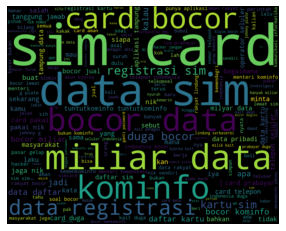

In [54]:
#All word cloud
# Plot The Word Cloud All
import os
os.path
import matplotlib.pyplot as plt
from wordcloud import WordCloud


allWords  = ' '.join( [str (twts) for twts in clean['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=123, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

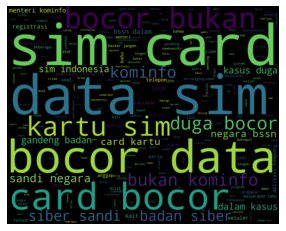

In [55]:

# Plot The Word Cloud Positif

#get positif data
positif_data = labeled.loc[labeled['tipe']=='2']

allWords  = ' '.join( [str (twts) for twts in positif_data['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=123, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

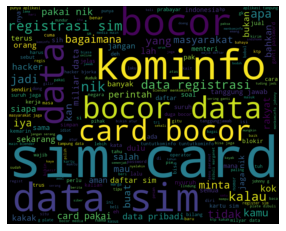

In [56]:

# Plot The Word Cloud Negatif


#get negatif data
negatif_data = labeled.loc[labeled['tipe']=='0']

allWords  = ' '.join( [str (twts) for twts in negatif_data['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

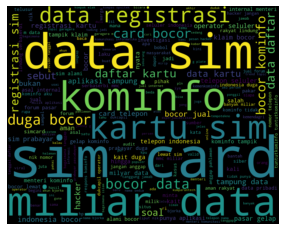

In [57]:

# Plot The Word Cloud netral


#get netral data
netral_data = labeled.loc[labeled['tipe']=='1']

allWords  = ' '.join( [str (twts) for twts in netral_data['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()